## Make a program to choose randomly p fraction of the population to infect initially
* Randomly with choosen probability picks 0 and 1 
* We find list of all unique users and then we need to infect a percentage of population
* Again a problem here is that we need to start infecting users only after a particular time
* we need to make this set to be positive or negative

**I propose that there could be atleast two mechanism to start infection**
1. Randomly infect people by choosing them after a particular time
2. Randomly infect people by choosing a particular place at particular time (this is how COVID started)
3. If choosing step 2 then we can randmly infect people who were at that place at a particular time
4. Using alpha as infection rate

In [1]:
import pandas as pd

df = pd.read_csv("processedTMSC2014.tsv",sep='\t', engine="python")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

Import the ArcGIS API for Python. This adds a GeoAccessor and spatially enables your DataFrame objects. As you will see in this notebook, you can then easily plot your data both as charts and as maps.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor

/opt/anaconda3/envs/cs293b/lib/python3.7/site-packages/arcgis/features/_data/geodataset/utils.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


# EXTRA IDEAS
## We can use venue catorgories to define the probabilty of infection
* If it is a closed space we can have more probability 
* If it is public space which is frequented by many we can give more probability
* Also we can give probability of contamination by looking at how many people were there at the place at given time

In [3]:
df

User ID (anonymized)     Venue ID (Foursquare)  \
0                        470  49bbd6c0f964a520f4531fe3   
1                        979  4a43c0aef964a520c6a61fe3   
2                         69  4c5cc7b485a1e21e00d35711   
3                        395  4bc7086715a7ef3bef9878da   
4                         87  4cf2c5321d18a143951b5cec   
...                      ...                       ...   
227423                   688  3fd66200f964a52000e71ee3   
227424                   560  4bca32ff0687ef3be789dbcc   
227425                   945  50a77716e4b0b5a9492f6f56   
227426                   671  4514efe0f964a520e7391fe3   
227427                   942  4a1e0ca0f964a520bf7b1fe3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
0            4bf58dd8d48988d127951735             Arts & Crafts Store   
1            4bf58dd8d48988d1df941735                          Bridge   
2            4bf58dd8d48988d103941735                  Home (private)   
3            4bf58dd8d48988d104941735                  Medical Center   
4            4bf58dd8d48988d1cb941735                      Food Truck   
...                               ...                             ...   
227423       4bf58dd8d48988d1e7931735                     Music Venue   
227424       4bf58dd8d48988d16c941735                    Burger Joint   
227425       4bf58dd8d48988d103941735                  Home (private)   
227426       4bf58dd8d48988d11d941735                             Bar   
227427       4bf58dd8d48988d116941735                             Bar   

         Latitude  Longitude  Timezone offset(minutes)  \
0       40.719810 -74.002581                      -240   
1       40.606800 -74.044170                      -240   
2       40.716162 -73.883070                      -240   
3       40.745164 -73.982519                      -240   
4       40.740104 -73.989658                      -240   
...           ...        ...                       ...   
227423  40.733596 -74.003139                      -300   
227424  40.745719 -73.993720                      -300   
227425  40.854364 -73.883070                      -300   
227426  40.735981 -74.029309                      -300   
227427  40.726805 -73.957422                      -300   

                              UTC time  Status  Iteration  InfectorId  \
0       Tue Apr 03 18:00:09 +0000 2012       0          0           0   
1       Tue Apr 03 18:00:25 +0000 2012       0          0           0   
2       Tue Apr 03 18:02:24 +0000 2012       0          0           0   
3       Tue Apr 03 18:02:41 +0000 2012       0          0           0   
4       Tue Apr 03 18:03:00 +0000 2012       0          0           0   
...                                ...     ...        ...         ...   
227423  Sat Feb 16 02:29:11 +0000 2013       0          0           0   
227424  Sat Feb 16 02:31:35 +0000 2013       0          0           0   
227425  Sat Feb 16 02:33:16 +0000 2013       0          0           0   
227426  Sat Feb 16 02:34:31 +0000 2013       0          0           0   
227427  Sat Feb 16 02:35:36 +0000 2013       0          0           0   

        InfectionTime        Time  
0                   0  1333476009  
1                   0  1333476025  
2                   0  1333476144  
3                   0  1333476161  
4                   0  1333476180  
...               ...         ...  
227423              0  1360981751  
227424              0  1360981895  
227425              0  1360981996  
227426              0  1360982071  
227427              0  1360982136  

[227428 rows x 13 columns]

# We set the randomly chosen population to be infected

In [4]:
import numpy as np

alpha = 0.1

#choosing unique users from list of all user IDs
unique_users =  pd.unique(df["User ID (anonymized)"])#.

print(f"Number of unique users are: {len(unique_users)}")

# this is when we are infecting people after a particular time
gen_positive = np.random.choice((1,0),size = len(unique_users), p=[alpha, 1-alpha])

#Choosing the time at which infection begins
infect_time = df.iloc[2000]["Time"]

infections = np.sum(gen_positive)
print(f"Number of infected users: {infections}")

Number of unique users are: 1083
Number of infected users: 97


In [5]:
#Query logic to select only those users whose user id and time matches or  those who are positive already
for i in range(len(unique_users)):
    #print(i)
    if gen_positive[i] == 1:
        #Below query gives sets status to 1 if infected userId and time condition matches
        df["Status"]= np.where( ( (df["User ID (anonymized)"] == unique_users[i]) & (df["Time"] >= infect_time) ) | (df["Status"] == 1),1,0)

# Setting infection time for all
df["InfectionTime"] = np.where(df["Status"]==1,infect_time,0)

count_infected = len(df[df["Status"]==1])
print(f"number of infect rows: {count_infected}")

number of infect rows: 23121


In [6]:
df

User ID (anonymized)     Venue ID (Foursquare)  \
0                        470  49bbd6c0f964a520f4531fe3   
1                        979  4a43c0aef964a520c6a61fe3   
2                         69  4c5cc7b485a1e21e00d35711   
3                        395  4bc7086715a7ef3bef9878da   
4                         87  4cf2c5321d18a143951b5cec   
...                      ...                       ...   
227423                   688  3fd66200f964a52000e71ee3   
227424                   560  4bca32ff0687ef3be789dbcc   
227425                   945  50a77716e4b0b5a9492f6f56   
227426                   671  4514efe0f964a520e7391fe3   
227427                   942  4a1e0ca0f964a520bf7b1fe3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
0            4bf58dd8d48988d127951735             Arts & Crafts Store   
1            4bf58dd8d48988d1df941735                          Bridge   
2            4bf58dd8d48988d103941735                  Home (private)   
3            4bf58dd8d48988d104941735                  Medical Center   
4            4bf58dd8d48988d1cb941735                      Food Truck   
...                               ...                             ...   
227423       4bf58dd8d48988d1e7931735                     Music Venue   
227424       4bf58dd8d48988d16c941735                    Burger Joint   
227425       4bf58dd8d48988d103941735                  Home (private)   
227426       4bf58dd8d48988d11d941735                             Bar   
227427       4bf58dd8d48988d116941735                             Bar   

         Latitude  Longitude  Timezone offset(minutes)  \
0       40.719810 -74.002581                      -240   
1       40.606800 -74.044170                      -240   
2       40.716162 -73.883070                      -240   
3       40.745164 -73.982519                      -240   
4       40.740104 -73.989658                      -240   
...           ...        ...                       ...   
227423  40.733596 -74.003139                      -300   
227424  40.745719 -73.993720                      -300   
227425  40.854364 -73.883070                      -300   
227426  40.735981 -74.029309                      -300   
227427  40.726805 -73.957422                      -300   

                              UTC time  Status  Iteration  InfectorId  \
0       Tue Apr 03 18:00:09 +0000 2012       0          0           0   
1       Tue Apr 03 18:00:25 +0000 2012       0          0           0   
2       Tue Apr 03 18:02:24 +0000 2012       0          0           0   
3       Tue Apr 03 18:02:41 +0000 2012       0          0           0   
4       Tue Apr 03 18:03:00 +0000 2012       0          0           0   
...                                ...     ...        ...         ...   
227423  Sat Feb 16 02:29:11 +0000 2013       0          0           0   
227424  Sat Feb 16 02:31:35 +0000 2013       0          0           0   
227425  Sat Feb 16 02:33:16 +0000 2013       0          0           0   
227426  Sat Feb 16 02:34:31 +0000 2013       0          0           0   
227427  Sat Feb 16 02:35:36 +0000 2013       0          0           0   

        InfectionTime        Time  
0                   0  1333476009  
1                   0  1333476025  
2                   0  1333476144  
3                   0  1333476161  
4                   0  1333476180  
...               ...         ...  
227423              0  1360981751  
227424              0  1360981895  
227425              0  1360981996  
227426              0  1360982071  
227427              0  1360982136  

[227428 rows x 13 columns]

# We need to do following
* We need to find every person that has been infected
* for every person that has been infected we need to find the other person who was at same place and time range
* infect these people with certain probability


    print(f"Meeting population for \n{infector}")
    print(meeting_population, i)
    for j in range(0,len(meeting_population)):
        person = df.iloc[meeting_population[j]]
        if(person["Status"]==0):
            print("Non infected person met.................")
            if( person["Time"] >= infector["Time"] and person["Time"]<= infector["Time"]+3600):
                print("In range.............................")
                #Find all the entries of this person after this time and set details
                person_rows = list(np.where((df["User ID (anonymized)"]==person["User ID (anonymized)"]) & (df["Time"]>=person["Time"]))[0])
                print("Places where this person has rows")
                print(person_rows)
                for k in range(len(person_rows)):
                    df.iloc[meeting_population[j]]["Status"] = 1
                    df.iloc[meeting_population[j]]["InfectorId"] = infector["User ID (anonymized)"]
                    df.iloc[meeting_population[j]]["InfectionTime"] = person["Time"]
            else:
                print("Saved! Was not in time range of 1 hours for infection")
        else:
            # It might so happen that 1st infector was not processed to infect first
            if( person["Time"] >= infector["Time"] and person["Time"]<= infector["Time"]+3600):
                print("In range.............................")
          
                if(person["InfectionTime"] >= person["Time"]):
                    print("Infected already........")
                else:
                    #Find all the entries of this person after this time and set details
                    print("Updating new infector.....................")
                    person_rows = list(np.where((df["User ID (anonymized)"]==person["User ID (anonymized)"]) & (df["Time"]>=person["Time"]))[0])
                    print("Places where this person has rows")
                    print(person_rows)
                    for k in range(len(person_rows)):
                        df.iloc[meeting_population[j]]["Status"] = 1
                        df.iloc[meeting_population[j]]["InfectorId"] = infector["User ID (anonymized)"]
                        df.iloc[meeting_population[j]]["InfectionTime"] = person["Time"]
            else:
                print("Saved! Was not in time range of 1 hours for infection")
    

In [7]:
# Find all the infected rows
infected_users_dataframe = df[df["Status"]==1]
print("List of infected users")
infected_users_dataframe

List of infected users


User ID (anonymized)     Venue ID (Foursquare)  \
2013                     601  40b68100f964a5207d001fe3   
2044                     194  4f6e0ec0e4b0f577d28102bb   
2049                     178  42911d00f964a520f5231fe3   
2056                     194  4ea80677e3003a42bccc3c67   
2095                     829  4a92a28ff964a520451d20e3   
...                      ...                       ...   
227368                   349  4e43c5c752b18fcc7991cffa   
227370                   349  4f79a81ae4b09489387bafb6   
227377                    11  4c94a38fefecb71341b6df9d   
227397                   542  4be1db7dedbb0f47c5eaa615   
227405                   126  4ad04456f964a520c7d720e3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
2013         4bf58dd8d48988d163941735                            Park   
2044         4bf58dd8d48988d1c5941735                  Sandwich Place   
2049         4bf58dd8d48988d129951735                   Train Station   
2056         4bf58dd8d48988d10a951735                            Bank   
2095         4bf58dd8d48988d1f6941735                Department Store   
...                               ...                             ...   
227368       4bf58dd8d48988d146941735                   Deli / Bodega   
227370       4bf58dd8d48988d146941735                   Deli / Bodega   
227377       4bf58dd8d48988d1c4941735                      Restaurant   
227397       4bf58dd8d48988d1a3941735       College Academic Building   
227405       4bf58dd8d48988d1d8941735                             Bar   

         Latitude  Longitude  Timezone offset(minutes)  \
2013    40.742188 -73.987924                      -240   
2044    40.590704 -73.797129                      -240   
2049    40.750795 -73.993576                      -240   
2056    40.590336 -73.798066                      -240   
2095    40.783222 -73.833447                      -240   
...           ...        ...                       ...   
227368  40.832593 -73.915289                      -300   
227370  40.832612 -73.915352                      -300   
227377  40.739468 -74.001901                      -300   
227397  40.776677 -73.980567                      -300   
227405  40.760871 -73.990166                      -300   

                              UTC time  Status  Iteration  InfectorId  \
2013    Wed Apr 04 17:25:03 +0000 2012       1          0           0   
2044    Wed Apr 04 17:40:48 +0000 2012       1          0           0   
2049    Wed Apr 04 17:44:54 +0000 2012       1          0           0   
2056    Wed Apr 04 17:51:34 +0000 2012       1          0           0   
2095    Wed Apr 04 18:07:48 +0000 2012       1          0           0   
...                                ...     ...        ...         ...   
227368  Thu Feb 14 12:25:23 +0000 2013       1          0           0   
227370  Thu Feb 14 12:25:39 +0000 2013       1          0           0   
227377  Sat Feb 16 01:35:22 +0000 2013       1          0           0   
227397  Sat Feb 16 02:02:48 +0000 2013       1          0           0   
227405  Sat Feb 16 02:11:14 +0000 2013       1          0           0   

        InfectionTime        Time  
2013       1333559854  1333560303  
2044       1333559854  1333561248  
2049       1333559854  1333561494  
2056       1333559854  1333561894  
2095       1333559854  1333562868  
...               ...         ...  
227368     1333559854  1360844723  
227370     1333559854  1360844739  
227377     1333559854  1360978522  
227397     1333559854  1360980168  
227405     1333559854  1360980674  

[23121 rows x 13 columns]

In [8]:
# Find all the infected users
infected_users_dataframe = df[df["Status"]==1]
infected_users = pd.unique(infected_users_dataframe["User ID (anonymized)"])
print("Infected Users are: ")
print(infected_users)
#count number of infections
infections = len(infected_users)
print(f"Total infections are: {infections}")
# Infection list stores list of infected people per round of simulation
infection_list = []
infection_list.append(infected_users)
# We need to find all the users who where at the same place as the infected user and in time range of 1 hrs
# 1hr = 3600 seconds
# ITERATING OVER ALL ROWS AND CHECKING TIME
iteration_count = 0
while(infections!=0):
    # we will maintain this variable to fetch inly new infections
    print("#############################################################################")
    print("#############################################################################")
    print("#############################################################################")
    infected_rows = len(infected_users_dataframe)
    for i in range(infected_rows):
        print(f"Calculating for infected person: {i} of {infected_rows}")
        infector = infected_users_dataframe.iloc[i]
        
        ##print("Infector is:")
        ##print("###################################################################")
        ##print(infector)
        ##print("###################################################################")
        
        # Finding all those prople infector meets after start of infection time
        # meeting_population =  list(np.where( (df["Latitude"] == infector["Latitude"]) & (df["Longitude"] == infector["Longitude"])  & (df["Time"] >= infect_time))[0])
        
        # Finding all people that infector meets at infectors time range
        # Meeting Population is the list of indices of the people, not the User Id (anonymized)
        # We are keeping 3 hours time window -1 +2
        
        meeting_population =  list(np.where( (df["Latitude"] == infector["Latitude"]) & (df["Longitude"] == infector["Longitude"]) & ( (df["Time"] >= (infector["Time"]-3600)) & (df["Time"] <= (infector["Time"]+7200)) ))[0])
        
        print("List of people this infector meets: "+str({len(meeting_population)})) 
        ##print(meeting_population)
        ##print(meeting_population)
        
        for index in meeting_population:
            person = df.iloc[index]
            if(person["Status"]==0):
                
                print(f"Non infected person met.................{index}")
                ##print("In range.............................")
                #Find all the entries of this person after this time and set details
                
                person_rows = np.where( (df["User ID (anonymized)"]==person["User ID (anonymized)"]) & (df["Time"]>=person["Time"]))[0]
                
                ##print("Places where this person has rows")
                ##print(f"Rows of person is : {len(person_rows)}")
                
                # TO MAKE MORE EFFIECIENT
                # https://stackoverflow.com/questions/49447233/python-maintain-multiple-columns-with-np-where
                for k in range(len(person_rows)):
                    df.at[index, "Status"] = 1
                    #print("Status Set")
                    df.at[index, "InfectorId"] = infector["User ID (anonymized)"]
                    #print("Infector Id Set")
                    df.at[index, "InfectionTime"] = person["Time"]
                    #print("Infection Time Set")
                    df.at[index, "Iteration"] = iteration_count+1
                    df.at[index, "InfectionLongitude"] = infector["Longitude"]
                    df.at[index, "InfectionLatitude"] = infector["Latitude"]
            else:
                # AS data is sorted with time we assume that we don't need tp bother who infects first
                print(f"Met with an already infected person.................{index}")
                
    # Find all the infected users
    # HERE WE MUST ALSO SET CONDITIONS BASED ON ITERATION, FETCH ONLY THAT WERE INFECTED IN THIS ITERATION
    iteration_count += 1
    print("Finding new Infections............................")
    infected_users_dataframe = df[(df["Status"]==1) & (df["Iteration"]==iteration_count)]
    infected_users = pd.unique(infected_users_dataframe["User ID (anonymized)"])
    infection_list.append(infected_users)
    ##print("Infected Users are: ")
    ##print(infected_users)
    #count number of infections
    print("Infected Users are: ")
    print(infected_users)
    infections = len(infected_users)
    print(f"Total new infections are: {infections}") 
    print("#############################################################################")
    print("#############################################################################")
    print("#############################################################################")

Infected Users are: 
[ 601  194  178  829  669  354   52  474  894   65  398  725  854  440
  467  521  373 1019  530 1055  173  534  207  868  473  802  983 1074
  235  879   61  187  377  208   16  581  643  349 1018  347  403  630
  851  721   40  744  811  568  642  952  964  825  423  334  746 1052
  776  387  837  480 1011  392  695  519  939   80   93  218  126  303
  395  504  343  680  466  396 1062  421  938   31  813   11  497  664
  773  807  262  460  602  711  341  165  223  605 1043  477  542]
Total infections are: 97
#############################################################################
#############################################################################
#############################################################################
Calculating for infected person: 0 of 23121
List of people this infector meets: {2}
Non infected person met.................2011
Met with an already infected person.................2013
Calculating for infected person: 1 of 231

List of people this infector meets: {1}
Met with an already infected person.................2628
Calculating for infected person: 66 of 23121
List of people this infector meets: {1}
Met with an already infected person.................2630
Calculating for infected person: 67 of 23121
List of people this infector meets: {1}
Met with an already infected person.................2634
Calculating for infected person: 68 of 23121
List of people this infector meets: {1}
Met with an already infected person.................2638
Calculating for infected person: 69 of 23121
List of people this infector meets: {1}
Met with an already infected person.................2639
Calculating for infected person: 70 of 23121
List of people this infector meets: {2}
Met with an already infected person.................2644
Met with an already infected person.................2656
Calculating for infected person: 71 of 23121
List of people this infector meets: {1}
Met with an already infected person................

List of people this infector meets: {1}
Met with an already infected person.................3144
Calculating for infected person: 137 of 23121
List of people this infector meets: {1}
Met with an already infected person.................3146
Calculating for infected person: 138 of 23121
List of people this infector meets: {1}
Met with an already infected person.................3149
Calculating for infected person: 139 of 23121
List of people this infector meets: {1}
Met with an already infected person.................3177
Calculating for infected person: 140 of 23121
List of people this infector meets: {1}
Met with an already infected person.................3190
Calculating for infected person: 141 of 23121
List of people this infector meets: {1}
Met with an already infected person.................3198
Calculating for infected person: 142 of 23121
List of people this infector meets: {1}
Met with an already infected person.................3228
Calculating for infected person: 143 of 23121

Calculating for infected person: 199 of 23121
List of people this infector meets: {3}
Non infected person met.................3529
Non infected person met.................3599
Met with an already infected person.................3649
Calculating for infected person: 200 of 23121
List of people this infector meets: {1}
Met with an already infected person.................3650
Calculating for infected person: 201 of 23121
List of people this infector meets: {1}
Met with an already infected person.................3651
Calculating for infected person: 202 of 23121
List of people this infector meets: {1}
Met with an already infected person.................3652
Calculating for infected person: 203 of 23121
List of people this infector meets: {2}
Non infected person met.................3589
Met with an already infected person.................3654
Calculating for infected person: 204 of 23121
List of people this infector meets: {1}
Met with an already infected person.................3658
Calcula

Calculating for infected person: 264 of 23121
List of people this infector meets: {1}
Met with an already infected person.................4243
Calculating for infected person: 265 of 23121
List of people this infector meets: {1}
Met with an already infected person.................4244
Calculating for infected person: 266 of 23121
List of people this infector meets: {1}
Met with an already infected person.................4279
Calculating for infected person: 267 of 23121
List of people this infector meets: {1}
Met with an already infected person.................4281
Calculating for infected person: 268 of 23121
List of people this infector meets: {1}
Met with an already infected person.................4293
Calculating for infected person: 269 of 23121
List of people this infector meets: {1}
Met with an already infected person.................4296
Calculating for infected person: 270 of 23121
List of people this infector meets: {1}
Met with an already infected person.................4297

List of people this infector meets: {1}
Met with an already infected person.................4812
Calculating for infected person: 329 of 23121
List of people this infector meets: {1}
Met with an already infected person.................4825
Calculating for infected person: 330 of 23121
List of people this infector meets: {1}
Met with an already infected person.................4830
Calculating for infected person: 331 of 23121
List of people this infector meets: {1}
Met with an already infected person.................4873
Calculating for infected person: 332 of 23121
List of people this infector meets: {1}
Met with an already infected person.................4874
Calculating for infected person: 333 of 23121
List of people this infector meets: {1}
Met with an already infected person.................4899
Calculating for infected person: 334 of 23121
List of people this infector meets: {1}
Met with an already infected person.................4919
Calculating for infected person: 335 of 23121

Non infected person met.................5354
Met with an already infected person.................5366
Non infected person met.................5375
Non infected person met.................5377
Non infected person met.................5384
Non infected person met.................5385
Non infected person met.................5400
Non infected person met.................5403
Non infected person met.................5418
Met with an already infected person.................5434
Non infected person met.................5466
Calculating for infected person: 379 of 23121
List of people this infector meets: {1}
Met with an already infected person.................5287
Calculating for infected person: 380 of 23121
List of people this infector meets: {1}
Met with an already infected person.................5309
Calculating for infected person: 381 of 23121
List of people this infector meets: {23}
Met with an already infected person.................5248
Met with an already infected person................

Non infected person met.................5738
Calculating for infected person: 406 of 23121
List of people this infector meets: {1}
Met with an already infected person.................5575
Calculating for infected person: 407 of 23121
List of people this infector meets: {1}
Met with an already infected person.................5582
Calculating for infected person: 408 of 23121
List of people this infector meets: {1}
Met with an already infected person.................5584
Calculating for infected person: 409 of 23121
List of people this infector meets: {1}
Met with an already infected person.................5586
Calculating for infected person: 410 of 23121
List of people this infector meets: {1}
Met with an already infected person.................5595
Calculating for infected person: 411 of 23121
List of people this infector meets: {1}
Met with an already infected person.................5601
Calculating for infected person: 412 of 23121
List of people this infector meets: {1}
Met with an

Calculating for infected person: 481 of 23121
List of people this infector meets: {1}
Met with an already infected person.................6186
Calculating for infected person: 482 of 23121
List of people this infector meets: {1}
Met with an already infected person.................6202
Calculating for infected person: 483 of 23121
List of people this infector meets: {1}
Met with an already infected person.................6208
Calculating for infected person: 484 of 23121
List of people this infector meets: {1}
Met with an already infected person.................6210
Calculating for infected person: 485 of 23121
List of people this infector meets: {1}
Met with an already infected person.................6212
Calculating for infected person: 486 of 23121
List of people this infector meets: {1}
Met with an already infected person.................6214
Calculating for infected person: 487 of 23121
List of people this infector meets: {1}
Met with an already infected person.................6225

List of people this infector meets: {1}
Met with an already infected person.................6929
Calculating for infected person: 568 of 23121
List of people this infector meets: {1}
Met with an already infected person.................6942
Calculating for infected person: 569 of 23121
List of people this infector meets: {3}
Met with an already infected person.................6955
Non infected person met.................7140
Non infected person met.................7175
Calculating for infected person: 570 of 23121
List of people this infector meets: {1}
Met with an already infected person.................6970
Calculating for infected person: 571 of 23121
List of people this infector meets: {1}
Met with an already infected person.................6971
Calculating for infected person: 572 of 23121
List of people this infector meets: {1}
Met with an already infected person.................6972
Calculating for infected person: 573 of 23121
List of people this infector meets: {1}
Met with an 

List of people this infector meets: {1}
Met with an already infected person.................7866
Calculating for infected person: 656 of 23121
List of people this infector meets: {1}
Met with an already infected person.................7871
Calculating for infected person: 657 of 23121
List of people this infector meets: {1}
Met with an already infected person.................7872
Calculating for infected person: 658 of 23121
List of people this infector meets: {1}
Met with an already infected person.................7882
Calculating for infected person: 659 of 23121
List of people this infector meets: {1}
Met with an already infected person.................7894
Calculating for infected person: 660 of 23121
List of people this infector meets: {1}
Met with an already infected person.................7895
Calculating for infected person: 661 of 23121
List of people this infector meets: {1}
Met with an already infected person.................7896
Calculating for infected person: 662 of 23121

Calculating for infected person: 728 of 23121
List of people this infector meets: {1}
Met with an already infected person.................8642
Calculating for infected person: 729 of 23121
List of people this infector meets: {1}
Met with an already infected person.................8675
Calculating for infected person: 730 of 23121
List of people this infector meets: {1}
Met with an already infected person.................8677
Calculating for infected person: 731 of 23121
List of people this infector meets: {1}
Met with an already infected person.................8679
Calculating for infected person: 732 of 23121
List of people this infector meets: {1}
Met with an already infected person.................8680
Calculating for infected person: 733 of 23121
List of people this infector meets: {1}
Met with an already infected person.................8687
Calculating for infected person: 734 of 23121
List of people this infector meets: {1}
Met with an already infected person.................8690

List of people this infector meets: {1}
Met with an already infected person.................9671
Calculating for infected person: 831 of 23121
List of people this infector meets: {1}
Met with an already infected person.................9674
Calculating for infected person: 832 of 23121
List of people this infector meets: {1}
Met with an already infected person.................9704
Calculating for infected person: 833 of 23121
List of people this infector meets: {1}
Met with an already infected person.................9706
Calculating for infected person: 834 of 23121
List of people this infector meets: {1}
Met with an already infected person.................9710
Calculating for infected person: 835 of 23121
List of people this infector meets: {1}
Met with an already infected person.................9714
Calculating for infected person: 836 of 23121
List of people this infector meets: {1}
Met with an already infected person.................9718
Calculating for infected person: 837 of 23121

List of people this infector meets: {1}
Met with an already infected person.................10496
Calculating for infected person: 917 of 23121
List of people this infector meets: {1}
Met with an already infected person.................10497
Calculating for infected person: 918 of 23121
List of people this infector meets: {1}
Met with an already infected person.................10501
Calculating for infected person: 919 of 23121
List of people this infector meets: {1}
Met with an already infected person.................10523
Calculating for infected person: 920 of 23121
List of people this infector meets: {2}
Met with an already infected person.................10439
Met with an already infected person.................10528
Calculating for infected person: 921 of 23121
List of people this infector meets: {1}
Met with an already infected person.................10531
Calculating for infected person: 922 of 23121
List of people this infector meets: {1}
Met with an already infected person...

Calculating for infected person: 986 of 23121
List of people this infector meets: {1}
Met with an already infected person.................11402
Calculating for infected person: 987 of 23121
List of people this infector meets: {1}
Met with an already infected person.................11411
Calculating for infected person: 988 of 23121
List of people this infector meets: {1}
Met with an already infected person.................11421
Calculating for infected person: 989 of 23121
List of people this infector meets: {1}
Met with an already infected person.................11429
Calculating for infected person: 990 of 23121
List of people this infector meets: {1}
Met with an already infected person.................11442
Calculating for infected person: 991 of 23121
List of people this infector meets: {1}
Met with an already infected person.................11443
Calculating for infected person: 992 of 23121
List of people this infector meets: {2}
Non infected person met.................11431
Met 

List of people this infector meets: {1}
Met with an already infected person.................12063
Calculating for infected person: 1076 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12083
Calculating for infected person: 1077 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12101
Calculating for infected person: 1078 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12102
Calculating for infected person: 1079 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12116
Calculating for infected person: 1080 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12135
Calculating for infected person: 1081 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12140
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................12505
Calculating for infected person: 1141 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12506
Calculating for infected person: 1142 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12507
Calculating for infected person: 1143 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12508
Calculating for infected person: 1144 of 23121
List of people this infector meets: {2}
Met with an already infected person.................12520
Non infected person met.................12544
Calculating for infected person: 1145 of 23121
List of people this infector meets: {2}
Met with an already infected person.................12522
Non infected person met.................12562
Calculating for infected person: 1146 of 23121
List of people this infector meets: {1

Met with an already infected person.................12968
Calculating for infected person: 1197 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12970
Calculating for infected person: 1198 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12978
Calculating for infected person: 1199 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12979
Calculating for infected person: 1200 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12992
Calculating for infected person: 1201 of 23121
List of people this infector meets: {1}
Met with an already infected person.................12995
Calculating for infected person: 1202 of 23121
List of people this infector meets: {1}
Met with an already infected person.................13021
Calculating for infected person: 1203 of 23121
List of people this infec

Met with an already infected person.................13809
Calculating for infected person: 1282 of 23121
List of people this infector meets: {1}
Met with an already infected person.................13810
Calculating for infected person: 1283 of 23121
List of people this infector meets: {1}
Met with an already infected person.................13811
Calculating for infected person: 1284 of 23121
List of people this infector meets: {1}
Met with an already infected person.................13817
Calculating for infected person: 1285 of 23121
List of people this infector meets: {1}
Met with an already infected person.................13822
Calculating for infected person: 1286 of 23121
List of people this infector meets: {1}
Met with an already infected person.................13824
Calculating for infected person: 1287 of 23121
List of people this infector meets: {2}
Met with an already infected person.................13842
Non infected person met.................13860
Calculating for infected p

List of people this infector meets: {1}
Met with an already infected person.................14373
Calculating for infected person: 1346 of 23121
List of people this infector meets: {1}
Met with an already infected person.................14383
Calculating for infected person: 1347 of 23121
List of people this infector meets: {2}
Met with an already infected person.................14388
Met with an already infected person.................14623
Calculating for infected person: 1348 of 23121
List of people this infector meets: {1}
Met with an already infected person.................14391
Calculating for infected person: 1349 of 23121
List of people this infector meets: {1}
Met with an already infected person.................14398
Calculating for infected person: 1350 of 23121
List of people this infector meets: {1}
Met with an already infected person.................14399
Calculating for infected person: 1351 of 23121
List of people this infector meets: {1}
Met with an already infected per

Calculating for infected person: 1426 of 23121
List of people this infector meets: {1}
Met with an already infected person.................15045
Calculating for infected person: 1427 of 23121
List of people this infector meets: {1}
Met with an already infected person.................15065
Calculating for infected person: 1428 of 23121
List of people this infector meets: {1}
Met with an already infected person.................15074
Calculating for infected person: 1429 of 23121
List of people this infector meets: {1}
Met with an already infected person.................15086
Calculating for infected person: 1430 of 23121
List of people this infector meets: {1}
Met with an already infected person.................15087
Calculating for infected person: 1431 of 23121
List of people this infector meets: {1}
Met with an already infected person.................15102
Calculating for infected person: 1432 of 23121
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................15781
Calculating for infected person: 1502 of 23121
List of people this infector meets: {1}
Met with an already infected person.................15788
Calculating for infected person: 1503 of 23121
List of people this infector meets: {1}
Met with an already infected person.................15806
Calculating for infected person: 1504 of 23121
List of people this infector meets: {1}
Met with an already infected person.................15818
Calculating for infected person: 1505 of 23121
List of people this infector meets: {1}
Met with an already infected person.................15822
Calculating for infected person: 1506 of 23121
List of people this infector meets: {1}
Met with an already infected person.................15835
Calculating for infected person: 1507 of 23121
List of people this infector meets: {1}
Met with an already infected person.................15840
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................16363
Calculating for infected person: 1572 of 23121
List of people this infector meets: {1}
Met with an already infected person.................16373
Calculating for infected person: 1573 of 23121
List of people this infector meets: {1}
Met with an already infected person.................16390
Calculating for infected person: 1574 of 23121
List of people this infector meets: {1}
Met with an already infected person.................16395
Calculating for infected person: 1575 of 23121
List of people this infector meets: {1}
Met with an already infected person.................16398
Calculating for infected person: 1576 of 23121
List of people this infector meets: {1}
Met with an already infected person.................16422
Calculating for infected person: 1577 of 23121
List of people this infector meets: {1}
Met with an already infected person.................16426
Calculating for infected person:

Calculating for infected person: 1649 of 23121
List of people this infector meets: {1}
Met with an already infected person.................16968
Calculating for infected person: 1650 of 23121
List of people this infector meets: {1}
Met with an already infected person.................16978
Calculating for infected person: 1651 of 23121
List of people this infector meets: {1}
Met with an already infected person.................16984
Calculating for infected person: 1652 of 23121
List of people this infector meets: {1}
Met with an already infected person.................17024
Calculating for infected person: 1653 of 23121
List of people this infector meets: {1}
Met with an already infected person.................17046
Calculating for infected person: 1654 of 23121
List of people this infector meets: {1}
Met with an already infected person.................17055
Calculating for infected person: 1655 of 23121
List of people this infector meets: {1}
Met with an already infected person........

Calculating for infected person: 1717 of 23121
List of people this infector meets: {1}
Met with an already infected person.................17641
Calculating for infected person: 1718 of 23121
List of people this infector meets: {1}
Met with an already infected person.................17647
Calculating for infected person: 1719 of 23121
List of people this infector meets: {1}
Met with an already infected person.................17648
Calculating for infected person: 1720 of 23121
List of people this infector meets: {1}
Met with an already infected person.................17649
Calculating for infected person: 1721 of 23121
List of people this infector meets: {1}
Met with an already infected person.................17650
Calculating for infected person: 1722 of 23121
List of people this infector meets: {2}
Met with an already infected person.................17652
Met with an already infected person.................17780
Calculating for infected person: 1723 of 23121
List of people this infec

List of people this infector meets: {1}
Met with an already infected person.................18351
Calculating for infected person: 1802 of 23121
List of people this infector meets: {1}
Met with an already infected person.................18353
Calculating for infected person: 1803 of 23121
List of people this infector meets: {1}
Met with an already infected person.................18355
Calculating for infected person: 1804 of 23121
List of people this infector meets: {1}
Met with an already infected person.................18372
Calculating for infected person: 1805 of 23121
List of people this infector meets: {1}
Met with an already infected person.................18379
Calculating for infected person: 1806 of 23121
List of people this infector meets: {1}
Met with an already infected person.................18385
Calculating for infected person: 1807 of 23121
List of people this infector meets: {2}
Met with an already infected person.................18395
Non infected person met.........

List of people this infector meets: {1}
Met with an already infected person.................18926
Calculating for infected person: 1869 of 23121
List of people this infector meets: {1}
Met with an already infected person.................18927
Calculating for infected person: 1870 of 23121
List of people this infector meets: {1}
Met with an already infected person.................18928
Calculating for infected person: 1871 of 23121
List of people this infector meets: {1}
Met with an already infected person.................18937
Calculating for infected person: 1872 of 23121
List of people this infector meets: {1}
Met with an already infected person.................18944
Calculating for infected person: 1873 of 23121
List of people this infector meets: {1}
Met with an already infected person.................18945
Calculating for infected person: 1874 of 23121
List of people this infector meets: {8}
Met with an already infected person.................18787
Met with an already infected per

List of people this infector meets: {1}
Met with an already infected person.................19480
Calculating for infected person: 1929 of 23121
List of people this infector meets: {1}
Met with an already infected person.................19482
Calculating for infected person: 1930 of 23121
List of people this infector meets: {1}
Met with an already infected person.................19484
Calculating for infected person: 1931 of 23121
List of people this infector meets: {1}
Met with an already infected person.................19491
Calculating for infected person: 1932 of 23121
List of people this infector meets: {1}
Met with an already infected person.................19492
Calculating for infected person: 1933 of 23121
List of people this infector meets: {1}
Met with an already infected person.................19493
Calculating for infected person: 1934 of 23121
List of people this infector meets: {1}
Met with an already infected person.................19494
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................19819
Calculating for infected person: 1979 of 23121
List of people this infector meets: {1}
Met with an already infected person.................19821
Calculating for infected person: 1980 of 23121
List of people this infector meets: {3}
Non infected person met.................19762
Met with an already infected person.................19838
Met with an already infected person.................19926
Calculating for infected person: 1981 of 23121
List of people this infector meets: {1}
Met with an already infected person.................19839
Calculating for infected person: 1982 of 23121
List of people this infector meets: {1}
Met with an already infected person.................19840
Calculating for infected person: 1983 of 23121
List of people this infector meets: {3}
Met with an already infected person.................19841
Met with an already infected person.................19842
Met with an alr

List of people this infector meets: {1}
Met with an already infected person.................20289
Calculating for infected person: 2045 of 23121
List of people this infector meets: {1}
Met with an already infected person.................20304
Calculating for infected person: 2046 of 23121
List of people this infector meets: {1}
Met with an already infected person.................20307
Calculating for infected person: 2047 of 23121
List of people this infector meets: {1}
Met with an already infected person.................20309
Calculating for infected person: 2048 of 23121
List of people this infector meets: {1}
Met with an already infected person.................20310
Calculating for infected person: 2049 of 23121
List of people this infector meets: {1}
Met with an already infected person.................20340
Calculating for infected person: 2050 of 23121
List of people this infector meets: {1}
Met with an already infected person.................20341
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................20871
Calculating for infected person: 2120 of 23121
List of people this infector meets: {1}
Met with an already infected person.................20875
Calculating for infected person: 2121 of 23121
List of people this infector meets: {1}
Met with an already infected person.................20886
Calculating for infected person: 2122 of 23121
List of people this infector meets: {1}
Met with an already infected person.................20888
Calculating for infected person: 2123 of 23121
List of people this infector meets: {1}
Met with an already infected person.................20893
Calculating for infected person: 2124 of 23121
List of people this infector meets: {1}
Met with an already infected person.................20900
Calculating for infected person: 2125 of 23121
List of people this infector meets: {1}
Met with an already infected person.................20911
Calculating for infected person:

Calculating for infected person: 2188 of 23121
List of people this infector meets: {1}
Met with an already infected person.................21507
Calculating for infected person: 2189 of 23121
List of people this infector meets: {1}
Met with an already infected person.................21518
Calculating for infected person: 2190 of 23121
List of people this infector meets: {1}
Met with an already infected person.................21523
Calculating for infected person: 2191 of 23121
List of people this infector meets: {1}
Met with an already infected person.................21524
Calculating for infected person: 2192 of 23121
List of people this infector meets: {1}
Met with an already infected person.................21547
Calculating for infected person: 2193 of 23121
List of people this infector meets: {1}
Met with an already infected person.................21549
Calculating for infected person: 2194 of 23121
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {3}
Met with an already infected person.................22090
Met with an already infected person.................22092
Non infected person met.................22097
Calculating for infected person: 2264 of 23121
List of people this infector meets: {3}
Met with an already infected person.................22090
Met with an already infected person.................22092
Met with an already infected person.................22097
Calculating for infected person: 2265 of 23121
List of people this infector meets: {1}
Met with an already infected person.................22105
Calculating for infected person: 2266 of 23121
List of people this infector meets: {1}
Met with an already infected person.................22113
Calculating for infected person: 2267 of 23121
List of people this infector meets: {1}
Met with an already infected person.................22116
Calculating for infected person: 2268 of 23121
List of people this infector meets: {1}
Met with an alr

List of people this infector meets: {2}
Met with an already infected person.................22558
Met with an already infected person.................22561
Calculating for infected person: 2319 of 23121
List of people this infector meets: {2}
Met with an already infected person.................22558
Met with an already infected person.................22561
Calculating for infected person: 2320 of 23121
List of people this infector meets: {1}
Met with an already infected person.................22563
Calculating for infected person: 2321 of 23121
List of people this infector meets: {1}
Met with an already infected person.................22574
Calculating for infected person: 2322 of 23121
List of people this infector meets: {1}
Met with an already infected person.................22589
Calculating for infected person: 2323 of 23121
List of people this infector meets: {1}
Met with an already infected person.................22590
Calculating for infected person: 2324 of 23121
List of people

Calculating for infected person: 2385 of 23121
List of people this infector meets: {1}
Met with an already infected person.................23331
Calculating for infected person: 2386 of 23121
List of people this infector meets: {1}
Met with an already infected person.................23348
Calculating for infected person: 2387 of 23121
List of people this infector meets: {1}
Met with an already infected person.................23357
Calculating for infected person: 2388 of 23121
List of people this infector meets: {1}
Met with an already infected person.................23364
Calculating for infected person: 2389 of 23121
List of people this infector meets: {1}
Met with an already infected person.................23365
Calculating for infected person: 2390 of 23121
List of people this infector meets: {1}
Met with an already infected person.................23369
Calculating for infected person: 2391 of 23121
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................24281
Calculating for infected person: 2478 of 23121
List of people this infector meets: {1}
Met with an already infected person.................24285
Calculating for infected person: 2479 of 23121
List of people this infector meets: {1}
Met with an already infected person.................24287
Calculating for infected person: 2480 of 23121
List of people this infector meets: {1}
Met with an already infected person.................24308
Calculating for infected person: 2481 of 23121
List of people this infector meets: {1}
Met with an already infected person.................24327
Calculating for infected person: 2482 of 23121
List of people this infector meets: {2}
Met with an already infected person.................24336
Non infected person met.................24454
Calculating for infected person: 2483 of 23121
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................25006
Calculating for infected person: 2553 of 23121
List of people this infector meets: {1}
Met with an already infected person.................25017
Calculating for infected person: 2554 of 23121
List of people this infector meets: {2}
Non infected person met.................24996
Met with an already infected person.................25028
Calculating for infected person: 2555 of 23121
List of people this infector meets: {1}
Met with an already infected person.................25030
Calculating for infected person: 2556 of 23121
List of people this infector meets: {1}
Met with an already infected person.................25048
Calculating for infected person: 2557 of 23121
List of people this infector meets: {1}
Met with an already infected person.................25062
Calculating for infected person: 2558 of 23121
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................25889
Calculating for infected person: 2635 of 23121
List of people this infector meets: {1}
Met with an already infected person.................25890
Calculating for infected person: 2636 of 23121
List of people this infector meets: {1}
Met with an already infected person.................25905
Calculating for infected person: 2637 of 23121
List of people this infector meets: {1}
Met with an already infected person.................25945
Calculating for infected person: 2638 of 23121
List of people this infector meets: {1}
Met with an already infected person.................25974
Calculating for infected person: 2639 of 23121
List of people this infector meets: {1}
Met with an already infected person.................25978
Calculating for infected person: 2640 of 23121
List of people this infector meets: {1}
Met with an already infected person.................25988
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................26445
Calculating for infected person: 2698 of 23121
List of people this infector meets: {1}
Met with an already infected person.................26446
Calculating for infected person: 2699 of 23121
List of people this infector meets: {1}
Met with an already infected person.................26447
Calculating for infected person: 2700 of 23121
List of people this infector meets: {1}
Met with an already infected person.................26452
Calculating for infected person: 2701 of 23121
List of people this infector meets: {1}
Met with an already infected person.................26467
Calculating for infected person: 2702 of 23121
List of people this infector meets: {4}
Met with an already infected person.................26483
Met with an already infected person.................26489
Non infected person met.................26495
Met with an already infected person.................26508
Calculating for

Met with an already infected person.................26789
Calculating for infected person: 2760 of 23121
List of people this infector meets: {1}
Met with an already infected person.................26821
Calculating for infected person: 2761 of 23121
List of people this infector meets: {1}
Met with an already infected person.................26834
Calculating for infected person: 2762 of 23121
List of people this infector meets: {1}
Met with an already infected person.................26844
Calculating for infected person: 2763 of 23121
List of people this infector meets: {1}
Met with an already infected person.................26893
Calculating for infected person: 2764 of 23121
List of people this infector meets: {1}
Met with an already infected person.................26901
Calculating for infected person: 2765 of 23121
List of people this infector meets: {1}
Met with an already infected person.................26944
Calculating for infected person: 2766 of 23121
List of people this infec

Non infected person met.................27502
Met with an already infected person.................27522
Non infected person met.................27609
Calculating for infected person: 2825 of 23121
List of people this infector meets: {2}
Met with an already infected person.................27519
Met with an already infected person.................27523
Calculating for infected person: 2826 of 23121
List of people this infector meets: {2}
Met with an already infected person.................27524
Met with an already infected person.................27531
Calculating for infected person: 2827 of 23121
List of people this infector meets: {1}
Met with an already infected person.................27527
Calculating for infected person: 2828 of 23121
List of people this infector meets: {2}
Met with an already infected person.................27524
Met with an already infected person.................27531
Calculating for infected person: 2829 of 23121
List of people this infector meets: {1}
Met with 

Calculating for infected person: 2890 of 23121
List of people this infector meets: {2}
Met with an already infected person.................28138
Non infected person met.................28175
Calculating for infected person: 2891 of 23121
List of people this infector meets: {1}
Met with an already infected person.................28148
Calculating for infected person: 2892 of 23121
List of people this infector meets: {1}
Met with an already infected person.................28156
Calculating for infected person: 2893 of 23121
List of people this infector meets: {1}
Met with an already infected person.................28171
Calculating for infected person: 2894 of 23121
List of people this infector meets: {1}
Met with an already infected person.................28172
Calculating for infected person: 2895 of 23121
List of people this infector meets: {1}
Met with an already infected person.................28177
Calculating for infected person: 2896 of 23121
List of people this infector meets: {

List of people this infector meets: {1}
Met with an already infected person.................29109
Calculating for infected person: 2978 of 23121
List of people this infector meets: {1}
Met with an already infected person.................29116
Calculating for infected person: 2979 of 23121
List of people this infector meets: {1}
Met with an already infected person.................29123
Calculating for infected person: 2980 of 23121
List of people this infector meets: {1}
Met with an already infected person.................29128
Calculating for infected person: 2981 of 23121
List of people this infector meets: {2}
Met with an already infected person.................29132
Met with an already infected person.................29133
Calculating for infected person: 2982 of 23121
List of people this infector meets: {2}
Met with an already infected person.................29132
Met with an already infected person.................29133
Calculating for infected person: 2983 of 23121
List of people

Calculating for infected person: 3080 of 23121
List of people this infector meets: {1}
Met with an already infected person.................30354
Calculating for infected person: 3081 of 23121
List of people this infector meets: {1}
Met with an already infected person.................30367
Calculating for infected person: 3082 of 23121
List of people this infector meets: {1}
Met with an already infected person.................30371
Calculating for infected person: 3083 of 23121
List of people this infector meets: {1}
Met with an already infected person.................30372
Calculating for infected person: 3084 of 23121
List of people this infector meets: {1}
Met with an already infected person.................30373
Calculating for infected person: 3085 of 23121
List of people this infector meets: {1}
Met with an already infected person.................30387
Calculating for infected person: 3086 of 23121
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................30917
Calculating for infected person: 3134 of 23121
List of people this infector meets: {1}
Met with an already infected person.................30928
Calculating for infected person: 3135 of 23121
List of people this infector meets: {2}
Met with an already infected person.................30936
Non infected person met.................30976
Calculating for infected person: 3136 of 23121
List of people this infector meets: {1}
Met with an already infected person.................30964
Calculating for infected person: 3137 of 23121
List of people this infector meets: {2}
Met with an already infected person.................30965
Met with an already infected person.................31079
Calculating for infected person: 3138 of 23121
List of people this infector meets: {1}
Met with an already infected person.................30969
Calculating for infected person: 3139 of 23121
List of people this infect

Non infected person met.................31499
Non infected person met.................31535
Non infected person met.................31564
Calculating for infected person: 3185 of 23121
List of people this infector meets: {1}
Met with an already infected person.................31463
Calculating for infected person: 3186 of 23121
List of people this infector meets: {1}
Met with an already infected person.................31464
Calculating for infected person: 3187 of 23121
List of people this infector meets: {1}
Met with an already infected person.................31482
Calculating for infected person: 3188 of 23121
List of people this infector meets: {2}
Met with an already infected person.................31459
Met with an already infected person.................31487
Calculating for infected person: 3189 of 23121
List of people this infector meets: {1}
Met with an already infected person.................31490
Calculating for infected person: 3190 of 23121
List of people this infector mee

List of people this infector meets: {1}
Met with an already infected person.................32025
Calculating for infected person: 3258 of 23121
List of people this infector meets: {2}
Non infected person met.................32030
Met with an already infected person.................32032
Calculating for infected person: 3259 of 23121
List of people this infector meets: {1}
Met with an already infected person.................32040
Calculating for infected person: 3260 of 23121
List of people this infector meets: {1}
Met with an already infected person.................32056
Calculating for infected person: 3261 of 23121
List of people this infector meets: {1}
Met with an already infected person.................32059
Calculating for infected person: 3262 of 23121
List of people this infector meets: {1}
Met with an already infected person.................32060
Calculating for infected person: 3263 of 23121
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................32644
Calculating for infected person: 3334 of 23121
List of people this infector meets: {1}
Met with an already infected person.................32645
Calculating for infected person: 3335 of 23121
List of people this infector meets: {1}
Met with an already infected person.................32652
Calculating for infected person: 3336 of 23121
List of people this infector meets: {1}
Met with an already infected person.................32661
Calculating for infected person: 3337 of 23121
List of people this infector meets: {1}
Met with an already infected person.................32667
Calculating for infected person: 3338 of 23121
List of people this infector meets: {1}
Met with an already infected person.................32668
Calculating for infected person: 3339 of 23121
List of people this infector meets: {5}
Met with an already infected person.................32674
Met with an already infected per

Met with an already infected person.................33117
Non infected person met.................33243
Non infected person met.................33246
Calculating for infected person: 3394 of 23121
List of people this infector meets: {1}
Met with an already infected person.................33127
Calculating for infected person: 3395 of 23121
List of people this infector meets: {1}
Met with an already infected person.................33131
Calculating for infected person: 3396 of 23121
List of people this infector meets: {1}
Met with an already infected person.................33145
Calculating for infected person: 3397 of 23121
List of people this infector meets: {1}
Met with an already infected person.................33154
Calculating for infected person: 3398 of 23121
List of people this infector meets: {1}
Met with an already infected person.................33160
Calculating for infected person: 3399 of 23121
List of people this infector meets: {1}
Met with an already infected person...

List of people this infector meets: {1}
Met with an already infected person.................33719
Calculating for infected person: 3449 of 23121
List of people this infector meets: {1}
Met with an already infected person.................33722
Calculating for infected person: 3450 of 23121
List of people this infector meets: {1}
Met with an already infected person.................33755
Calculating for infected person: 3451 of 23121
List of people this infector meets: {1}
Met with an already infected person.................33774
Calculating for infected person: 3452 of 23121
List of people this infector meets: {1}
Met with an already infected person.................33839
Calculating for infected person: 3453 of 23121
List of people this infector meets: {1}
Met with an already infected person.................33840
Calculating for infected person: 3454 of 23121
List of people this infector meets: {1}
Met with an already infected person.................33841
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................34299
Calculating for infected person: 3512 of 23121
List of people this infector meets: {1}
Met with an already infected person.................34316
Calculating for infected person: 3513 of 23121
List of people this infector meets: {1}
Met with an already infected person.................34327
Calculating for infected person: 3514 of 23121
List of people this infector meets: {1}
Met with an already infected person.................34337
Calculating for infected person: 3515 of 23121
List of people this infector meets: {1}
Met with an already infected person.................34343
Calculating for infected person: 3516 of 23121
List of people this infector meets: {1}
Met with an already infected person.................34360
Calculating for infected person: 3517 of 23121
List of people this infector meets: {1}
Met with an already infected person.................34368
Calculating for infected person:

Calculating for infected person: 3581 of 23121
List of people this infector meets: {1}
Met with an already infected person.................35264
Calculating for infected person: 3582 of 23121
List of people this infector meets: {1}
Met with an already infected person.................35265
Calculating for infected person: 3583 of 23121
List of people this infector meets: {1}
Met with an already infected person.................35271
Calculating for infected person: 3584 of 23121
List of people this infector meets: {1}
Met with an already infected person.................35279
Calculating for infected person: 3585 of 23121
List of people this infector meets: {1}
Met with an already infected person.................35289
Calculating for infected person: 3586 of 23121
List of people this infector meets: {1}
Met with an already infected person.................35290
Calculating for infected person: 3587 of 23121
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................35663
Calculating for infected person: 3637 of 23121
List of people this infector meets: {1}
Met with an already infected person.................35666
Calculating for infected person: 3638 of 23121
List of people this infector meets: {1}
Met with an already infected person.................35674
Calculating for infected person: 3639 of 23121
List of people this infector meets: {1}
Met with an already infected person.................35677
Calculating for infected person: 3640 of 23121
List of people this infector meets: {1}
Met with an already infected person.................35683
Calculating for infected person: 3641 of 23121
List of people this infector meets: {1}
Met with an already infected person.................35686
Calculating for infected person: 3642 of 23121
List of people this infector meets: {1}
Met with an already infected person.................35689
Calculating for infected person:

Non infected person met.................36269
Calculating for infected person: 3691 of 23121
List of people this infector meets: {1}
Met with an already infected person.................36098
Calculating for infected person: 3692 of 23121
List of people this infector meets: {1}
Met with an already infected person.................36100
Calculating for infected person: 3693 of 23121
List of people this infector meets: {1}
Met with an already infected person.................36101
Calculating for infected person: 3694 of 23121
List of people this infector meets: {1}
Met with an already infected person.................36105
Calculating for infected person: 3695 of 23121
List of people this infector meets: {1}
Met with an already infected person.................36167
Calculating for infected person: 3696 of 23121
List of people this infector meets: {1}
Met with an already infected person.................36177
Calculating for infected person: 3697 of 23121
List of people this infector meets: {

Non infected person met.................36746
Met with an already infected person.................36758
Non infected person met.................36795
Non infected person met.................36798
Non infected person met.................36867
Non infected person met.................36933
Calculating for infected person: 3751 of 23121
List of people this infector meets: {1}
Met with an already infected person.................36763
Calculating for infected person: 3752 of 23121
List of people this infector meets: {1}
Met with an already infected person.................36771
Calculating for infected person: 3753 of 23121
List of people this infector meets: {1}
Met with an already infected person.................36774
Calculating for infected person: 3754 of 23121
List of people this infector meets: {1}
Met with an already infected person.................36786
Calculating for infected person: 3755 of 23121
List of people this infector meets: {1}
Met with an already infected person..........

Calculating for infected person: 3814 of 23121
List of people this infector meets: {1}
Met with an already infected person.................37635
Calculating for infected person: 3815 of 23121
List of people this infector meets: {2}
Met with an already infected person.................37636
Non infected person met.................37861
Calculating for infected person: 3816 of 23121
List of people this infector meets: {1}
Met with an already infected person.................37652
Calculating for infected person: 3817 of 23121
List of people this infector meets: {1}
Met with an already infected person.................37653
Calculating for infected person: 3818 of 23121
List of people this infector meets: {1}
Met with an already infected person.................37656
Calculating for infected person: 3819 of 23121
List of people this infector meets: {1}
Met with an already infected person.................37657
Calculating for infected person: 3820 of 23121
List of people this infector meets: {

List of people this infector meets: {1}
Met with an already infected person.................38172
Calculating for infected person: 3890 of 23121
List of people this infector meets: {1}
Met with an already infected person.................38183
Calculating for infected person: 3891 of 23121
List of people this infector meets: {1}
Met with an already infected person.................38226
Calculating for infected person: 3892 of 23121
List of people this infector meets: {1}
Met with an already infected person.................38231
Calculating for infected person: 3893 of 23121
List of people this infector meets: {1}
Met with an already infected person.................38235
Calculating for infected person: 3894 of 23121
List of people this infector meets: {1}
Met with an already infected person.................38239
Calculating for infected person: 3895 of 23121
List of people this infector meets: {1}
Met with an already infected person.................38244
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................38722
Calculating for infected person: 3945 of 23121
List of people this infector meets: {1}
Met with an already infected person.................38723
Calculating for infected person: 3946 of 23121
List of people this infector meets: {1}
Met with an already infected person.................38726
Calculating for infected person: 3947 of 23121
List of people this infector meets: {1}
Met with an already infected person.................38729
Calculating for infected person: 3948 of 23121
List of people this infector meets: {1}
Met with an already infected person.................38736
Calculating for infected person: 3949 of 23121
List of people this infector meets: {1}
Met with an already infected person.................38741
Calculating for infected person: 3950 of 23121
List of people this infector meets: {1}
Met with an already infected person.................38747
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................39416
Calculating for infected person: 4006 of 23121
List of people this infector meets: {1}
Met with an already infected person.................39422
Calculating for infected person: 4007 of 23121
List of people this infector meets: {1}
Met with an already infected person.................39423
Calculating for infected person: 4008 of 23121
List of people this infector meets: {1}
Met with an already infected person.................39455
Calculating for infected person: 4009 of 23121
List of people this infector meets: {2}
Met with an already infected person.................39464
Met with an already infected person.................39555
Calculating for infected person: 4010 of 23121
List of people this infector meets: {1}
Met with an already infected person.................39475
Calculating for infected person: 4011 of 23121
List of people this infector meets: {1}
Met with an already infected per

List of people this infector meets: {1}
Met with an already infected person.................39793
Calculating for infected person: 4057 of 23121
List of people this infector meets: {1}
Met with an already infected person.................39794
Calculating for infected person: 4058 of 23121
List of people this infector meets: {1}
Met with an already infected person.................39795
Calculating for infected person: 4059 of 23121
List of people this infector meets: {1}
Met with an already infected person.................39810
Calculating for infected person: 4060 of 23121
List of people this infector meets: {1}
Met with an already infected person.................39811
Calculating for infected person: 4061 of 23121
List of people this infector meets: {1}
Met with an already infected person.................39814
Calculating for infected person: 4062 of 23121
List of people this infector meets: {1}
Met with an already infected person.................39818
Calculating for infected person:

Non infected person met.................40754
Met with an already infected person.................40798
Non infected person met.................40818
Non infected person met.................40924
Calculating for infected person: 4135 of 23121
List of people this infector meets: {1}
Met with an already infected person.................40822
Calculating for infected person: 4136 of 23121
List of people this infector meets: {1}
Met with an already infected person.................40824
Calculating for infected person: 4137 of 23121
List of people this infector meets: {1}
Met with an already infected person.................40833
Calculating for infected person: 4138 of 23121
List of people this infector meets: {1}
Met with an already infected person.................40838
Calculating for infected person: 4139 of 23121
List of people this infector meets: {1}
Met with an already infected person.................40846
Calculating for infected person: 4140 of 23121
List of people this infector mee

List of people this infector meets: {1}
Met with an already infected person.................41434
Calculating for infected person: 4206 of 23121
List of people this infector meets: {1}
Met with an already infected person.................41469
Calculating for infected person: 4207 of 23121
List of people this infector meets: {1}
Met with an already infected person.................41478
Calculating for infected person: 4208 of 23121
List of people this infector meets: {1}
Met with an already infected person.................41482
Calculating for infected person: 4209 of 23121
List of people this infector meets: {1}
Met with an already infected person.................41494
Calculating for infected person: 4210 of 23121
List of people this infector meets: {1}
Met with an already infected person.................41497
Calculating for infected person: 4211 of 23121
List of people this infector meets: {1}
Met with an already infected person.................41521
Calculating for infected person:

Calculating for infected person: 4277 of 23121
List of people this infector meets: {1}
Met with an already infected person.................42493
Calculating for infected person: 4278 of 23121
List of people this infector meets: {1}
Met with an already infected person.................42494
Calculating for infected person: 4279 of 23121
List of people this infector meets: {2}
Met with an already infected person.................42506
Non infected person met.................42577
Calculating for infected person: 4280 of 23121
List of people this infector meets: {2}
Met with an already infected person.................42509
Met with an already infected person.................42614
Calculating for infected person: 4281 of 23121
List of people this infector meets: {1}
Met with an already infected person.................42531
Calculating for infected person: 4282 of 23121
List of people this infector meets: {1}
Met with an already infected person.................42537
Calculating for infected p

List of people this infector meets: {1}
Met with an already infected person.................43380
Calculating for infected person: 4343 of 23121
List of people this infector meets: {2}
Met with an already infected person.................43396
Met with an already infected person.................43449
Calculating for infected person: 4344 of 23121
List of people this infector meets: {1}
Met with an already infected person.................43401
Calculating for infected person: 4345 of 23121
List of people this infector meets: {1}
Met with an already infected person.................43416
Calculating for infected person: 4346 of 23121
List of people this infector meets: {1}
Met with an already infected person.................43420
Calculating for infected person: 4347 of 23121
List of people this infector meets: {1}
Met with an already infected person.................43421
Calculating for infected person: 4348 of 23121
List of people this infector meets: {1}
Met with an already infected per

List of people this infector meets: {1}
Met with an already infected person.................44304
Calculating for infected person: 4431 of 23121
List of people this infector meets: {1}
Met with an already infected person.................44335
Calculating for infected person: 4432 of 23121
List of people this infector meets: {1}
Met with an already infected person.................44344
Calculating for infected person: 4433 of 23121
List of people this infector meets: {1}
Met with an already infected person.................44352
Calculating for infected person: 4434 of 23121
List of people this infector meets: {1}
Met with an already infected person.................44374
Calculating for infected person: 4435 of 23121
List of people this infector meets: {1}
Met with an already infected person.................44383
Calculating for infected person: 4436 of 23121
List of people this infector meets: {1}
Met with an already infected person.................44391
Calculating for infected person:

List of people this infector meets: {2}
Met with an already infected person.................44932
Met with an already infected person.................44933
Calculating for infected person: 4494 of 23121
List of people this infector meets: {2}
Met with an already infected person.................44932
Met with an already infected person.................44933
Calculating for infected person: 4495 of 23121
List of people this infector meets: {1}
Met with an already infected person.................44934
Calculating for infected person: 4496 of 23121
List of people this infector meets: {1}
Met with an already infected person.................44954
Calculating for infected person: 4497 of 23121
List of people this infector meets: {1}
Met with an already infected person.................44955
Calculating for infected person: 4498 of 23121
List of people this infector meets: {1}
Met with an already infected person.................44959
Calculating for infected person: 4499 of 23121
List of people

Calculating for infected person: 4573 of 23121
List of people this infector meets: {1}
Met with an already infected person.................45693
Calculating for infected person: 4574 of 23121
List of people this infector meets: {1}
Met with an already infected person.................45703
Calculating for infected person: 4575 of 23121
List of people this infector meets: {1}
Met with an already infected person.................45709
Calculating for infected person: 4576 of 23121
List of people this infector meets: {1}
Met with an already infected person.................45714
Calculating for infected person: 4577 of 23121
List of people this infector meets: {1}
Met with an already infected person.................45730
Calculating for infected person: 4578 of 23121
List of people this infector meets: {1}
Met with an already infected person.................45738
Calculating for infected person: 4579 of 23121
List of people this infector meets: {1}
Met with an already infected person........

Met with an already infected person.................46667
Calculating for infected person: 4674 of 23121
List of people this infector meets: {1}
Met with an already infected person.................46672
Calculating for infected person: 4675 of 23121
List of people this infector meets: {1}
Met with an already infected person.................46685
Calculating for infected person: 4676 of 23121
List of people this infector meets: {1}
Met with an already infected person.................46690
Calculating for infected person: 4677 of 23121
List of people this infector meets: {1}
Met with an already infected person.................46697
Calculating for infected person: 4678 of 23121
List of people this infector meets: {1}
Met with an already infected person.................46701
Calculating for infected person: 4679 of 23121
List of people this infector meets: {1}
Met with an already infected person.................46715
Calculating for infected person: 4680 of 23121
List of people this infec

List of people this infector meets: {2}
Non infected person met.................47250
Met with an already infected person.................47270
Calculating for infected person: 4732 of 23121
List of people this infector meets: {1}
Met with an already infected person.................47317
Calculating for infected person: 4733 of 23121
List of people this infector meets: {2}
Met with an already infected person.................47355
Non infected person met.................47357
Calculating for infected person: 4734 of 23121
List of people this infector meets: {1}
Met with an already infected person.................47363
Calculating for infected person: 4735 of 23121
List of people this infector meets: {1}
Met with an already infected person.................47381
Calculating for infected person: 4736 of 23121
List of people this infector meets: {1}
Met with an already infected person.................47402
Calculating for infected person: 4737 of 23121
List of people this infector meets: {2

List of people this infector meets: {1}
Met with an already infected person.................47871
Calculating for infected person: 4794 of 23121
List of people this infector meets: {1}
Met with an already infected person.................47887
Calculating for infected person: 4795 of 23121
List of people this infector meets: {1}
Met with an already infected person.................47923
Calculating for infected person: 4796 of 23121
List of people this infector meets: {1}
Met with an already infected person.................47932
Calculating for infected person: 4797 of 23121
List of people this infector meets: {1}
Met with an already infected person.................47933
Calculating for infected person: 4798 of 23121
List of people this infector meets: {1}
Met with an already infected person.................47934
Calculating for infected person: 4799 of 23121
List of people this infector meets: {1}
Met with an already infected person.................47935
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................48557
Calculating for infected person: 4872 of 23121
List of people this infector meets: {1}
Met with an already infected person.................48560
Calculating for infected person: 4873 of 23121
List of people this infector meets: {1}
Met with an already infected person.................48574
Calculating for infected person: 4874 of 23121
List of people this infector meets: {1}
Met with an already infected person.................48576
Calculating for infected person: 4875 of 23121
List of people this infector meets: {1}
Met with an already infected person.................48583
Calculating for infected person: 4876 of 23121
List of people this infector meets: {2}
Non infected person met.................48466
Met with an already infected person.................48585
Calculating for infected person: 4877 of 23121
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................48966
Calculating for infected person: 4925 of 23121
List of people this infector meets: {1}
Met with an already infected person.................48975
Calculating for infected person: 4926 of 23121
List of people this infector meets: {1}
Met with an already infected person.................48979
Calculating for infected person: 4927 of 23121
List of people this infector meets: {1}
Met with an already infected person.................49002
Calculating for infected person: 4928 of 23121
List of people this infector meets: {1}
Met with an already infected person.................49004
Calculating for infected person: 4929 of 23121
List of people this infector meets: {1}
Met with an already infected person.................49006
Calculating for infected person: 4930 of 23121
List of people this infector meets: {1}
Met with an already infected person.................49008
Calculating for infected person:

Met with an already infected person.................49597
Calculating for infected person: 4988 of 23121
List of people this infector meets: {1}
Met with an already infected person.................49611
Calculating for infected person: 4989 of 23121
List of people this infector meets: {1}
Met with an already infected person.................49623
Calculating for infected person: 4990 of 23121
List of people this infector meets: {1}
Met with an already infected person.................49625
Calculating for infected person: 4991 of 23121
List of people this infector meets: {1}
Met with an already infected person.................49627
Calculating for infected person: 4992 of 23121
List of people this infector meets: {1}
Met with an already infected person.................49649
Calculating for infected person: 4993 of 23121
List of people this infector meets: {1}
Met with an already infected person.................49654
Calculating for infected person: 4994 of 23121
List of people this infec

List of people this infector meets: {1}
Met with an already infected person.................50321
Calculating for infected person: 5068 of 23121
List of people this infector meets: {1}
Met with an already infected person.................50324
Calculating for infected person: 5069 of 23121
List of people this infector meets: {1}
Met with an already infected person.................50327
Calculating for infected person: 5070 of 23121
List of people this infector meets: {1}
Met with an already infected person.................50337
Calculating for infected person: 5071 of 23121
List of people this infector meets: {1}
Met with an already infected person.................50381
Calculating for infected person: 5072 of 23121
List of people this infector meets: {1}
Met with an already infected person.................50384
Calculating for infected person: 5073 of 23121
List of people this infector meets: {1}
Met with an already infected person.................50385
Calculating for infected person:

Non infected person met.................50816
Non infected person met.................50832
Non infected person met.................50846
Non infected person met.................50849
Non infected person met.................50860
Non infected person met.................50883
Non infected person met.................50888
Met with an already infected person.................50903
Non infected person met.................50953
Calculating for infected person: 5121 of 23121
List of people this infector meets: {1}
Met with an already infected person.................50719
Calculating for infected person: 5122 of 23121
List of people this infector meets: {1}
Met with an already infected person.................50725
Calculating for infected person: 5123 of 23121
List of people this infector meets: {1}
Met with an already infected person.................50731
Calculating for infected person: 5124 of 23121
List of people this infector meets: {1}
Met with an already infected person.................

Non infected person met.................51253
Non infected person met.................51267
Non infected person met.................51274
Calculating for infected person: 5170 of 23121
List of people this infector meets: {1}
Met with an already infected person.................51160
Calculating for infected person: 5171 of 23121
List of people this infector meets: {1}
Met with an already infected person.................51166
Calculating for infected person: 5172 of 23121
List of people this infector meets: {1}
Met with an already infected person.................51168
Calculating for infected person: 5173 of 23121
List of people this infector meets: {1}
Met with an already infected person.................51172
Calculating for infected person: 5174 of 23121
List of people this infector meets: {1}
Met with an already infected person.................51175
Calculating for infected person: 5175 of 23121
List of people this infector meets: {1}
Met with an already infected person...............

List of people this infector meets: {1}
Met with an already infected person.................51845
Calculating for infected person: 5242 of 23121
List of people this infector meets: {2}
Met with an already infected person.................51850
Met with an already infected person.................51851
Calculating for infected person: 5243 of 23121
List of people this infector meets: {2}
Met with an already infected person.................51850
Met with an already infected person.................51851
Calculating for infected person: 5244 of 23121
List of people this infector meets: {1}
Met with an already infected person.................51872
Calculating for infected person: 5245 of 23121
List of people this infector meets: {1}
Met with an already infected person.................51888
Calculating for infected person: 5246 of 23121
List of people this infector meets: {1}
Met with an already infected person.................51898
Calculating for infected person: 5247 of 23121
List of people

List of people this infector meets: {1}
Met with an already infected person.................52727
Calculating for infected person: 5330 of 23121
List of people this infector meets: {1}
Met with an already infected person.................52728
Calculating for infected person: 5331 of 23121
List of people this infector meets: {1}
Met with an already infected person.................52737
Calculating for infected person: 5332 of 23121
List of people this infector meets: {1}
Met with an already infected person.................52745
Calculating for infected person: 5333 of 23121
List of people this infector meets: {1}
Met with an already infected person.................52756
Calculating for infected person: 5334 of 23121
List of people this infector meets: {1}
Met with an already infected person.................52762
Calculating for infected person: 5335 of 23121
List of people this infector meets: {1}
Met with an already infected person.................52766
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................53601
Calculating for infected person: 5413 of 23121
List of people this infector meets: {1}
Met with an already infected person.................53604
Calculating for infected person: 5414 of 23121
List of people this infector meets: {1}
Met with an already infected person.................53613
Calculating for infected person: 5415 of 23121
List of people this infector meets: {1}
Met with an already infected person.................53620
Calculating for infected person: 5416 of 23121
List of people this infector meets: {1}
Met with an already infected person.................53625
Calculating for infected person: 5417 of 23121
List of people this infector meets: {1}
Met with an already infected person.................53629
Calculating for infected person: 5418 of 23121
List of people this infector meets: {1}
Met with an already infected person.................53641
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................54591
Calculating for infected person: 5508 of 23121
List of people this infector meets: {1}
Met with an already infected person.................54612
Calculating for infected person: 5509 of 23121
List of people this infector meets: {1}
Met with an already infected person.................54623
Calculating for infected person: 5510 of 23121
List of people this infector meets: {1}
Met with an already infected person.................54626
Calculating for infected person: 5511 of 23121
List of people this infector meets: {1}
Met with an already infected person.................54628
Calculating for infected person: 5512 of 23121
List of people this infector meets: {1}
Met with an already infected person.................54630
Calculating for infected person: 5513 of 23121
List of people this infector meets: {1}
Met with an already infected person.................54639
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................55391
Calculating for infected person: 5602 of 23121
List of people this infector meets: {1}
Met with an already infected person.................55401
Calculating for infected person: 5603 of 23121
List of people this infector meets: {1}
Met with an already infected person.................55403
Calculating for infected person: 5604 of 23121
List of people this infector meets: {1}
Met with an already infected person.................55407
Calculating for infected person: 5605 of 23121
List of people this infector meets: {1}
Met with an already infected person.................55415
Calculating for infected person: 5606 of 23121
List of people this infector meets: {1}
Met with an already infected person.................55421
Calculating for infected person: 5607 of 23121
List of people this infector meets: {1}
Met with an already infected person.................55429
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................56361
Calculating for infected person: 5697 of 23121
List of people this infector meets: {1}
Met with an already infected person.................56381
Calculating for infected person: 5698 of 23121
List of people this infector meets: {1}
Met with an already infected person.................56406
Calculating for infected person: 5699 of 23121
List of people this infector meets: {3}
Non infected person met.................56338
Met with an already infected person.................56423
Met with an already infected person.................56424
Calculating for infected person: 5700 of 23121
List of people this infector meets: {3}
Met with an already infected person.................56338
Met with an already infected person.................56423
Met with an already infected person.................56424
Calculating for infected person: 5701 of 23121
List of people this infector meets: {4}
Non infected pe

List of people this infector meets: {4}
Non infected person met.................57093
Non infected person met.................57147
Met with an already infected person.................57171
Non infected person met.................57201
Calculating for infected person: 5772 of 23121
List of people this infector meets: {1}
Met with an already infected person.................57173
Calculating for infected person: 5773 of 23121
List of people this infector meets: {1}
Met with an already infected person.................57188
Calculating for infected person: 5774 of 23121
List of people this infector meets: {1}
Met with an already infected person.................57191
Calculating for infected person: 5775 of 23121
List of people this infector meets: {1}
Met with an already infected person.................57204
Calculating for infected person: 5776 of 23121
List of people this infector meets: {1}
Met with an already infected person.................57206
Calculating for infected person: 5777 o

List of people this infector meets: {1}
Met with an already infected person.................57747
Calculating for infected person: 5843 of 23121
List of people this infector meets: {1}
Met with an already infected person.................57760
Calculating for infected person: 5844 of 23121
List of people this infector meets: {1}
Met with an already infected person.................57773
Calculating for infected person: 5845 of 23121
List of people this infector meets: {1}
Met with an already infected person.................57775
Calculating for infected person: 5846 of 23121
List of people this infector meets: {1}
Met with an already infected person.................57777
Calculating for infected person: 5847 of 23121
List of people this infector meets: {1}
Met with an already infected person.................57778
Calculating for infected person: 5848 of 23121
List of people this infector meets: {1}
Met with an already infected person.................57782
Calculating for infected person:

Calculating for infected person: 5904 of 23121
List of people this infector meets: {1}
Met with an already infected person.................58134
Calculating for infected person: 5905 of 23121
List of people this infector meets: {1}
Met with an already infected person.................58137
Calculating for infected person: 5906 of 23121
List of people this infector meets: {3}
Non infected person met.................58013
Non infected person met.................58107
Met with an already infected person.................58185
Calculating for infected person: 5907 of 23121
List of people this infector meets: {1}
Met with an already infected person.................58198
Calculating for infected person: 5908 of 23121
List of people this infector meets: {1}
Met with an already infected person.................58208
Calculating for infected person: 5909 of 23121
List of people this infector meets: {1}
Met with an already infected person.................58213
Calculating for infected person: 5910 

Calculating for infected person: 5988 of 23121
List of people this infector meets: {1}
Met with an already infected person.................58857
Calculating for infected person: 5989 of 23121
List of people this infector meets: {1}
Met with an already infected person.................58859
Calculating for infected person: 5990 of 23121
List of people this infector meets: {1}
Met with an already infected person.................58862
Calculating for infected person: 5991 of 23121
List of people this infector meets: {1}
Met with an already infected person.................58864
Calculating for infected person: 5992 of 23121
List of people this infector meets: {1}
Met with an already infected person.................58865
Calculating for infected person: 5993 of 23121
List of people this infector meets: {1}
Met with an already infected person.................58866
Calculating for infected person: 5994 of 23121
List of people this infector meets: {2}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................59613
Calculating for infected person: 6080 of 23121
List of people this infector meets: {1}
Met with an already infected person.................59620
Calculating for infected person: 6081 of 23121
List of people this infector meets: {1}
Met with an already infected person.................59623
Calculating for infected person: 6082 of 23121
List of people this infector meets: {1}
Met with an already infected person.................59654
Calculating for infected person: 6083 of 23121
List of people this infector meets: {1}
Met with an already infected person.................59683
Calculating for infected person: 6084 of 23121
List of people this infector meets: {1}
Met with an already infected person.................59690
Calculating for infected person: 6085 of 23121
List of people this infector meets: {1}
Met with an already infected person.................59692
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................60218
Calculating for infected person: 6157 of 23121
List of people this infector meets: {1}
Met with an already infected person.................60219
Calculating for infected person: 6158 of 23121
List of people this infector meets: {1}
Met with an already infected person.................60227
Calculating for infected person: 6159 of 23121
List of people this infector meets: {1}
Met with an already infected person.................60232
Calculating for infected person: 6160 of 23121
List of people this infector meets: {1}
Met with an already infected person.................60245
Calculating for infected person: 6161 of 23121
List of people this infector meets: {1}
Met with an already infected person.................60254
Calculating for infected person: 6162 of 23121
List of people this infector meets: {1}
Met with an already infected person.................60264
Calculating for infected person:

Met with an already infected person.................60957
Met with an already infected person.................61147
Calculating for infected person: 6239 of 23121
List of people this infector meets: {1}
Met with an already infected person.................60963
Calculating for infected person: 6240 of 23121
List of people this infector meets: {1}
Met with an already infected person.................60975
Calculating for infected person: 6241 of 23121
List of people this infector meets: {1}
Met with an already infected person.................60977
Calculating for infected person: 6242 of 23121
List of people this infector meets: {1}
Met with an already infected person.................60990
Calculating for infected person: 6243 of 23121
List of people this infector meets: {1}
Met with an already infected person.................61005
Calculating for infected person: 6244 of 23121
List of people this infector meets: {1}
Met with an already infected person.................61011
Calculating fo

Calculating for infected person: 6298 of 23121
List of people this infector meets: {1}
Met with an already infected person.................61462
Calculating for infected person: 6299 of 23121
List of people this infector meets: {1}
Met with an already infected person.................61464
Calculating for infected person: 6300 of 23121
List of people this infector meets: {1}
Met with an already infected person.................61465
Calculating for infected person: 6301 of 23121
List of people this infector meets: {1}
Met with an already infected person.................61470
Calculating for infected person: 6302 of 23121
List of people this infector meets: {1}
Met with an already infected person.................61473
Calculating for infected person: 6303 of 23121
List of people this infector meets: {1}
Met with an already infected person.................61480
Calculating for infected person: 6304 of 23121
List of people this infector meets: {2}
Met with an already infected person........

List of people this infector meets: {2}
Met with an already infected person.................62276
Met with an already infected person.................62281
Calculating for infected person: 6372 of 23121
List of people this infector meets: {1}
Met with an already infected person.................62292
Calculating for infected person: 6373 of 23121
List of people this infector meets: {1}
Met with an already infected person.................62293
Calculating for infected person: 6374 of 23121
List of people this infector meets: {1}
Met with an already infected person.................62294
Calculating for infected person: 6375 of 23121
List of people this infector meets: {2}
Met with an already infected person.................62295
Non infected person met.................62378
Calculating for infected person: 6376 of 23121
List of people this infector meets: {1}
Met with an already infected person.................62296
Calculating for infected person: 6377 of 23121
List of people this infect

List of people this infector meets: {1}
Met with an already infected person.................62692
Calculating for infected person: 6447 of 23121
List of people this infector meets: {1}
Met with an already infected person.................62700
Calculating for infected person: 6448 of 23121
List of people this infector meets: {1}
Met with an already infected person.................62705
Calculating for infected person: 6449 of 23121
List of people this infector meets: {1}
Met with an already infected person.................62707
Calculating for infected person: 6450 of 23121
List of people this infector meets: {1}
Met with an already infected person.................62710
Calculating for infected person: 6451 of 23121
List of people this infector meets: {1}
Met with an already infected person.................62714
Calculating for infected person: 6452 of 23121
List of people this infector meets: {1}
Met with an already infected person.................62724
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................63255
Calculating for infected person: 6519 of 23121
List of people this infector meets: {1}
Met with an already infected person.................63267
Calculating for infected person: 6520 of 23121
List of people this infector meets: {1}
Met with an already infected person.................63272
Calculating for infected person: 6521 of 23121
List of people this infector meets: {1}
Met with an already infected person.................63309
Calculating for infected person: 6522 of 23121
List of people this infector meets: {1}
Met with an already infected person.................63321
Calculating for infected person: 6523 of 23121
List of people this infector meets: {1}
Met with an already infected person.................63324
Calculating for infected person: 6524 of 23121
List of people this infector meets: {1}
Met with an already infected person.................63339
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................63818
Calculating for infected person: 6590 of 23121
List of people this infector meets: {1}
Met with an already infected person.................63828
Calculating for infected person: 6591 of 23121
List of people this infector meets: {1}
Met with an already infected person.................63858
Calculating for infected person: 6592 of 23121
List of people this infector meets: {1}
Met with an already infected person.................63859
Calculating for infected person: 6593 of 23121
List of people this infector meets: {1}
Met with an already infected person.................63865
Calculating for infected person: 6594 of 23121
List of people this infector meets: {1}
Met with an already infected person.................63866
Calculating for infected person: 6595 of 23121
List of people this infector meets: {1}
Met with an already infected person.................63889
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................64583
Calculating for infected person: 6656 of 23121
List of people this infector meets: {1}
Met with an already infected person.................64589
Calculating for infected person: 6657 of 23121
List of people this infector meets: {1}
Met with an already infected person.................64591
Calculating for infected person: 6658 of 23121
List of people this infector meets: {1}
Met with an already infected person.................64598
Calculating for infected person: 6659 of 23121
List of people this infector meets: {1}
Met with an already infected person.................64599
Calculating for infected person: 6660 of 23121
List of people this infector meets: {1}
Met with an already infected person.................64600
Calculating for infected person: 6661 of 23121
List of people this infector meets: {1}
Met with an already infected person.................64640
Calculating for infected person:

Non infected person met.................65252
Calculating for infected person: 6709 of 23121
List of people this infector meets: {1}
Met with an already infected person.................65082
Calculating for infected person: 6710 of 23121
List of people this infector meets: {1}
Met with an already infected person.................65086
Calculating for infected person: 6711 of 23121
List of people this infector meets: {1}
Met with an already infected person.................65138
Calculating for infected person: 6712 of 23121
List of people this infector meets: {1}
Met with an already infected person.................65148
Calculating for infected person: 6713 of 23121
List of people this infector meets: {1}
Met with an already infected person.................65161
Calculating for infected person: 6714 of 23121
List of people this infector meets: {2}
Met with an already infected person.................65163
Non infected person met.................65288
Calculating for infected person: 6715 

List of people this infector meets: {1}
Met with an already infected person.................65828
Calculating for infected person: 6786 of 23121
List of people this infector meets: {1}
Met with an already infected person.................65830
Calculating for infected person: 6787 of 23121
List of people this infector meets: {1}
Met with an already infected person.................65836
Calculating for infected person: 6788 of 23121
List of people this infector meets: {1}
Met with an already infected person.................65840
Calculating for infected person: 6789 of 23121
List of people this infector meets: {1}
Met with an already infected person.................65885
Calculating for infected person: 6790 of 23121
List of people this infector meets: {1}
Met with an already infected person.................65895
Calculating for infected person: 6791 of 23121
List of people this infector meets: {1}
Met with an already infected person.................65902
Calculating for infected person:

Calculating for infected person: 6849 of 23121
List of people this infector meets: {1}
Met with an already infected person.................66491
Calculating for infected person: 6850 of 23121
List of people this infector meets: {1}
Met with an already infected person.................66492
Calculating for infected person: 6851 of 23121
List of people this infector meets: {1}
Met with an already infected person.................66493
Calculating for infected person: 6852 of 23121
List of people this infector meets: {3}
Met with an already infected person.................66433
Met with an already infected person.................66494
Met with an already infected person.................66716
Calculating for infected person: 6853 of 23121
List of people this infector meets: {2}
Met with an already infected person.................66497
Non infected person met.................66712
Calculating for infected person: 6854 of 23121
List of people this infector meets: {1}
Met with an already infect

Calculating for infected person: 6917 of 23121
List of people this infector meets: {1}
Met with an already infected person.................67121
Calculating for infected person: 6918 of 23121
List of people this infector meets: {1}
Met with an already infected person.................67123
Calculating for infected person: 6919 of 23121
List of people this infector meets: {1}
Met with an already infected person.................67124
Calculating for infected person: 6920 of 23121
List of people this infector meets: {1}
Met with an already infected person.................67132
Calculating for infected person: 6921 of 23121
List of people this infector meets: {1}
Met with an already infected person.................67141
Calculating for infected person: 6922 of 23121
List of people this infector meets: {1}
Met with an already infected person.................67149
Calculating for infected person: 6923 of 23121
List of people this infector meets: {2}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................67748
Calculating for infected person: 6990 of 23121
List of people this infector meets: {1}
Met with an already infected person.................67771
Calculating for infected person: 6991 of 23121
List of people this infector meets: {1}
Met with an already infected person.................67775
Calculating for infected person: 6992 of 23121
List of people this infector meets: {1}
Met with an already infected person.................67783
Calculating for infected person: 6993 of 23121
List of people this infector meets: {1}
Met with an already infected person.................67799
Calculating for infected person: 6994 of 23121
List of people this infector meets: {1}
Met with an already infected person.................67800
Calculating for infected person: 6995 of 23121
List of people this infector meets: {1}
Met with an already infected person.................67802
Calculating for infected person:

Met with an already infected person.................68357
Met with an already infected person.................68359
Non infected person met.................68378
Calculating for infected person: 7059 of 23121
List of people this infector meets: {4}
Met with an already infected person.................68354
Met with an already infected person.................68357
Met with an already infected person.................68359
Met with an already infected person.................68378
Calculating for infected person: 7060 of 23121
List of people this infector meets: {1}
Met with an already infected person.................68386
Calculating for infected person: 7061 of 23121
List of people this infector meets: {1}
Met with an already infected person.................68409
Calculating for infected person: 7062 of 23121
List of people this infector meets: {1}
Met with an already infected person.................68411
Calculating for infected person: 7063 of 23121
List of people this infector meets: {

List of people this infector meets: {1}
Met with an already infected person.................68783
Calculating for infected person: 7116 of 23121
List of people this infector meets: {1}
Met with an already infected person.................68807
Calculating for infected person: 7117 of 23121
List of people this infector meets: {1}
Met with an already infected person.................68819
Calculating for infected person: 7118 of 23121
List of people this infector meets: {1}
Met with an already infected person.................68820
Calculating for infected person: 7119 of 23121
List of people this infector meets: {1}
Met with an already infected person.................68825
Calculating for infected person: 7120 of 23121
List of people this infector meets: {1}
Met with an already infected person.................68837
Calculating for infected person: 7121 of 23121
List of people this infector meets: {1}
Met with an already infected person.................68839
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................69376
Calculating for infected person: 7176 of 23121
List of people this infector meets: {1}
Met with an already infected person.................69378
Calculating for infected person: 7177 of 23121
List of people this infector meets: {1}
Met with an already infected person.................69409
Calculating for infected person: 7178 of 23121
List of people this infector meets: {1}
Met with an already infected person.................69410
Calculating for infected person: 7179 of 23121
List of people this infector meets: {1}
Met with an already infected person.................69413
Calculating for infected person: 7180 of 23121
List of people this infector meets: {1}
Met with an already infected person.................69414
Calculating for infected person: 7181 of 23121
List of people this infector meets: {1}
Met with an already infected person.................69415
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................69813
Calculating for infected person: 7231 of 23121
List of people this infector meets: {1}
Met with an already infected person.................69821
Calculating for infected person: 7232 of 23121
List of people this infector meets: {1}
Met with an already infected person.................69838
Calculating for infected person: 7233 of 23121
List of people this infector meets: {1}
Met with an already infected person.................69843
Calculating for infected person: 7234 of 23121
List of people this infector meets: {1}
Met with an already infected person.................69847
Calculating for infected person: 7235 of 23121
List of people this infector meets: {1}
Met with an already infected person.................69854
Calculating for infected person: 7236 of 23121
List of people this infector meets: {1}
Met with an already infected person.................69855
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................70660
Calculating for infected person: 7318 of 23121
List of people this infector meets: {1}
Met with an already infected person.................70662
Calculating for infected person: 7319 of 23121
List of people this infector meets: {1}
Met with an already infected person.................70664
Calculating for infected person: 7320 of 23121
List of people this infector meets: {1}
Met with an already infected person.................70680
Calculating for infected person: 7321 of 23121
List of people this infector meets: {1}
Met with an already infected person.................70684
Calculating for infected person: 7322 of 23121
List of people this infector meets: {1}
Met with an already infected person.................70685
Calculating for infected person: 7323 of 23121
List of people this infector meets: {1}
Met with an already infected person.................70686
Calculating for infected person:

Met with an already infected person.................71194
Calculating for infected person: 7384 of 23121
List of people this infector meets: {1}
Met with an already infected person.................71200
Calculating for infected person: 7385 of 23121
List of people this infector meets: {1}
Met with an already infected person.................71207
Calculating for infected person: 7386 of 23121
List of people this infector meets: {1}
Met with an already infected person.................71219
Calculating for infected person: 7387 of 23121
List of people this infector meets: {1}
Met with an already infected person.................71220
Calculating for infected person: 7388 of 23121
List of people this infector meets: {1}
Met with an already infected person.................71223
Calculating for infected person: 7389 of 23121
List of people this infector meets: {1}
Met with an already infected person.................71224
Calculating for infected person: 7390 of 23121
List of people this infec

List of people this infector meets: {1}
Met with an already infected person.................71804
Calculating for infected person: 7464 of 23121
List of people this infector meets: {1}
Met with an already infected person.................71808
Calculating for infected person: 7465 of 23121
List of people this infector meets: {1}
Met with an already infected person.................71811
Calculating for infected person: 7466 of 23121
List of people this infector meets: {1}
Met with an already infected person.................71826
Calculating for infected person: 7467 of 23121
List of people this infector meets: {1}
Met with an already infected person.................71830
Calculating for infected person: 7468 of 23121
List of people this infector meets: {1}
Met with an already infected person.................71844
Calculating for infected person: 7469 of 23121
List of people this infector meets: {2}
Non infected person met.................71843
Met with an already infected person.........

Calculating for infected person: 7534 of 23121
List of people this infector meets: {1}
Met with an already infected person.................72403
Calculating for infected person: 7535 of 23121
List of people this infector meets: {1}
Met with an already infected person.................72408
Calculating for infected person: 7536 of 23121
List of people this infector meets: {1}
Met with an already infected person.................72426
Calculating for infected person: 7537 of 23121
List of people this infector meets: {1}
Met with an already infected person.................72427
Calculating for infected person: 7538 of 23121
List of people this infector meets: {1}
Met with an already infected person.................72441
Calculating for infected person: 7539 of 23121
List of people this infector meets: {1}
Met with an already infected person.................72464
Calculating for infected person: 7540 of 23121
List of people this infector meets: {1}
Met with an already infected person........

Met with an already infected person.................73019
Calculating for infected person: 7613 of 23121
List of people this infector meets: {1}
Met with an already infected person.................73021
Calculating for infected person: 7614 of 23121
List of people this infector meets: {1}
Met with an already infected person.................73024
Calculating for infected person: 7615 of 23121
List of people this infector meets: {1}
Met with an already infected person.................73027
Calculating for infected person: 7616 of 23121
List of people this infector meets: {1}
Met with an already infected person.................73029
Calculating for infected person: 7617 of 23121
List of people this infector meets: {1}
Met with an already infected person.................73034
Calculating for infected person: 7618 of 23121
List of people this infector meets: {1}
Met with an already infected person.................73042
Calculating for infected person: 7619 of 23121
List of people this infec

List of people this infector meets: {1}
Met with an already infected person.................73898
Calculating for infected person: 7710 of 23121
List of people this infector meets: {1}
Met with an already infected person.................73907
Calculating for infected person: 7711 of 23121
List of people this infector meets: {1}
Met with an already infected person.................73915
Calculating for infected person: 7712 of 23121
List of people this infector meets: {1}
Met with an already infected person.................73917
Calculating for infected person: 7713 of 23121
List of people this infector meets: {1}
Met with an already infected person.................73918
Calculating for infected person: 7714 of 23121
List of people this infector meets: {1}
Met with an already infected person.................73940
Calculating for infected person: 7715 of 23121
List of people this infector meets: {1}
Met with an already infected person.................73947
Calculating for infected person:

Met with an already infected person.................74394
Calculating for infected person: 7769 of 23121
List of people this infector meets: {1}
Met with an already infected person.................74396
Calculating for infected person: 7770 of 23121
List of people this infector meets: {1}
Met with an already infected person.................74414
Calculating for infected person: 7771 of 23121
List of people this infector meets: {2}
Non infected person met.................74283
Met with an already infected person.................74418
Calculating for infected person: 7772 of 23121
List of people this infector meets: {1}
Met with an already infected person.................74421
Calculating for infected person: 7773 of 23121
List of people this infector meets: {1}
Met with an already infected person.................74422
Calculating for infected person: 7774 of 23121
List of people this infector meets: {1}
Met with an already infected person.................74424
Calculating for infected p

List of people this infector meets: {1}
Met with an already infected person.................74948
Calculating for infected person: 7855 of 23121
List of people this infector meets: {2}
Met with an already infected person.................74957
Non infected person met.................75080
Calculating for infected person: 7856 of 23121
List of people this infector meets: {1}
Met with an already infected person.................74960
Calculating for infected person: 7857 of 23121
List of people this infector meets: {1}
Met with an already infected person.................74961
Calculating for infected person: 7858 of 23121
List of people this infector meets: {1}
Met with an already infected person.................74974
Calculating for infected person: 7859 of 23121
List of people this infector meets: {1}
Met with an already infected person.................74975
Calculating for infected person: 7860 of 23121
List of people this infector meets: {1}
Met with an already infected person.........

Non infected person met.................75447
Non infected person met.................75509
Calculating for infected person: 7908 of 23121
List of people this infector meets: {1}
Met with an already infected person.................75365
Calculating for infected person: 7909 of 23121
List of people this infector meets: {1}
Met with an already infected person.................75373
Calculating for infected person: 7910 of 23121
List of people this infector meets: {1}
Met with an already infected person.................75375
Calculating for infected person: 7911 of 23121
List of people this infector meets: {1}
Met with an already infected person.................75378
Calculating for infected person: 7912 of 23121
List of people this infector meets: {1}
Met with an already infected person.................75388
Calculating for infected person: 7913 of 23121
List of people this infector meets: {1}
Met with an already infected person.................75404
Calculating for infected person: 7914 

Calculating for infected person: 7979 of 23121
List of people this infector meets: {2}
Met with an already infected person.................75945
Met with an already infected person.................75960
Calculating for infected person: 7980 of 23121
List of people this infector meets: {1}
Met with an already infected person.................75971
Calculating for infected person: 7981 of 23121
List of people this infector meets: {1}
Met with an already infected person.................75981
Calculating for infected person: 7982 of 23121
List of people this infector meets: {1}
Met with an already infected person.................75983
Calculating for infected person: 7983 of 23121
List of people this infector meets: {2}
Non infected person met.................75979
Met with an already infected person.................76004
Calculating for infected person: 7984 of 23121
List of people this infector meets: {1}
Met with an already infected person.................76005
Calculating for infected p

List of people this infector meets: {1}
Met with an already infected person.................76545
Calculating for infected person: 8060 of 23121
List of people this infector meets: {5}
Met with an already infected person.................76548
Met with an already infected person.................76603
Met with an already infected person.................76672
Non infected person met.................76717
Non infected person met.................76728
Calculating for infected person: 8061 of 23121
List of people this infector meets: {1}
Met with an already infected person.................76554
Calculating for infected person: 8062 of 23121
List of people this infector meets: {1}
Met with an already infected person.................76556
Calculating for infected person: 8063 of 23121
List of people this infector meets: {1}
Met with an already infected person.................76559
Calculating for infected person: 8064 of 23121
List of people this infector meets: {1}
Met with an already infecte

Calculating for infected person: 8110 of 23121
List of people this infector meets: {2}
Met with an already infected person.................76941
Non infected person met.................77185
Calculating for infected person: 8111 of 23121
List of people this infector meets: {1}
Met with an already infected person.................76953
Calculating for infected person: 8112 of 23121
List of people this infector meets: {1}
Met with an already infected person.................76954
Calculating for infected person: 8113 of 23121
List of people this infector meets: {1}
Met with an already infected person.................76970
Calculating for infected person: 8114 of 23121
List of people this infector meets: {1}
Met with an already infected person.................76973
Calculating for infected person: 8115 of 23121
List of people this infector meets: {1}
Met with an already infected person.................76978
Calculating for infected person: 8116 of 23121
List of people this infector meets: {

List of people this infector meets: {1}
Met with an already infected person.................77381
Calculating for infected person: 8168 of 23121
List of people this infector meets: {1}
Met with an already infected person.................77382
Calculating for infected person: 8169 of 23121
List of people this infector meets: {1}
Met with an already infected person.................77383
Calculating for infected person: 8170 of 23121
List of people this infector meets: {1}
Met with an already infected person.................77392
Calculating for infected person: 8171 of 23121
List of people this infector meets: {1}
Met with an already infected person.................77406
Calculating for infected person: 8172 of 23121
List of people this infector meets: {1}
Met with an already infected person.................77407
Calculating for infected person: 8173 of 23121
List of people this infector meets: {1}
Met with an already infected person.................77408
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................78020
Calculating for infected person: 8256 of 23121
List of people this infector meets: {1}
Met with an already infected person.................78031
Calculating for infected person: 8257 of 23121
List of people this infector meets: {1}
Met with an already infected person.................78049
Calculating for infected person: 8258 of 23121
List of people this infector meets: {1}
Met with an already infected person.................78052
Calculating for infected person: 8259 of 23121
List of people this infector meets: {1}
Met with an already infected person.................78079
Calculating for infected person: 8260 of 23121
List of people this infector meets: {1}
Met with an already infected person.................78091
Calculating for infected person: 8261 of 23121
List of people this infector meets: {1}
Met with an already infected person.................78092
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................78675
Calculating for infected person: 8336 of 23121
List of people this infector meets: {1}
Met with an already infected person.................78695
Calculating for infected person: 8337 of 23121
List of people this infector meets: {1}
Met with an already infected person.................78696
Calculating for infected person: 8338 of 23121
List of people this infector meets: {1}
Met with an already infected person.................78697
Calculating for infected person: 8339 of 23121
List of people this infector meets: {2}
Met with an already infected person.................78699
Met with an already infected person.................78846
Calculating for infected person: 8340 of 23121
List of people this infector meets: {2}
Met with an already infected person.................78708
Non infected person met.................78723
Calculating for infected person: 8341 of 23121
List of people this infect

List of people this infector meets: {1}
Met with an already infected person.................79406
Calculating for infected person: 8410 of 23121
List of people this infector meets: {1}
Met with an already infected person.................79416
Calculating for infected person: 8411 of 23121
List of people this infector meets: {1}
Met with an already infected person.................79417
Calculating for infected person: 8412 of 23121
List of people this infector meets: {1}
Met with an already infected person.................79428
Calculating for infected person: 8413 of 23121
List of people this infector meets: {1}
Met with an already infected person.................79441
Calculating for infected person: 8414 of 23121
List of people this infector meets: {1}
Met with an already infected person.................79459
Calculating for infected person: 8415 of 23121
List of people this infector meets: {1}
Met with an already infected person.................79488
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................79990
Calculating for infected person: 8485 of 23121
List of people this infector meets: {1}
Met with an already infected person.................79991
Calculating for infected person: 8486 of 23121
List of people this infector meets: {1}
Met with an already infected person.................79993
Calculating for infected person: 8487 of 23121
List of people this infector meets: {1}
Met with an already infected person.................80019
Calculating for infected person: 8488 of 23121
List of people this infector meets: {1}
Met with an already infected person.................80044
Calculating for infected person: 8489 of 23121
List of people this infector meets: {1}
Met with an already infected person.................80047
Calculating for infected person: 8490 of 23121
List of people this infector meets: {1}
Met with an already infected person.................80056
Calculating for infected person:

Calculating for infected person: 8571 of 23121
List of people this infector meets: {1}
Met with an already infected person.................80747
Calculating for infected person: 8572 of 23121
List of people this infector meets: {1}
Met with an already infected person.................80750
Calculating for infected person: 8573 of 23121
List of people this infector meets: {1}
Met with an already infected person.................80756
Calculating for infected person: 8574 of 23121
List of people this infector meets: {1}
Met with an already infected person.................80758
Calculating for infected person: 8575 of 23121
List of people this infector meets: {1}
Met with an already infected person.................80765
Calculating for infected person: 8576 of 23121
List of people this infector meets: {1}
Met with an already infected person.................80771
Calculating for infected person: 8577 of 23121
List of people this infector meets: {1}
Met with an already infected person........

Met with an already infected person.................81454
Calculating for infected person: 8629 of 23121
List of people this infector meets: {1}
Met with an already infected person.................81457
Calculating for infected person: 8630 of 23121
List of people this infector meets: {1}
Met with an already infected person.................81469
Calculating for infected person: 8631 of 23121
List of people this infector meets: {1}
Met with an already infected person.................81470
Calculating for infected person: 8632 of 23121
List of people this infector meets: {1}
Met with an already infected person.................81471
Calculating for infected person: 8633 of 23121
List of people this infector meets: {2}
Non infected person met.................81484
Met with an already infected person.................81485
Calculating for infected person: 8634 of 23121
List of people this infector meets: {1}
Met with an already infected person.................81500
Calculating for infected p

List of people this infector meets: {1}
Met with an already infected person.................82061
Calculating for infected person: 8718 of 23121
List of people this infector meets: {1}
Met with an already infected person.................82066
Calculating for infected person: 8719 of 23121
List of people this infector meets: {1}
Met with an already infected person.................82076
Calculating for infected person: 8720 of 23121
List of people this infector meets: {1}
Met with an already infected person.................82078
Calculating for infected person: 8721 of 23121
List of people this infector meets: {1}
Met with an already infected person.................82083
Calculating for infected person: 8722 of 23121
List of people this infector meets: {1}
Met with an already infected person.................82086
Calculating for infected person: 8723 of 23121
List of people this infector meets: {1}
Met with an already infected person.................82108
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................82922
Calculating for infected person: 8817 of 23121
List of people this infector meets: {1}
Met with an already infected person.................82924
Calculating for infected person: 8818 of 23121
List of people this infector meets: {1}
Met with an already infected person.................82925
Calculating for infected person: 8819 of 23121
List of people this infector meets: {1}
Met with an already infected person.................82927
Calculating for infected person: 8820 of 23121
List of people this infector meets: {1}
Met with an already infected person.................82928
Calculating for infected person: 8821 of 23121
List of people this infector meets: {1}
Met with an already infected person.................82929
Calculating for infected person: 8822 of 23121
List of people this infector meets: {1}
Met with an already infected person.................82930
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................84033
Calculating for infected person: 8903 of 23121
List of people this infector meets: {1}
Met with an already infected person.................84035
Calculating for infected person: 8904 of 23121
List of people this infector meets: {1}
Met with an already infected person.................84042
Calculating for infected person: 8905 of 23121
List of people this infector meets: {1}
Met with an already infected person.................84045
Calculating for infected person: 8906 of 23121
List of people this infector meets: {1}
Met with an already infected person.................84050
Calculating for infected person: 8907 of 23121
List of people this infector meets: {1}
Met with an already infected person.................84053
Calculating for infected person: 8908 of 23121
List of people this infector meets: {1}
Met with an already infected person.................84055
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................84622
Calculating for infected person: 8965 of 23121
List of people this infector meets: {1}
Met with an already infected person.................84646
Calculating for infected person: 8966 of 23121
List of people this infector meets: {1}
Met with an already infected person.................84647
Calculating for infected person: 8967 of 23121
List of people this infector meets: {1}
Met with an already infected person.................84654
Calculating for infected person: 8968 of 23121
List of people this infector meets: {1}
Met with an already infected person.................84655
Calculating for infected person: 8969 of 23121
List of people this infector meets: {1}
Met with an already infected person.................84666
Calculating for infected person: 8970 of 23121
List of people this infector meets: {1}
Met with an already infected person.................84667
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................85261
Calculating for infected person: 9045 of 23121
List of people this infector meets: {1}
Met with an already infected person.................85308
Calculating for infected person: 9046 of 23121
List of people this infector meets: {1}
Met with an already infected person.................85322
Calculating for infected person: 9047 of 23121
List of people this infector meets: {1}
Met with an already infected person.................85360
Calculating for infected person: 9048 of 23121
List of people this infector meets: {2}
Met with an already infected person.................85366
Non infected person met.................85380
Calculating for infected person: 9049 of 23121
List of people this infector meets: {1}
Met with an already infected person.................85389
Calculating for infected person: 9050 of 23121
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................85986
Calculating for infected person: 9117 of 23121
List of people this infector meets: {1}
Met with an already infected person.................86022
Calculating for infected person: 9118 of 23121
List of people this infector meets: {1}
Met with an already infected person.................86027
Calculating for infected person: 9119 of 23121
List of people this infector meets: {1}
Met with an already infected person.................86077
Calculating for infected person: 9120 of 23121
List of people this infector meets: {1}
Met with an already infected person.................86081
Calculating for infected person: 9121 of 23121
List of people this infector meets: {1}
Met with an already infected person.................86090
Calculating for infected person: 9122 of 23121
List of people this infector meets: {1}
Met with an already infected person.................86101
Calculating for infected person:

Calculating for infected person: 9188 of 23121
List of people this infector meets: {3}
Met with an already infected person.................86606
Met with an already infected person.................86607
Met with an already infected person.................86738
Calculating for infected person: 9189 of 23121
List of people this infector meets: {1}
Met with an already infected person.................86608
Calculating for infected person: 9190 of 23121
List of people this infector meets: {2}
Met with an already infected person.................86612
Non infected person met.................86735
Calculating for infected person: 9191 of 23121
List of people this infector meets: {2}
Met with an already infected person.................86681
Non infected person met.................86822
Calculating for infected person: 9192 of 23121
List of people this infector meets: {4}
Met with an already infected person.................86716
Non infected person met.................86879
Non infected person m

List of people this infector meets: {1}
Met with an already infected person.................87331
Calculating for infected person: 9246 of 23121
List of people this infector meets: {1}
Met with an already infected person.................87340
Calculating for infected person: 9247 of 23121
List of people this infector meets: {1}
Met with an already infected person.................87346
Calculating for infected person: 9248 of 23121
List of people this infector meets: {1}
Met with an already infected person.................87347
Calculating for infected person: 9249 of 23121
List of people this infector meets: {1}
Met with an already infected person.................87349
Calculating for infected person: 9250 of 23121
List of people this infector meets: {1}
Met with an already infected person.................87364
Calculating for infected person: 9251 of 23121
List of people this infector meets: {1}
Met with an already infected person.................87365
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................88057
Calculating for infected person: 9345 of 23121
List of people this infector meets: {1}
Met with an already infected person.................88061
Calculating for infected person: 9346 of 23121
List of people this infector meets: {1}
Met with an already infected person.................88068
Calculating for infected person: 9347 of 23121
List of people this infector meets: {1}
Met with an already infected person.................88086
Calculating for infected person: 9348 of 23121
List of people this infector meets: {1}
Met with an already infected person.................88109
Calculating for infected person: 9349 of 23121
List of people this infector meets: {4}
Non infected person met.................88028
Non infected person met.................88064
Met with an already infected person.................88112
Non infected person met.................88319
Calculating for infected person: 9350 o

Met with an already infected person.................88819
Calculating for infected person: 9415 of 23121
List of people this infector meets: {1}
Met with an already infected person.................88834
Calculating for infected person: 9416 of 23121
List of people this infector meets: {1}
Met with an already infected person.................88842
Calculating for infected person: 9417 of 23121
List of people this infector meets: {1}
Met with an already infected person.................88855
Calculating for infected person: 9418 of 23121
List of people this infector meets: {1}
Met with an already infected person.................88875
Calculating for infected person: 9419 of 23121
List of people this infector meets: {1}
Met with an already infected person.................88903
Calculating for infected person: 9420 of 23121
List of people this infector meets: {1}
Met with an already infected person.................88922
Calculating for infected person: 9421 of 23121
List of people this infec

List of people this infector meets: {1}
Met with an already infected person.................89639
Calculating for infected person: 9494 of 23121
List of people this infector meets: {1}
Met with an already infected person.................89646
Calculating for infected person: 9495 of 23121
List of people this infector meets: {1}
Met with an already infected person.................89647
Calculating for infected person: 9496 of 23121
List of people this infector meets: {3}
Met with an already infected person.................89670
Met with an already infected person.................89671
Non infected person met.................89751
Calculating for infected person: 9497 of 23121
List of people this infector meets: {3}
Met with an already infected person.................89670
Met with an already infected person.................89671
Met with an already infected person.................89751
Calculating for infected person: 9498 of 23121
List of people this infector meets: {1}
Met with an alr

List of people this infector meets: {1}
Met with an already infected person.................90531
Calculating for infected person: 9592 of 23121
List of people this infector meets: {1}
Met with an already infected person.................90534
Calculating for infected person: 9593 of 23121
List of people this infector meets: {1}
Met with an already infected person.................90555
Calculating for infected person: 9594 of 23121
List of people this infector meets: {1}
Met with an already infected person.................90573
Calculating for infected person: 9595 of 23121
List of people this infector meets: {1}
Met with an already infected person.................90575
Calculating for infected person: 9596 of 23121
List of people this infector meets: {1}
Met with an already infected person.................90582
Calculating for infected person: 9597 of 23121
List of people this infector meets: {1}
Met with an already infected person.................90594
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................91201
Calculating for infected person: 9686 of 23121
List of people this infector meets: {1}
Met with an already infected person.................91205
Calculating for infected person: 9687 of 23121
List of people this infector meets: {2}
Met with an already infected person.................91218
Non infected person met.................91501
Calculating for infected person: 9688 of 23121
List of people this infector meets: {1}
Met with an already infected person.................91221
Calculating for infected person: 9689 of 23121
List of people this infector meets: {1}
Met with an already infected person.................91222
Calculating for infected person: 9690 of 23121
List of people this infector meets: {1}
Met with an already infected person.................91223
Calculating for infected person: 9691 of 23121
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {2}
Met with an already infected person.................91904
Met with an already infected person.................91906
Calculating for infected person: 9773 of 23121
List of people this infector meets: {1}
Met with an already infected person.................91907
Calculating for infected person: 9774 of 23121
List of people this infector meets: {1}
Met with an already infected person.................91911
Calculating for infected person: 9775 of 23121
List of people this infector meets: {1}
Met with an already infected person.................91923
Calculating for infected person: 9776 of 23121
List of people this infector meets: {1}
Met with an already infected person.................91946
Calculating for infected person: 9777 of 23121
List of people this infector meets: {1}
Met with an already infected person.................91949
Calculating for infected person: 9778 of 23121
List of people this infector meets: {1}
Met with an already infected per

List of people this infector meets: {1}
Met with an already infected person.................92669
Calculating for infected person: 9866 of 23121
List of people this infector meets: {1}
Met with an already infected person.................92672
Calculating for infected person: 9867 of 23121
List of people this infector meets: {1}
Met with an already infected person.................92691
Calculating for infected person: 9868 of 23121
List of people this infector meets: {1}
Met with an already infected person.................92697
Calculating for infected person: 9869 of 23121
List of people this infector meets: {1}
Met with an already infected person.................92723
Calculating for infected person: 9870 of 23121
List of people this infector meets: {1}
Met with an already infected person.................92747
Calculating for infected person: 9871 of 23121
List of people this infector meets: {1}
Met with an already infected person.................92750
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................93545
Calculating for infected person: 9961 of 23121
List of people this infector meets: {1}
Met with an already infected person.................93553
Calculating for infected person: 9962 of 23121
List of people this infector meets: {1}
Met with an already infected person.................93564
Calculating for infected person: 9963 of 23121
List of people this infector meets: {1}
Met with an already infected person.................93566
Calculating for infected person: 9964 of 23121
List of people this infector meets: {1}
Met with an already infected person.................93579
Calculating for infected person: 9965 of 23121
List of people this infector meets: {1}
Met with an already infected person.................93605
Calculating for infected person: 9966 of 23121
List of people this infector meets: {1}
Met with an already infected person.................93622
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................94023
Calculating for infected person: 10026 of 23121
List of people this infector meets: {1}
Met with an already infected person.................94045
Calculating for infected person: 10027 of 23121
List of people this infector meets: {1}
Met with an already infected person.................94055
Calculating for infected person: 10028 of 23121
List of people this infector meets: {2}
Met with an already infected person.................94056
Met with an already infected person.................94133
Calculating for infected person: 10029 of 23121
List of people this infector meets: {1}
Met with an already infected person.................94072
Calculating for infected person: 10030 of 23121
List of people this infector meets: {1}
Met with an already infected person.................94073
Calculating for infected person: 10031 of 23121
List of people this infector meets: {1}
Met with an already infect

Met with an already infected person.................94797
Calculating for infected person: 10100 of 23121
List of people this infector meets: {1}
Met with an already infected person.................94801
Calculating for infected person: 10101 of 23121
List of people this infector meets: {1}
Met with an already infected person.................94806
Calculating for infected person: 10102 of 23121
List of people this infector meets: {1}
Met with an already infected person.................94810
Calculating for infected person: 10103 of 23121
List of people this infector meets: {1}
Met with an already infected person.................94818
Calculating for infected person: 10104 of 23121
List of people this infector meets: {1}
Met with an already infected person.................94819
Calculating for infected person: 10105 of 23121
List of people this infector meets: {1}
Met with an already infected person.................94834
Calculating for infected person: 10106 of 23121
List of people thi

List of people this infector meets: {1}
Met with an already infected person.................95416
Calculating for infected person: 10182 of 23121
List of people this infector meets: {1}
Met with an already infected person.................95417
Calculating for infected person: 10183 of 23121
List of people this infector meets: {1}
Met with an already infected person.................95422
Calculating for infected person: 10184 of 23121
List of people this infector meets: {1}
Met with an already infected person.................95429
Calculating for infected person: 10185 of 23121
List of people this infector meets: {1}
Met with an already infected person.................95430
Calculating for infected person: 10186 of 23121
List of people this infector meets: {1}
Met with an already infected person.................95432
Calculating for infected person: 10187 of 23121
List of people this infector meets: {1}
Met with an already infected person.................95435
Calculating for infected p

List of people this infector meets: {1}
Met with an already infected person.................95896
Calculating for infected person: 10250 of 23121
List of people this infector meets: {2}
Met with an already infected person.................95915
Met with an already infected person.................96156
Calculating for infected person: 10251 of 23121
List of people this infector meets: {2}
Met with an already infected person.................95920
Non infected person met.................95967
Calculating for infected person: 10252 of 23121
List of people this infector meets: {2}
Non infected person met.................95921
Met with an already infected person.................95923
Calculating for infected person: 10253 of 23121
List of people this infector meets: {4}
Met with an already infected person.................95935
Met with an already infected person.................95949
Non infected person met.................96180
Non infected person met.................96185
Calculating for in

List of people this infector meets: {1}
Met with an already infected person.................96433
Calculating for infected person: 10315 of 23121
List of people this infector meets: {1}
Met with an already infected person.................96440
Calculating for infected person: 10316 of 23121
List of people this infector meets: {1}
Met with an already infected person.................96443
Calculating for infected person: 10317 of 23121
List of people this infector meets: {2}
Met with an already infected person.................96464
Non infected person met.................96725
Calculating for infected person: 10318 of 23121
List of people this infector meets: {1}
Met with an already infected person.................96473
Calculating for infected person: 10319 of 23121
List of people this infector meets: {1}
Met with an already infected person.................96477
Calculating for infected person: 10320 of 23121
List of people this infector meets: {2}
Met with an already infected person...

List of people this infector meets: {1}
Met with an already infected person.................97104
Calculating for infected person: 10389 of 23121
List of people this infector meets: {1}
Met with an already infected person.................97130
Calculating for infected person: 10390 of 23121
List of people this infector meets: {2}
Met with an already infected person.................97140
Non infected person met.................97180
Calculating for infected person: 10391 of 23121
List of people this infector meets: {1}
Met with an already infected person.................97143
Calculating for infected person: 10392 of 23121
List of people this infector meets: {1}
Met with an already infected person.................97165
Calculating for infected person: 10393 of 23121
List of people this infector meets: {1}
Met with an already infected person.................97181
Calculating for infected person: 10394 of 23121
List of people this infector meets: {1}
Met with an already infected person...

Calculating for infected person: 10452 of 23121
List of people this infector meets: {1}
Met with an already infected person.................97684
Calculating for infected person: 10453 of 23121
List of people this infector meets: {3}
Met with an already infected person.................97573
Met with an already infected person.................97696
Met with an already infected person.................97761
Calculating for infected person: 10454 of 23121
List of people this infector meets: {1}
Met with an already infected person.................97697
Calculating for infected person: 10455 of 23121
List of people this infector meets: {2}
Non infected person met.................97623
Met with an already infected person.................97706
Calculating for infected person: 10456 of 23121
List of people this infector meets: {1}
Met with an already infected person.................97707
Calculating for infected person: 10457 of 23121
List of people this infector meets: {2}
Non infected person 

List of people this infector meets: {1}
Met with an already infected person.................98739
Calculating for infected person: 10547 of 23121
List of people this infector meets: {1}
Met with an already infected person.................98740
Calculating for infected person: 10548 of 23121
List of people this infector meets: {2}
Non infected person met.................98681
Met with an already infected person.................98744
Calculating for infected person: 10549 of 23121
List of people this infector meets: {1}
Met with an already infected person.................98764
Calculating for infected person: 10550 of 23121
List of people this infector meets: {1}
Met with an already infected person.................98772
Calculating for infected person: 10551 of 23121
List of people this infector meets: {1}
Met with an already infected person.................98776
Calculating for infected person: 10552 of 23121
List of people this infector meets: {1}
Met with an already infected person...

List of people this infector meets: {1}
Met with an already infected person.................99589
Calculating for infected person: 10647 of 23121
List of people this infector meets: {1}
Met with an already infected person.................99593
Calculating for infected person: 10648 of 23121
List of people this infector meets: {1}
Met with an already infected person.................99594
Calculating for infected person: 10649 of 23121
List of people this infector meets: {1}
Met with an already infected person.................99595
Calculating for infected person: 10650 of 23121
List of people this infector meets: {1}
Met with an already infected person.................99597
Calculating for infected person: 10651 of 23121
List of people this infector meets: {1}
Met with an already infected person.................99604
Calculating for infected person: 10652 of 23121
List of people this infector meets: {1}
Met with an already infected person.................99625
Calculating for infected p

List of people this infector meets: {1}
Met with an already infected person.................100278
Calculating for infected person: 10726 of 23121
List of people this infector meets: {1}
Met with an already infected person.................100283
Calculating for infected person: 10727 of 23121
List of people this infector meets: {1}
Met with an already infected person.................100288
Calculating for infected person: 10728 of 23121
List of people this infector meets: {1}
Met with an already infected person.................100295
Calculating for infected person: 10729 of 23121
List of people this infector meets: {1}
Met with an already infected person.................100297
Calculating for infected person: 10730 of 23121
List of people this infector meets: {1}
Met with an already infected person.................100298
Calculating for infected person: 10731 of 23121
List of people this infector meets: {1}
Met with an already infected person.................100300
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................101015
Calculating for infected person: 10816 of 23121
List of people this infector meets: {1}
Met with an already infected person.................101018
Calculating for infected person: 10817 of 23121
List of people this infector meets: {1}
Met with an already infected person.................101028
Calculating for infected person: 10818 of 23121
List of people this infector meets: {1}
Met with an already infected person.................101029
Calculating for infected person: 10819 of 23121
List of people this infector meets: {1}
Met with an already infected person.................101043
Calculating for infected person: 10820 of 23121
List of people this infector meets: {1}
Met with an already infected person.................101050
Calculating for infected person: 10821 of 23121
List of people this infector meets: {1}
Met with an already infected person.................101065
Calculating for inf

Calculating for infected person: 10892 of 23121
List of people this infector meets: {1}
Met with an already infected person.................101740
Calculating for infected person: 10893 of 23121
List of people this infector meets: {1}
Met with an already infected person.................101750
Calculating for infected person: 10894 of 23121
List of people this infector meets: {1}
Met with an already infected person.................101771
Calculating for infected person: 10895 of 23121
List of people this infector meets: {1}
Met with an already infected person.................101787
Calculating for infected person: 10896 of 23121
List of people this infector meets: {1}
Met with an already infected person.................101790
Calculating for infected person: 10897 of 23121
List of people this infector meets: {1}
Met with an already infected person.................101804
Calculating for infected person: 10898 of 23121
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................102552
Calculating for infected person: 10998 of 23121
List of people this infector meets: {1}
Met with an already infected person.................102560
Calculating for infected person: 10999 of 23121
List of people this infector meets: {1}
Met with an already infected person.................102566
Calculating for infected person: 11000 of 23121
List of people this infector meets: {1}
Met with an already infected person.................102567
Calculating for infected person: 11001 of 23121
List of people this infector meets: {1}
Met with an already infected person.................102568
Calculating for infected person: 11002 of 23121
List of people this infector meets: {1}
Met with an already infected person.................102583
Calculating for infected person: 11003 of 23121
List of people this infector meets: {1}
Met with an already infected person.................102589
Calculating for inf

Calculating for infected person: 11075 of 23121
List of people this infector meets: {1}
Met with an already infected person.................103210
Calculating for infected person: 11076 of 23121
List of people this infector meets: {1}
Met with an already infected person.................103212
Calculating for infected person: 11077 of 23121
List of people this infector meets: {1}
Met with an already infected person.................103214
Calculating for infected person: 11078 of 23121
List of people this infector meets: {1}
Met with an already infected person.................103242
Calculating for infected person: 11079 of 23121
List of people this infector meets: {1}
Met with an already infected person.................103250
Calculating for infected person: 11080 of 23121
List of people this infector meets: {1}
Met with an already infected person.................103257
Calculating for infected person: 11081 of 23121
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................103909
Calculating for infected person: 11165 of 23121
List of people this infector meets: {1}
Met with an already infected person.................103919
Calculating for infected person: 11166 of 23121
List of people this infector meets: {4}
Met with an already infected person.................103938
Non infected person met.................103990
Non infected person met.................104040
Non infected person met.................104094
Calculating for infected person: 11167 of 23121
List of people this infector meets: {1}
Met with an already infected person.................103941
Calculating for infected person: 11168 of 23121
List of people this infector meets: {1}
Met with an already infected person.................103961
Calculating for infected person: 11169 of 23121
List of people this infector meets: {1}
Met with an already infected person.................103985
Calculating for infected 

List of people this infector meets: {1}
Met with an already infected person.................104923
Calculating for infected person: 11263 of 23121
List of people this infector meets: {1}
Met with an already infected person.................104937
Calculating for infected person: 11264 of 23121
List of people this infector meets: {1}
Met with an already infected person.................104939
Calculating for infected person: 11265 of 23121
List of people this infector meets: {1}
Met with an already infected person.................104940
Calculating for infected person: 11266 of 23121
List of people this infector meets: {1}
Met with an already infected person.................104941
Calculating for infected person: 11267 of 23121
List of people this infector meets: {1}
Met with an already infected person.................104942
Calculating for infected person: 11268 of 23121
List of people this infector meets: {1}
Met with an already infected person.................104944
Calculating for inf

Non infected person met.................105419
Met with an already infected person.................105454
Non infected person met.................105489
Calculating for infected person: 11332 of 23121
List of people this infector meets: {1}
Met with an already infected person.................105476
Calculating for infected person: 11333 of 23121
List of people this infector meets: {1}
Met with an already infected person.................105477
Calculating for infected person: 11334 of 23121
List of people this infector meets: {1}
Met with an already infected person.................105481
Calculating for infected person: 11335 of 23121
List of people this infector meets: {1}
Met with an already infected person.................105483
Calculating for infected person: 11336 of 23121
List of people this infector meets: {1}
Met with an already infected person.................105488
Calculating for infected person: 11337 of 23121
List of people this infector meets: {1}
Met with an already infe

Met with an already infected person.................106214
Calculating for infected person: 11415 of 23121
List of people this infector meets: {1}
Met with an already infected person.................106218
Calculating for infected person: 11416 of 23121
List of people this infector meets: {1}
Met with an already infected person.................106274
Calculating for infected person: 11417 of 23121
List of people this infector meets: {1}
Met with an already infected person.................106275
Calculating for infected person: 11418 of 23121
List of people this infector meets: {1}
Met with an already infected person.................106286
Calculating for infected person: 11419 of 23121
List of people this infector meets: {1}
Met with an already infected person.................106311
Calculating for infected person: 11420 of 23121
List of people this infector meets: {1}
Met with an already infected person.................106339
Calculating for infected person: 11421 of 23121
List of peo

List of people this infector meets: {1}
Met with an already infected person.................107003
Calculating for infected person: 11494 of 23121
List of people this infector meets: {1}
Met with an already infected person.................107004
Calculating for infected person: 11495 of 23121
List of people this infector meets: {1}
Met with an already infected person.................107045
Calculating for infected person: 11496 of 23121
List of people this infector meets: {1}
Met with an already infected person.................107047
Calculating for infected person: 11497 of 23121
List of people this infector meets: {1}
Met with an already infected person.................107056
Calculating for infected person: 11498 of 23121
List of people this infector meets: {1}
Met with an already infected person.................107063
Calculating for infected person: 11499 of 23121
List of people this infector meets: {1}
Met with an already infected person.................107069
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................107893
Calculating for infected person: 11577 of 23121
List of people this infector meets: {1}
Met with an already infected person.................107913
Calculating for infected person: 11578 of 23121
List of people this infector meets: {1}
Met with an already infected person.................107914
Calculating for infected person: 11579 of 23121
List of people this infector meets: {1}
Met with an already infected person.................107918
Calculating for infected person: 11580 of 23121
List of people this infector meets: {1}
Met with an already infected person.................107925
Calculating for infected person: 11581 of 23121
List of people this infector meets: {2}
Met with an already infected person.................107930
Non infected person met.................107946
Calculating for infected person: 11582 of 23121
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................108416
Calculating for infected person: 11652 of 23121
List of people this infector meets: {1}
Met with an already infected person.................108420
Calculating for infected person: 11653 of 23121
List of people this infector meets: {1}
Met with an already infected person.................108422
Calculating for infected person: 11654 of 23121
List of people this infector meets: {1}
Met with an already infected person.................108426
Calculating for infected person: 11655 of 23121
List of people this infector meets: {2}
Non infected person met.................108405
Met with an already infected person.................108437
Calculating for infected person: 11656 of 23121
List of people this infector meets: {1}
Met with an already infected person.................108439
Calculating for infected person: 11657 of 23121
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................109150
Calculating for infected person: 11743 of 23121
List of people this infector meets: {1}
Met with an already infected person.................109151
Calculating for infected person: 11744 of 23121
List of people this infector meets: {1}
Met with an already infected person.................109157
Calculating for infected person: 11745 of 23121
List of people this infector meets: {1}
Met with an already infected person.................109164
Calculating for infected person: 11746 of 23121
List of people this infector meets: {1}
Met with an already infected person.................109167
Calculating for infected person: 11747 of 23121
List of people this infector meets: {1}
Met with an already infected person.................109169
Calculating for infected person: 11748 of 23121
List of people this infector meets: {1}
Met with an already infected person.................109171
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................110017
Calculating for infected person: 11831 of 23121
List of people this infector meets: {2}
Met with an already infected person.................110022
Non infected person met.................110066
Calculating for infected person: 11832 of 23121
List of people this infector meets: {3}
Met with an already infected person.................109986
Met with an already infected person.................110023
Non infected person met.................110283
Calculating for infected person: 11833 of 23121
List of people this infector meets: {2}
Met with an already infected person.................110030
Non infected person met.................110049
Calculating for infected person: 11834 of 23121
List of people this infector meets: {1}
Met with an already infected person.................110042
Calculating for infected person: 11835 of 23121
List of people this infector meets: {1}
Met with an already infec

List of people this infector meets: {1}
Met with an already infected person.................110428
Calculating for infected person: 11915 of 23121
List of people this infector meets: {1}
Met with an already infected person.................110434
Calculating for infected person: 11916 of 23121
List of people this infector meets: {1}
Met with an already infected person.................110435
Calculating for infected person: 11917 of 23121
List of people this infector meets: {1}
Met with an already infected person.................110439
Calculating for infected person: 11918 of 23121
List of people this infector meets: {1}
Met with an already infected person.................110440
Calculating for infected person: 11919 of 23121
List of people this infector meets: {1}
Met with an already infected person.................110443
Calculating for infected person: 11920 of 23121
List of people this infector meets: {1}
Met with an already infected person.................110447
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................111372
Calculating for infected person: 12010 of 23121
List of people this infector meets: {1}
Met with an already infected person.................111389
Calculating for infected person: 12011 of 23121
List of people this infector meets: {1}
Met with an already infected person.................111401
Calculating for infected person: 12012 of 23121
List of people this infector meets: {1}
Met with an already infected person.................111403
Calculating for infected person: 12013 of 23121
List of people this infector meets: {1}
Met with an already infected person.................111408
Calculating for infected person: 12014 of 23121
List of people this infector meets: {1}
Met with an already infected person.................111409
Calculating for infected person: 12015 of 23121
List of people this infector meets: {1}
Met with an already infected person.................111414
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................111956
Calculating for infected person: 12085 of 23121
List of people this infector meets: {1}
Met with an already infected person.................111963
Calculating for infected person: 12086 of 23121
List of people this infector meets: {2}
Met with an already infected person.................111965
Non infected person met.................111991
Calculating for infected person: 12087 of 23121
List of people this infector meets: {1}
Met with an already infected person.................111970
Calculating for infected person: 12088 of 23121
List of people this infector meets: {1}
Met with an already infected person.................111984
Calculating for infected person: 12089 of 23121
List of people this infector meets: {1}
Met with an already infected person.................111987
Calculating for infected person: 12090 of 23121
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................112851
Calculating for infected person: 12164 of 23121
List of people this infector meets: {1}
Met with an already infected person.................112856
Calculating for infected person: 12165 of 23121
List of people this infector meets: {1}
Met with an already infected person.................112857
Calculating for infected person: 12166 of 23121
List of people this infector meets: {1}
Met with an already infected person.................112859
Calculating for infected person: 12167 of 23121
List of people this infector meets: {1}
Met with an already infected person.................112861
Calculating for infected person: 12168 of 23121
List of people this infector meets: {1}
Met with an already infected person.................112871
Calculating for infected person: 12169 of 23121
List of people this infector meets: {1}
Met with an already infected person.................112873
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................113578
Calculating for infected person: 12247 of 23121
List of people this infector meets: {1}
Met with an already infected person.................113596
Calculating for infected person: 12248 of 23121
List of people this infector meets: {1}
Met with an already infected person.................113636
Calculating for infected person: 12249 of 23121
List of people this infector meets: {1}
Met with an already infected person.................113637
Calculating for infected person: 12250 of 23121
List of people this infector meets: {1}
Met with an already infected person.................113638
Calculating for infected person: 12251 of 23121
List of people this infector meets: {1}
Met with an already infected person.................113645
Calculating for infected person: 12252 of 23121
List of people this infector meets: {1}
Met with an already infected person.................113649
Calculating for inf

Met with an already infected person.................114255
Met with an already infected person.................114312
Calculating for infected person: 12320 of 23121
List of people this infector meets: {1}
Met with an already infected person.................114262
Calculating for infected person: 12321 of 23121
List of people this infector meets: {1}
Met with an already infected person.................114268
Calculating for infected person: 12322 of 23121
List of people this infector meets: {1}
Met with an already infected person.................114277
Calculating for infected person: 12323 of 23121
List of people this infector meets: {1}
Met with an already infected person.................114278
Calculating for infected person: 12324 of 23121
List of people this infector meets: {1}
Met with an already infected person.................114311
Calculating for infected person: 12325 of 23121
List of people this infector meets: {2}
Met with an already infected person.................114255


List of people this infector meets: {1}
Met with an already infected person.................115095
Calculating for infected person: 12416 of 23121
List of people this infector meets: {1}
Met with an already infected person.................115096
Calculating for infected person: 12417 of 23121
List of people this infector meets: {1}
Met with an already infected person.................115107
Calculating for infected person: 12418 of 23121
List of people this infector meets: {1}
Met with an already infected person.................115112
Calculating for infected person: 12419 of 23121
List of people this infector meets: {4}
Non infected person met.................115039
Non infected person met.................115067
Met with an already infected person.................115113
Non infected person met.................115157
Calculating for infected person: 12420 of 23121
List of people this infector meets: {1}
Met with an already infected person.................115119
Calculating for infected 

List of people this infector meets: {1}
Met with an already infected person.................115799
Calculating for infected person: 12506 of 23121
List of people this infector meets: {1}
Met with an already infected person.................115808
Calculating for infected person: 12507 of 23121
List of people this infector meets: {1}
Met with an already infected person.................115814
Calculating for infected person: 12508 of 23121
List of people this infector meets: {1}
Met with an already infected person.................115815
Calculating for infected person: 12509 of 23121
List of people this infector meets: {1}
Met with an already infected person.................115875
Calculating for infected person: 12510 of 23121
List of people this infector meets: {3}
Met with an already infected person.................115880
Non infected person met.................115901
Met with an already infected person.................115926
Calculating for infected person: 12511 of 23121
List of peop

Met with an already infected person.................116565
Calculating for infected person: 12580 of 23121
List of people this infector meets: {1}
Met with an already infected person.................116574
Calculating for infected person: 12581 of 23121
List of people this infector meets: {1}
Met with an already infected person.................116584
Calculating for infected person: 12582 of 23121
List of people this infector meets: {1}
Met with an already infected person.................116586
Calculating for infected person: 12583 of 23121
List of people this infector meets: {2}
Met with an already infected person.................116599
Non infected person met.................116604
Calculating for infected person: 12584 of 23121
List of people this infector meets: {1}
Met with an already infected person.................116601
Calculating for infected person: 12585 of 23121
List of people this infector meets: {1}
Met with an already infected person.................116605
Calculating 

List of people this infector meets: {1}
Met with an already infected person.................117311
Calculating for infected person: 12663 of 23121
List of people this infector meets: {1}
Met with an already infected person.................117313
Calculating for infected person: 12664 of 23121
List of people this infector meets: {3}
Met with an already infected person.................117286
Met with an already infected person.................117316
Met with an already infected person.................117414
Calculating for infected person: 12665 of 23121
List of people this infector meets: {1}
Met with an already infected person.................117327
Calculating for infected person: 12666 of 23121
List of people this infector meets: {1}
Met with an already infected person.................117329
Calculating for infected person: 12667 of 23121
List of people this infector meets: {1}
Met with an already infected person.................117350
Calculating for infected person: 12668 of 23121


List of people this infector meets: {1}
Met with an already infected person.................117953
Calculating for infected person: 12743 of 23121
List of people this infector meets: {1}
Met with an already infected person.................117960
Calculating for infected person: 12744 of 23121
List of people this infector meets: {1}
Met with an already infected person.................117963
Calculating for infected person: 12745 of 23121
List of people this infector meets: {1}
Met with an already infected person.................117964
Calculating for infected person: 12746 of 23121
List of people this infector meets: {1}
Met with an already infected person.................117965
Calculating for infected person: 12747 of 23121
List of people this infector meets: {1}
Met with an already infected person.................117968
Calculating for infected person: 12748 of 23121
List of people this infector meets: {1}
Met with an already infected person.................117975
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................118637
Calculating for infected person: 12837 of 23121
List of people this infector meets: {1}
Met with an already infected person.................118645
Calculating for infected person: 12838 of 23121
List of people this infector meets: {1}
Met with an already infected person.................118664
Calculating for infected person: 12839 of 23121
List of people this infector meets: {1}
Met with an already infected person.................118670
Calculating for infected person: 12840 of 23121
List of people this infector meets: {1}
Met with an already infected person.................118674
Calculating for infected person: 12841 of 23121
List of people this infector meets: {1}
Met with an already infected person.................118684
Calculating for infected person: 12842 of 23121
List of people this infector meets: {1}
Met with an already infected person.................118687
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................119488
Calculating for infected person: 12932 of 23121
List of people this infector meets: {1}
Met with an already infected person.................119491
Calculating for infected person: 12933 of 23121
List of people this infector meets: {1}
Met with an already infected person.................119492
Calculating for infected person: 12934 of 23121
List of people this infector meets: {1}
Met with an already infected person.................119502
Calculating for infected person: 12935 of 23121
List of people this infector meets: {1}
Met with an already infected person.................119504
Calculating for infected person: 12936 of 23121
List of people this infector meets: {1}
Met with an already infected person.................119505
Calculating for infected person: 12937 of 23121
List of people this infector meets: {1}
Met with an already infected person.................119521
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................120314
Calculating for infected person: 13013 of 23121
List of people this infector meets: {1}
Met with an already infected person.................120335
Calculating for infected person: 13014 of 23121
List of people this infector meets: {1}
Met with an already infected person.................120339
Calculating for infected person: 13015 of 23121
List of people this infector meets: {1}
Met with an already infected person.................120340
Calculating for infected person: 13016 of 23121
List of people this infector meets: {1}
Met with an already infected person.................120343
Calculating for infected person: 13017 of 23121
List of people this infector meets: {1}
Met with an already infected person.................120361
Calculating for infected person: 13018 of 23121
List of people this infector meets: {1}
Met with an already infected person.................120379
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................121437
Calculating for infected person: 13116 of 23121
List of people this infector meets: {1}
Met with an already infected person.................121442
Calculating for infected person: 13117 of 23121
List of people this infector meets: {1}
Met with an already infected person.................121447
Calculating for infected person: 13118 of 23121
List of people this infector meets: {1}
Met with an already infected person.................121457
Calculating for infected person: 13119 of 23121
List of people this infector meets: {1}
Met with an already infected person.................121458
Calculating for infected person: 13120 of 23121
List of people this infector meets: {13}
Non infected person met.................121420
Non infected person met.................121465
Non infected person met.................121466
Non infected person met.................121467
Met with an already infected person.

List of people this infector meets: {1}
Met with an already infected person.................122172
Calculating for infected person: 13199 of 23121
List of people this infector meets: {1}
Met with an already infected person.................122177
Calculating for infected person: 13200 of 23121
List of people this infector meets: {1}
Met with an already infected person.................122179
Calculating for infected person: 13201 of 23121
List of people this infector meets: {1}
Met with an already infected person.................122180
Calculating for infected person: 13202 of 23121
List of people this infector meets: {1}
Met with an already infected person.................122184
Calculating for infected person: 13203 of 23121
List of people this infector meets: {1}
Met with an already infected person.................122196
Calculating for infected person: 13204 of 23121
List of people this infector meets: {1}
Met with an already infected person.................122198
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................122767
Calculating for infected person: 13284 of 23121
List of people this infector meets: {1}
Met with an already infected person.................122774
Calculating for infected person: 13285 of 23121
List of people this infector meets: {1}
Met with an already infected person.................122779
Calculating for infected person: 13286 of 23121
List of people this infector meets: {1}
Met with an already infected person.................122780
Calculating for infected person: 13287 of 23121
List of people this infector meets: {1}
Met with an already infected person.................122793
Calculating for infected person: 13288 of 23121
List of people this infector meets: {1}
Met with an already infected person.................122797
Calculating for infected person: 13289 of 23121
List of people this infector meets: {1}
Met with an already infected person.................122799
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................123521
Calculating for infected person: 13387 of 23121
List of people this infector meets: {1}
Met with an already infected person.................123522
Calculating for infected person: 13388 of 23121
List of people this infector meets: {1}
Met with an already infected person.................123527
Calculating for infected person: 13389 of 23121
List of people this infector meets: {1}
Met with an already infected person.................123529
Calculating for infected person: 13390 of 23121
List of people this infector meets: {1}
Met with an already infected person.................123531
Calculating for infected person: 13391 of 23121
List of people this infector meets: {1}
Met with an already infected person.................123533
Calculating for infected person: 13392 of 23121
List of people this infector meets: {1}
Met with an already infected person.................123548
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................124423
Calculating for infected person: 13492 of 23121
List of people this infector meets: {1}
Met with an already infected person.................124424
Calculating for infected person: 13493 of 23121
List of people this infector meets: {1}
Met with an already infected person.................124441
Calculating for infected person: 13494 of 23121
List of people this infector meets: {2}
Met with an already infected person.................124452
Met with an already infected person.................124462
Calculating for infected person: 13495 of 23121
List of people this infector meets: {1}
Met with an already infected person.................124453
Calculating for infected person: 13496 of 23121
List of people this infector meets: {2}
Met with an already infected person.................124452
Met with an already infected person.................124462
Calculating for infected person: 13497 of 23121


Met with an already infected person.................125184
Calculating for infected person: 13565 of 23121
List of people this infector meets: {1}
Met with an already infected person.................125186
Calculating for infected person: 13566 of 23121
List of people this infector meets: {1}
Met with an already infected person.................125211
Calculating for infected person: 13567 of 23121
List of people this infector meets: {1}
Met with an already infected person.................125216
Calculating for infected person: 13568 of 23121
List of people this infector meets: {1}
Met with an already infected person.................125240
Calculating for infected person: 13569 of 23121
List of people this infector meets: {1}
Met with an already infected person.................125242
Calculating for infected person: 13570 of 23121
List of people this infector meets: {1}
Met with an already infected person.................125254
Calculating for infected person: 13571 of 23121
List of peo

List of people this infector meets: {1}
Met with an already infected person.................125770
Calculating for infected person: 13624 of 23121
List of people this infector meets: {1}
Met with an already infected person.................125776
Calculating for infected person: 13625 of 23121
List of people this infector meets: {1}
Met with an already infected person.................125782
Calculating for infected person: 13626 of 23121
List of people this infector meets: {1}
Met with an already infected person.................125786
Calculating for infected person: 13627 of 23121
List of people this infector meets: {1}
Met with an already infected person.................125787
Calculating for infected person: 13628 of 23121
List of people this infector meets: {1}
Met with an already infected person.................125788
Calculating for infected person: 13629 of 23121
List of people this infector meets: {1}
Met with an already infected person.................125790
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................126349
Calculating for infected person: 13713 of 23121
List of people this infector meets: {1}
Met with an already infected person.................126351
Calculating for infected person: 13714 of 23121
List of people this infector meets: {1}
Met with an already infected person.................126356
Calculating for infected person: 13715 of 23121
List of people this infector meets: {1}
Met with an already infected person.................126357
Calculating for infected person: 13716 of 23121
List of people this infector meets: {1}
Met with an already infected person.................126358
Calculating for infected person: 13717 of 23121
List of people this infector meets: {1}
Met with an already infected person.................126360
Calculating for infected person: 13718 of 23121
List of people this infector meets: {1}
Met with an already infected person.................126363
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................127370
Calculating for infected person: 13807 of 23121
List of people this infector meets: {1}
Met with an already infected person.................127372
Calculating for infected person: 13808 of 23121
List of people this infector meets: {1}
Met with an already infected person.................127380
Calculating for infected person: 13809 of 23121
List of people this infector meets: {1}
Met with an already infected person.................127387
Calculating for infected person: 13810 of 23121
List of people this infector meets: {1}
Met with an already infected person.................127394
Calculating for infected person: 13811 of 23121
List of people this infector meets: {1}
Met with an already infected person.................127406
Calculating for infected person: 13812 of 23121
List of people this infector meets: {1}
Met with an already infected person.................127407
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................128175
Calculating for infected person: 13897 of 23121
List of people this infector meets: {1}
Met with an already infected person.................128200
Calculating for infected person: 13898 of 23121
List of people this infector meets: {1}
Met with an already infected person.................128205
Calculating for infected person: 13899 of 23121
List of people this infector meets: {1}
Met with an already infected person.................128213
Calculating for infected person: 13900 of 23121
List of people this infector meets: {1}
Met with an already infected person.................128215
Calculating for infected person: 13901 of 23121
List of people this infector meets: {1}
Met with an already infected person.................128229
Calculating for infected person: 13902 of 23121
List of people this infector meets: {1}
Met with an already infected person.................128254
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................129022
Calculating for infected person: 13985 of 23121
List of people this infector meets: {1}
Met with an already infected person.................129025
Calculating for infected person: 13986 of 23121
List of people this infector meets: {1}
Met with an already infected person.................129030
Calculating for infected person: 13987 of 23121
List of people this infector meets: {1}
Met with an already infected person.................129033
Calculating for infected person: 13988 of 23121
List of people this infector meets: {1}
Met with an already infected person.................129036
Calculating for infected person: 13989 of 23121
List of people this infector meets: {1}
Met with an already infected person.................129057
Calculating for infected person: 13990 of 23121
List of people this infector meets: {1}
Met with an already infected person.................129063
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................129613
Calculating for infected person: 14060 of 23121
List of people this infector meets: {1}
Met with an already infected person.................129619
Calculating for infected person: 14061 of 23121
List of people this infector meets: {1}
Met with an already infected person.................129624
Calculating for infected person: 14062 of 23121
List of people this infector meets: {1}
Met with an already infected person.................129632
Calculating for infected person: 14063 of 23121
List of people this infector meets: {1}
Met with an already infected person.................129633
Calculating for infected person: 14064 of 23121
List of people this infector meets: {1}
Met with an already infected person.................129647
Calculating for infected person: 14065 of 23121
List of people this infector meets: {1}
Met with an already infected person.................129648
Calculating for inf

Calculating for infected person: 14152 of 23121
List of people this infector meets: {1}
Met with an already infected person.................130374
Calculating for infected person: 14153 of 23121
List of people this infector meets: {1}
Met with an already infected person.................130376
Calculating for infected person: 14154 of 23121
List of people this infector meets: {1}
Met with an already infected person.................130377
Calculating for infected person: 14155 of 23121
List of people this infector meets: {2}
Met with an already infected person.................130378
Met with an already infected person.................130421
Calculating for infected person: 14156 of 23121
List of people this infector meets: {1}
Met with an already infected person.................130381
Calculating for infected person: 14157 of 23121
List of people this infector meets: {1}
Met with an already infected person.................130390
Calculating for infected person: 14158 of 23121
List of peo

List of people this infector meets: {1}
Met with an already infected person.................131107
Calculating for infected person: 14255 of 23121
List of people this infector meets: {1}
Met with an already infected person.................131109
Calculating for infected person: 14256 of 23121
List of people this infector meets: {1}
Met with an already infected person.................131125
Calculating for infected person: 14257 of 23121
List of people this infector meets: {3}
Met with an already infected person.................131127
Non infected person met.................131136
Non infected person met.................131199
Calculating for infected person: 14258 of 23121
List of people this infector meets: {1}
Met with an already infected person.................131146
Calculating for infected person: 14259 of 23121
List of people this infector meets: {1}
Met with an already infected person.................131150
Calculating for infected person: 14260 of 23121
List of people this infe

List of people this infector meets: {1}
Met with an already infected person.................132180
Calculating for infected person: 14351 of 23121
List of people this infector meets: {1}
Met with an already infected person.................132181
Calculating for infected person: 14352 of 23121
List of people this infector meets: {1}
Met with an already infected person.................132187
Calculating for infected person: 14353 of 23121
List of people this infector meets: {1}
Met with an already infected person.................132189
Calculating for infected person: 14354 of 23121
List of people this infector meets: {1}
Met with an already infected person.................132192
Calculating for infected person: 14355 of 23121
List of people this infector meets: {1}
Met with an already infected person.................132198
Calculating for infected person: 14356 of 23121
List of people this infector meets: {1}
Met with an already infected person.................132215
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................133013
Calculating for infected person: 14446 of 23121
List of people this infector meets: {1}
Met with an already infected person.................133035
Calculating for infected person: 14447 of 23121
List of people this infector meets: {1}
Met with an already infected person.................133051
Calculating for infected person: 14448 of 23121
List of people this infector meets: {1}
Met with an already infected person.................133063
Calculating for infected person: 14449 of 23121
List of people this infector meets: {1}
Met with an already infected person.................133078
Calculating for infected person: 14450 of 23121
List of people this infector meets: {1}
Met with an already infected person.................133083
Calculating for infected person: 14451 of 23121
List of people this infector meets: {1}
Met with an already infected person.................133093
Calculating for inf

Calculating for infected person: 14538 of 23121
List of people this infector meets: {1}
Met with an already infected person.................134174
Calculating for infected person: 14539 of 23121
List of people this infector meets: {1}
Met with an already infected person.................134199
Calculating for infected person: 14540 of 23121
List of people this infector meets: {1}
Met with an already infected person.................134202
Calculating for infected person: 14541 of 23121
List of people this infector meets: {1}
Met with an already infected person.................134210
Calculating for infected person: 14542 of 23121
List of people this infector meets: {1}
Met with an already infected person.................134220
Calculating for infected person: 14543 of 23121
List of people this infector meets: {1}
Met with an already infected person.................134228
Calculating for infected person: 14544 of 23121
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................135060
Calculating for infected person: 14627 of 23121
List of people this infector meets: {1}
Met with an already infected person.................135061
Calculating for infected person: 14628 of 23121
List of people this infector meets: {1}
Met with an already infected person.................135067
Calculating for infected person: 14629 of 23121
List of people this infector meets: {1}
Met with an already infected person.................135070
Calculating for infected person: 14630 of 23121
List of people this infector meets: {1}
Met with an already infected person.................135071
Calculating for infected person: 14631 of 23121
List of people this infector meets: {1}
Met with an already infected person.................135075
Calculating for infected person: 14632 of 23121
List of people this infector meets: {1}
Met with an already infected person.................135079
Calculating for inf

Non infected person met.................136088
Calculating for infected person: 14706 of 23121
List of people this infector meets: {1}
Met with an already infected person.................135948
Calculating for infected person: 14707 of 23121
List of people this infector meets: {1}
Met with an already infected person.................135951
Calculating for infected person: 14708 of 23121
List of people this infector meets: {1}
Met with an already infected person.................135952
Calculating for infected person: 14709 of 23121
List of people this infector meets: {1}
Met with an already infected person.................135970
Calculating for infected person: 14710 of 23121
List of people this infector meets: {1}
Met with an already infected person.................135972
Calculating for infected person: 14711 of 23121
List of people this infector meets: {1}
Met with an already infected person.................135979
Calculating for infected person: 14712 of 23121
List of people this inf

List of people this infector meets: {1}
Met with an already infected person.................136737
Calculating for infected person: 14800 of 23121
List of people this infector meets: {1}
Met with an already infected person.................136740
Calculating for infected person: 14801 of 23121
List of people this infector meets: {1}
Met with an already infected person.................136743
Calculating for infected person: 14802 of 23121
List of people this infector meets: {1}
Met with an already infected person.................136754
Calculating for infected person: 14803 of 23121
List of people this infector meets: {1}
Met with an already infected person.................136755
Calculating for infected person: 14804 of 23121
List of people this infector meets: {2}
Met with an already infected person.................136760
Met with an already infected person.................136799
Calculating for infected person: 14805 of 23121
List of people this infector meets: {1}
Met with an already

List of people this infector meets: {1}
Met with an already infected person.................137369
Calculating for infected person: 14886 of 23121
List of people this infector meets: {1}
Met with an already infected person.................137374
Calculating for infected person: 14887 of 23121
List of people this infector meets: {1}
Met with an already infected person.................137415
Calculating for infected person: 14888 of 23121
List of people this infector meets: {2}
Met with an already infected person.................137417
Non infected person met.................137463
Calculating for infected person: 14889 of 23121
List of people this infector meets: {1}
Met with an already infected person.................137425
Calculating for infected person: 14890 of 23121
List of people this infector meets: {1}
Met with an already infected person.................137433
Calculating for infected person: 14891 of 23121
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................138262
Calculating for infected person: 14977 of 23121
List of people this infector meets: {1}
Met with an already infected person.................138264
Calculating for infected person: 14978 of 23121
List of people this infector meets: {1}
Met with an already infected person.................138290
Calculating for infected person: 14979 of 23121
List of people this infector meets: {1}
Met with an already infected person.................138291
Calculating for infected person: 14980 of 23121
List of people this infector meets: {1}
Met with an already infected person.................138293
Calculating for infected person: 14981 of 23121
List of people this infector meets: {1}
Met with an already infected person.................138302
Calculating for infected person: 14982 of 23121
List of people this infector meets: {1}
Met with an already infected person.................138303
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................139143
Calculating for infected person: 15073 of 23121
List of people this infector meets: {1}
Met with an already infected person.................139147
Calculating for infected person: 15074 of 23121
List of people this infector meets: {1}
Met with an already infected person.................139154
Calculating for infected person: 15075 of 23121
List of people this infector meets: {1}
Met with an already infected person.................139157
Calculating for infected person: 15076 of 23121
List of people this infector meets: {1}
Met with an already infected person.................139161
Calculating for infected person: 15077 of 23121
List of people this infector meets: {1}
Met with an already infected person.................139213
Calculating for infected person: 15078 of 23121
List of people this infector meets: {1}
Met with an already infected person.................139220
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................140262
Calculating for infected person: 15167 of 23121
List of people this infector meets: {1}
Met with an already infected person.................140306
Calculating for infected person: 15168 of 23121
List of people this infector meets: {1}
Met with an already infected person.................140339
Calculating for infected person: 15169 of 23121
List of people this infector meets: {1}
Met with an already infected person.................140357
Calculating for infected person: 15170 of 23121
List of people this infector meets: {1}
Met with an already infected person.................140358
Calculating for infected person: 15171 of 23121
List of people this infector meets: {1}
Met with an already infected person.................140363
Calculating for infected person: 15172 of 23121
List of people this infector meets: {1}
Met with an already infected person.................140372
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................141109
Calculating for infected person: 15265 of 23121
List of people this infector meets: {1}
Met with an already infected person.................141135
Calculating for infected person: 15266 of 23121
List of people this infector meets: {1}
Met with an already infected person.................141151
Calculating for infected person: 15267 of 23121
List of people this infector meets: {1}
Met with an already infected person.................141154
Calculating for infected person: 15268 of 23121
List of people this infector meets: {1}
Met with an already infected person.................141164
Calculating for infected person: 15269 of 23121
List of people this infector meets: {1}
Met with an already infected person.................141168
Calculating for infected person: 15270 of 23121
List of people this infector meets: {1}
Met with an already infected person.................141180
Calculating for inf

Calculating for infected person: 15351 of 23121
List of people this infector meets: {1}
Met with an already infected person.................141949
Calculating for infected person: 15352 of 23121
List of people this infector meets: {1}
Met with an already infected person.................141951
Calculating for infected person: 15353 of 23121
List of people this infector meets: {1}
Met with an already infected person.................141952
Calculating for infected person: 15354 of 23121
List of people this infector meets: {1}
Met with an already infected person.................141953
Calculating for infected person: 15355 of 23121
List of people this infector meets: {1}
Met with an already infected person.................141955
Calculating for infected person: 15356 of 23121
List of people this infector meets: {1}
Met with an already infected person.................141956
Calculating for infected person: 15357 of 23121
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................142946
Calculating for infected person: 15447 of 23121
List of people this infector meets: {1}
Met with an already infected person.................142956
Calculating for infected person: 15448 of 23121
List of people this infector meets: {1}
Met with an already infected person.................142983
Calculating for infected person: 15449 of 23121
List of people this infector meets: {1}
Met with an already infected person.................142984
Calculating for infected person: 15450 of 23121
List of people this infector meets: {1}
Met with an already infected person.................143027
Calculating for infected person: 15451 of 23121
List of people this infector meets: {1}
Met with an already infected person.................143028
Calculating for infected person: 15452 of 23121
List of people this infector meets: {1}
Met with an already infected person.................143039
Calculating for inf

Non infected person met.................143938
Non infected person met.................143939
Calculating for infected person: 15527 of 23121
List of people this infector meets: {1}
Met with an already infected person.................143846
Calculating for infected person: 15528 of 23121
List of people this infector meets: {1}
Met with an already infected person.................143850
Calculating for infected person: 15529 of 23121
List of people this infector meets: {1}
Met with an already infected person.................143858
Calculating for infected person: 15530 of 23121
List of people this infector meets: {1}
Met with an already infected person.................143861
Calculating for infected person: 15531 of 23121
List of people this infector meets: {1}
Met with an already infected person.................143863
Calculating for infected person: 15532 of 23121
List of people this infector meets: {1}
Met with an already infected person.................143867
Calculating for infected

List of people this infector meets: {1}
Met with an already infected person.................144582
Calculating for infected person: 15611 of 23121
List of people this infector meets: {1}
Met with an already infected person.................144588
Calculating for infected person: 15612 of 23121
List of people this infector meets: {1}
Met with an already infected person.................144600
Calculating for infected person: 15613 of 23121
List of people this infector meets: {2}
Non infected person met.................144564
Met with an already infected person.................144616
Calculating for infected person: 15614 of 23121
List of people this infector meets: {1}
Met with an already infected person.................144619
Calculating for infected person: 15615 of 23121
List of people this infector meets: {1}
Met with an already infected person.................144632
Calculating for infected person: 15616 of 23121
List of people this infector meets: {1}
Met with an already infected pe

Calculating for infected person: 15703 of 23121
List of people this infector meets: {1}
Met with an already infected person.................145376
Calculating for infected person: 15704 of 23121
List of people this infector meets: {1}
Met with an already infected person.................145386
Calculating for infected person: 15705 of 23121
List of people this infector meets: {1}
Met with an already infected person.................145387
Calculating for infected person: 15706 of 23121
List of people this infector meets: {1}
Met with an already infected person.................145391
Calculating for infected person: 15707 of 23121
List of people this infector meets: {1}
Met with an already infected person.................145393
Calculating for infected person: 15708 of 23121
List of people this infector meets: {1}
Met with an already infected person.................145403
Calculating for infected person: 15709 of 23121
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................146275
Calculating for infected person: 15803 of 23121
List of people this infector meets: {1}
Met with an already infected person.................146315
Calculating for infected person: 15804 of 23121
List of people this infector meets: {1}
Met with an already infected person.................146316
Calculating for infected person: 15805 of 23121
List of people this infector meets: {1}
Met with an already infected person.................146326
Calculating for infected person: 15806 of 23121
List of people this infector meets: {1}
Met with an already infected person.................146364
Calculating for infected person: 15807 of 23121
List of people this infector meets: {1}
Met with an already infected person.................146366
Calculating for infected person: 15808 of 23121
List of people this infector meets: {1}
Met with an already infected person.................146370
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................147171
Calculating for infected person: 15904 of 23121
List of people this infector meets: {1}
Met with an already infected person.................147173
Calculating for infected person: 15905 of 23121
List of people this infector meets: {1}
Met with an already infected person.................147186
Calculating for infected person: 15906 of 23121
List of people this infector meets: {1}
Met with an already infected person.................147203
Calculating for infected person: 15907 of 23121
List of people this infector meets: {1}
Met with an already infected person.................147236
Calculating for infected person: 15908 of 23121
List of people this infector meets: {1}
Met with an already infected person.................147245
Calculating for infected person: 15909 of 23121
List of people this infector meets: {1}
Met with an already infected person.................147255
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................148316
Calculating for infected person: 15994 of 23121
List of people this infector meets: {1}
Met with an already infected person.................148323
Calculating for infected person: 15995 of 23121
List of people this infector meets: {3}
Met with an already infected person.................148324
Met with an already infected person.................148325
Met with an already infected person.................148326
Calculating for infected person: 15996 of 23121
List of people this infector meets: {3}
Met with an already infected person.................148324
Met with an already infected person.................148325
Met with an already infected person.................148326
Calculating for infected person: 15997 of 23121
List of people this infector meets: {3}
Met with an already infected person.................148324
Met with an already infected person.................148325
Met with an alread

List of people this infector meets: {1}
Met with an already infected person.................149189
Calculating for infected person: 16091 of 23121
List of people this infector meets: {1}
Met with an already infected person.................149191
Calculating for infected person: 16092 of 23121
List of people this infector meets: {1}
Met with an already infected person.................149202
Calculating for infected person: 16093 of 23121
List of people this infector meets: {1}
Met with an already infected person.................149205
Calculating for infected person: 16094 of 23121
List of people this infector meets: {1}
Met with an already infected person.................149230
Calculating for infected person: 16095 of 23121
List of people this infector meets: {1}
Met with an already infected person.................149232
Calculating for infected person: 16096 of 23121
List of people this infector meets: {1}
Met with an already infected person.................149233
Calculating for inf

Calculating for infected person: 16197 of 23121
List of people this infector meets: {1}
Met with an already infected person.................150102
Calculating for infected person: 16198 of 23121
List of people this infector meets: {1}
Met with an already infected person.................150109
Calculating for infected person: 16199 of 23121
List of people this infector meets: {1}
Met with an already infected person.................150119
Calculating for infected person: 16200 of 23121
List of people this infector meets: {1}
Met with an already infected person.................150123
Calculating for infected person: 16201 of 23121
List of people this infector meets: {1}
Met with an already infected person.................150129
Calculating for infected person: 16202 of 23121
List of people this infector meets: {1}
Met with an already infected person.................150163
Calculating for infected person: 16203 of 23121
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................151162
Calculating for infected person: 16300 of 23121
List of people this infector meets: {1}
Met with an already infected person.................151193
Calculating for infected person: 16301 of 23121
List of people this infector meets: {1}
Met with an already infected person.................151225
Calculating for infected person: 16302 of 23121
List of people this infector meets: {1}
Met with an already infected person.................151226
Calculating for infected person: 16303 of 23121
List of people this infector meets: {1}
Met with an already infected person.................151229
Calculating for infected person: 16304 of 23121
List of people this infector meets: {1}
Met with an already infected person.................151236
Calculating for infected person: 16305 of 23121
List of people this infector meets: {1}
Met with an already infected person.................151242
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................152232
Calculating for infected person: 16404 of 23121
List of people this infector meets: {1}
Met with an already infected person.................152243
Calculating for infected person: 16405 of 23121
List of people this infector meets: {1}
Met with an already infected person.................152244
Calculating for infected person: 16406 of 23121
List of people this infector meets: {1}
Met with an already infected person.................152245
Calculating for infected person: 16407 of 23121
List of people this infector meets: {1}
Met with an already infected person.................152246
Calculating for infected person: 16408 of 23121
List of people this infector meets: {1}
Met with an already infected person.................152247
Calculating for infected person: 16409 of 23121
List of people this infector meets: {1}
Met with an already infected person.................152255
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................153386
Calculating for infected person: 16506 of 23121
List of people this infector meets: {1}
Met with an already infected person.................153398
Calculating for infected person: 16507 of 23121
List of people this infector meets: {1}
Met with an already infected person.................153423
Calculating for infected person: 16508 of 23121
List of people this infector meets: {1}
Met with an already infected person.................153443
Calculating for infected person: 16509 of 23121
List of people this infector meets: {1}
Met with an already infected person.................153447
Calculating for infected person: 16510 of 23121
List of people this infector meets: {1}
Met with an already infected person.................153468
Calculating for infected person: 16511 of 23121
List of people this infector meets: {1}
Met with an already infected person.................153480
Calculating for inf

Calculating for infected person: 16613 of 23121
List of people this infector meets: {1}
Met with an already infected person.................154857
Calculating for infected person: 16614 of 23121
List of people this infector meets: {1}
Met with an already infected person.................154869
Calculating for infected person: 16615 of 23121
List of people this infector meets: {1}
Met with an already infected person.................154874
Calculating for infected person: 16616 of 23121
List of people this infector meets: {1}
Met with an already infected person.................154878
Calculating for infected person: 16617 of 23121
List of people this infector meets: {1}
Met with an already infected person.................154909
Calculating for infected person: 16618 of 23121
List of people this infector meets: {1}
Met with an already infected person.................154910
Calculating for infected person: 16619 of 23121
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................155834
Calculating for infected person: 16706 of 23121
List of people this infector meets: {1}
Met with an already infected person.................155867
Calculating for infected person: 16707 of 23121
List of people this infector meets: {1}
Met with an already infected person.................155880
Calculating for infected person: 16708 of 23121
List of people this infector meets: {1}
Met with an already infected person.................155884
Calculating for infected person: 16709 of 23121
List of people this infector meets: {1}
Met with an already infected person.................155895
Calculating for infected person: 16710 of 23121
List of people this infector meets: {1}
Met with an already infected person.................155916
Calculating for infected person: 16711 of 23121
List of people this infector meets: {1}
Met with an already infected person.................155918
Calculating for inf

Non infected person met.................156725
Met with an already infected person.................156727
Non infected person met.................156753
Calculating for infected person: 16790 of 23121
List of people this infector meets: {1}
Met with an already infected person.................156737
Calculating for infected person: 16791 of 23121
List of people this infector meets: {3}
Met with an already infected person.................156766
Non infected person met.................156864
Non infected person met.................156921
Calculating for infected person: 16792 of 23121
List of people this infector meets: {1}
Met with an already infected person.................156811
Calculating for infected person: 16793 of 23121
List of people this infector meets: {1}
Met with an already infected person.................156814
Calculating for infected person: 16794 of 23121
List of people this infector meets: {1}
Met with an already infected person.................156819
Calculating for in

List of people this infector meets: {1}
Met with an already infected person.................157938
Calculating for infected person: 16866 of 23121
List of people this infector meets: {4}
Met with an already infected person.................157959
Non infected person met.................158000
Non infected person met.................158014
Met with an already infected person.................158048
Calculating for infected person: 16867 of 23121
List of people this infector meets: {1}
Met with an already infected person.................157961
Calculating for infected person: 16868 of 23121
List of people this infector meets: {1}
Met with an already infected person.................157975
Calculating for infected person: 16869 of 23121
List of people this infector meets: {1}
Met with an already infected person.................157986
Calculating for infected person: 16870 of 23121
List of people this infector meets: {1}
Met with an already infected person.................157989
Calculating f

List of people this infector meets: {1}
Met with an already infected person.................158909
Calculating for infected person: 16950 of 23121
List of people this infector meets: {1}
Met with an already infected person.................158923
Calculating for infected person: 16951 of 23121
List of people this infector meets: {1}
Met with an already infected person.................158924
Calculating for infected person: 16952 of 23121
List of people this infector meets: {1}
Met with an already infected person.................158930
Calculating for infected person: 16953 of 23121
List of people this infector meets: {3}
Non infected person met.................158904
Met with an already infected person.................158944
Non infected person met.................158990
Calculating for infected person: 16954 of 23121
List of people this infector meets: {1}
Met with an already infected person.................158945
Calculating for infected person: 16955 of 23121
List of people this infe

List of people this infector meets: {1}
Met with an already infected person.................159955
Calculating for infected person: 17044 of 23121
List of people this infector meets: {1}
Met with an already infected person.................159958
Calculating for infected person: 17045 of 23121
List of people this infector meets: {1}
Met with an already infected person.................159971
Calculating for infected person: 17046 of 23121
List of people this infector meets: {2}
Met with an already infected person.................159940
Met with an already infected person.................159983
Calculating for infected person: 17047 of 23121
List of people this infector meets: {1}
Met with an already infected person.................159995
Calculating for infected person: 17048 of 23121
List of people this infector meets: {1}
Met with an already infected person.................160022
Calculating for infected person: 17049 of 23121
List of people this infector meets: {1}
Met with an already

List of people this infector meets: {1}
Met with an already infected person.................161042
Calculating for infected person: 17142 of 23121
List of people this infector meets: {1}
Met with an already infected person.................161052
Calculating for infected person: 17143 of 23121
List of people this infector meets: {1}
Met with an already infected person.................161078
Calculating for infected person: 17144 of 23121
List of people this infector meets: {1}
Met with an already infected person.................161141
Calculating for infected person: 17145 of 23121
List of people this infector meets: {1}
Met with an already infected person.................161144
Calculating for infected person: 17146 of 23121
List of people this infector meets: {1}
Met with an already infected person.................161154
Calculating for infected person: 17147 of 23121
List of people this infector meets: {1}
Met with an already infected person.................161191
Calculating for inf

Met with an already infected person.................162110
Calculating for infected person: 17246 of 23121
List of people this infector meets: {1}
Met with an already infected person.................162160
Calculating for infected person: 17247 of 23121
List of people this infector meets: {1}
Met with an already infected person.................162163
Calculating for infected person: 17248 of 23121
List of people this infector meets: {1}
Met with an already infected person.................162165
Calculating for infected person: 17249 of 23121
List of people this infector meets: {1}
Met with an already infected person.................162176
Calculating for infected person: 17250 of 23121
List of people this infector meets: {1}
Met with an already infected person.................162203
Calculating for infected person: 17251 of 23121
List of people this infector meets: {1}
Met with an already infected person.................162208
Calculating for infected person: 17252 of 23121
List of peo

Calculating for infected person: 17333 of 23121
List of people this infector meets: {1}
Met with an already infected person.................163254
Calculating for infected person: 17334 of 23121
List of people this infector meets: {1}
Met with an already infected person.................163255
Calculating for infected person: 17335 of 23121
List of people this infector meets: {1}
Met with an already infected person.................163265
Calculating for infected person: 17336 of 23121
List of people this infector meets: {1}
Met with an already infected person.................163269
Calculating for infected person: 17337 of 23121
List of people this infector meets: {1}
Met with an already infected person.................163275
Calculating for infected person: 17338 of 23121
List of people this infector meets: {1}
Met with an already infected person.................163319
Calculating for infected person: 17339 of 23121
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................164119
Calculating for infected person: 17419 of 23121
List of people this infector meets: {2}
Met with an already infected person.................164137
Non infected person met.................164221
Calculating for infected person: 17420 of 23121
List of people this infector meets: {1}
Met with an already infected person.................164141
Calculating for infected person: 17421 of 23121
List of people this infector meets: {1}
Met with an already infected person.................164142
Calculating for infected person: 17422 of 23121
List of people this infector meets: {1}
Met with an already infected person.................164143
Calculating for infected person: 17423 of 23121
List of people this infector meets: {1}
Met with an already infected person.................164155
Calculating for infected person: 17424 of 23121
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................165070
Calculating for infected person: 17516 of 23121
List of people this infector meets: {1}
Met with an already infected person.................165084
Calculating for infected person: 17517 of 23121
List of people this infector meets: {1}
Met with an already infected person.................165088
Calculating for infected person: 17518 of 23121
List of people this infector meets: {1}
Met with an already infected person.................165109
Calculating for infected person: 17519 of 23121
List of people this infector meets: {1}
Met with an already infected person.................165135
Calculating for infected person: 17520 of 23121
List of people this infector meets: {1}
Met with an already infected person.................165137
Calculating for infected person: 17521 of 23121
List of people this infector meets: {3}
Non infected person met.................165147
Non infected person met........

List of people this infector meets: {1}
Met with an already infected person.................166128
Calculating for infected person: 17612 of 23121
List of people this infector meets: {1}
Met with an already infected person.................166146
Calculating for infected person: 17613 of 23121
List of people this infector meets: {1}
Met with an already infected person.................166175
Calculating for infected person: 17614 of 23121
List of people this infector meets: {1}
Met with an already infected person.................166177
Calculating for infected person: 17615 of 23121
List of people this infector meets: {1}
Met with an already infected person.................166180
Calculating for infected person: 17616 of 23121
List of people this infector meets: {1}
Met with an already infected person.................166182
Calculating for infected person: 17617 of 23121
List of people this infector meets: {1}
Met with an already infected person.................166227
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................167045
Calculating for infected person: 17717 of 23121
List of people this infector meets: {2}
Met with an already infected person.................167046
Met with an already infected person.................167051
Calculating for infected person: 17718 of 23121
List of people this infector meets: {1}
Met with an already infected person.................167048
Calculating for infected person: 17719 of 23121
List of people this infector meets: {2}
Met with an already infected person.................167046
Met with an already infected person.................167051
Calculating for infected person: 17720 of 23121
List of people this infector meets: {1}
Met with an already infected person.................167053
Calculating for infected person: 17721 of 23121
List of people this infector meets: {1}
Met with an already infected person.................167066
Calculating for infected person: 17722 of 23121


List of people this infector meets: {1}
Met with an already infected person.................168210
Calculating for infected person: 17815 of 23121
List of people this infector meets: {1}
Met with an already infected person.................168213
Calculating for infected person: 17816 of 23121
List of people this infector meets: {1}
Met with an already infected person.................168222
Calculating for infected person: 17817 of 23121
List of people this infector meets: {1}
Met with an already infected person.................168223
Calculating for infected person: 17818 of 23121
List of people this infector meets: {1}
Met with an already infected person.................168241
Calculating for infected person: 17819 of 23121
List of people this infector meets: {1}
Met with an already infected person.................168254
Calculating for infected person: 17820 of 23121
List of people this infector meets: {1}
Met with an already infected person.................168261
Calculating for inf

Non infected person met.................168887
Non infected person met.................168895
Non infected person met.................168896
Calculating for infected person: 17865 of 23121
List of people this infector meets: {1}
Met with an already infected person.................168831
Calculating for infected person: 17866 of 23121
List of people this infector meets: {1}
Met with an already infected person.................168837
Calculating for infected person: 17867 of 23121
List of people this infector meets: {28}
Met with an already infected person.................168841
Met with an already infected person.................168842
Met with an already infected person.................168844
Met with an already infected person.................168846
Met with an already infected person.................168850
Met with an already infected person.................168853
Met with an already infected person.................168859
Met with an already infected person.................168861
Met 

Calculating for infected person: 17884 of 23121
List of people this infector meets: {1}
Met with an already infected person.................169061
Calculating for infected person: 17885 of 23121
List of people this infector meets: {1}
Met with an already infected person.................169062
Calculating for infected person: 17886 of 23121
List of people this infector meets: {1}
Met with an already infected person.................169073
Calculating for infected person: 17887 of 23121
List of people this infector meets: {1}
Met with an already infected person.................169074
Calculating for infected person: 17888 of 23121
List of people this infector meets: {1}
Met with an already infected person.................169078
Calculating for infected person: 17889 of 23121
List of people this infector meets: {16}
Non infected person met.................169075
Met with an already infected person.................169089
Non infected person met.................169093
Met with an already inf

Calculating for infected person: 17920 of 23121
List of people this infector meets: {1}
Met with an already infected person.................169530
Calculating for infected person: 17921 of 23121
List of people this infector meets: {1}
Met with an already infected person.................169548
Calculating for infected person: 17922 of 23121
List of people this infector meets: {2}
Met with an already infected person.................169549
Met with an already infected person.................169565
Calculating for infected person: 17923 of 23121
List of people this infector meets: {1}
Met with an already infected person.................169565
Calculating for infected person: 17924 of 23121
List of people this infector meets: {1}
Met with an already infected person.................169567
Calculating for infected person: 17925 of 23121
List of people this infector meets: {1}
Met with an already infected person.................169572
Calculating for infected person: 17926 of 23121
List of peo

List of people this infector meets: {1}
Met with an already infected person.................170600
Calculating for infected person: 17994 of 23121
List of people this infector meets: {1}
Met with an already infected person.................170615
Calculating for infected person: 17995 of 23121
List of people this infector meets: {1}
Met with an already infected person.................170652
Calculating for infected person: 17996 of 23121
List of people this infector meets: {1}
Met with an already infected person.................170659
Calculating for infected person: 17997 of 23121
List of people this infector meets: {1}
Met with an already infected person.................170660
Calculating for infected person: 17998 of 23121
List of people this infector meets: {1}
Met with an already infected person.................170673
Calculating for infected person: 17999 of 23121
List of people this infector meets: {1}
Met with an already infected person.................170693
Calculating for inf

Calculating for infected person: 18075 of 23121
List of people this infector meets: {1}
Met with an already infected person.................171589
Calculating for infected person: 18076 of 23121
List of people this infector meets: {1}
Met with an already infected person.................171603
Calculating for infected person: 18077 of 23121
List of people this infector meets: {1}
Met with an already infected person.................171613
Calculating for infected person: 18078 of 23121
List of people this infector meets: {1}
Met with an already infected person.................171630
Calculating for infected person: 18079 of 23121
List of people this infector meets: {1}
Met with an already infected person.................171644
Calculating for infected person: 18080 of 23121
List of people this infector meets: {1}
Met with an already infected person.................171645
Calculating for infected person: 18081 of 23121
List of people this infector meets: {1}
Met with an already infected p

Calculating for infected person: 18164 of 23121
List of people this infector meets: {1}
Met with an already infected person.................172951
Calculating for infected person: 18165 of 23121
List of people this infector meets: {1}
Met with an already infected person.................172976
Calculating for infected person: 18166 of 23121
List of people this infector meets: {1}
Met with an already infected person.................173004
Calculating for infected person: 18167 of 23121
List of people this infector meets: {1}
Met with an already infected person.................173005
Calculating for infected person: 18168 of 23121
List of people this infector meets: {1}
Met with an already infected person.................173021
Calculating for infected person: 18169 of 23121
List of people this infector meets: {1}
Met with an already infected person.................173026
Calculating for infected person: 18170 of 23121
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................174078
Calculating for infected person: 18272 of 23121
List of people this infector meets: {1}
Met with an already infected person.................174101
Calculating for infected person: 18273 of 23121
List of people this infector meets: {1}
Met with an already infected person.................174120
Calculating for infected person: 18274 of 23121
List of people this infector meets: {1}
Met with an already infected person.................174128
Calculating for infected person: 18275 of 23121
List of people this infector meets: {1}
Met with an already infected person.................174129
Calculating for infected person: 18276 of 23121
List of people this infector meets: {1}
Met with an already infected person.................174130
Calculating for infected person: 18277 of 23121
List of people this infector meets: {1}
Met with an already infected person.................174134
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................175387
Calculating for infected person: 18374 of 23121
List of people this infector meets: {1}
Met with an already infected person.................175403
Calculating for infected person: 18375 of 23121
List of people this infector meets: {1}
Met with an already infected person.................175408
Calculating for infected person: 18376 of 23121
List of people this infector meets: {1}
Met with an already infected person.................175412
Calculating for infected person: 18377 of 23121
List of people this infector meets: {1}
Met with an already infected person.................175418
Calculating for infected person: 18378 of 23121
List of people this infector meets: {1}
Met with an already infected person.................175419
Calculating for infected person: 18379 of 23121
List of people this infector meets: {1}
Met with an already infected person.................175421
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................176514
Calculating for infected person: 18479 of 23121
List of people this infector meets: {1}
Met with an already infected person.................176516
Calculating for infected person: 18480 of 23121
List of people this infector meets: {1}
Met with an already infected person.................176530
Calculating for infected person: 18481 of 23121
List of people this infector meets: {1}
Met with an already infected person.................176534
Calculating for infected person: 18482 of 23121
List of people this infector meets: {1}
Met with an already infected person.................176545
Calculating for infected person: 18483 of 23121
List of people this infector meets: {1}
Met with an already infected person.................176561
Calculating for infected person: 18484 of 23121
List of people this infector meets: {1}
Met with an already infected person.................176571
Calculating for inf

Calculating for infected person: 18581 of 23121
List of people this infector meets: {1}
Met with an already infected person.................177916
Calculating for infected person: 18582 of 23121
List of people this infector meets: {1}
Met with an already infected person.................177929
Calculating for infected person: 18583 of 23121
List of people this infector meets: {1}
Met with an already infected person.................177931
Calculating for infected person: 18584 of 23121
List of people this infector meets: {1}
Met with an already infected person.................177932
Calculating for infected person: 18585 of 23121
List of people this infector meets: {1}
Met with an already infected person.................177940
Calculating for infected person: 18586 of 23121
List of people this infector meets: {1}
Met with an already infected person.................177987
Calculating for infected person: 18587 of 23121
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................179679
Calculating for infected person: 18684 of 23121
List of people this infector meets: {1}
Met with an already infected person.................179691
Calculating for infected person: 18685 of 23121
List of people this infector meets: {1}
Met with an already infected person.................179721
Calculating for infected person: 18686 of 23121
List of people this infector meets: {1}
Met with an already infected person.................179754
Calculating for infected person: 18687 of 23121
List of people this infector meets: {1}
Met with an already infected person.................179755
Calculating for infected person: 18688 of 23121
List of people this infector meets: {1}
Met with an already infected person.................179823
Calculating for infected person: 18689 of 23121
List of people this infector meets: {1}
Met with an already infected person.................179824
Calculating for inf

Met with an already infected person.................180832
Calculating for infected person: 18782 of 23121
List of people this infector meets: {1}
Met with an already infected person.................180839
Calculating for infected person: 18783 of 23121
List of people this infector meets: {1}
Met with an already infected person.................180842
Calculating for infected person: 18784 of 23121
List of people this infector meets: {1}
Met with an already infected person.................180896
Calculating for infected person: 18785 of 23121
List of people this infector meets: {1}
Met with an already infected person.................180898
Calculating for infected person: 18786 of 23121
List of people this infector meets: {1}
Met with an already infected person.................180899
Calculating for infected person: 18787 of 23121
List of people this infector meets: {1}
Met with an already infected person.................180909
Calculating for infected person: 18788 of 23121
List of peo

Non infected person met.................181304
Calculating for infected person: 18824 of 23121
List of people this infector meets: {1}
Met with an already infected person.................181266
Calculating for infected person: 18825 of 23121
List of people this infector meets: {1}
Met with an already infected person.................181270
Calculating for infected person: 18826 of 23121
List of people this infector meets: {1}
Met with an already infected person.................181272
Calculating for infected person: 18827 of 23121
List of people this infector meets: {1}
Met with an already infected person.................181277
Calculating for infected person: 18828 of 23121
List of people this infector meets: {1}
Met with an already infected person.................181279
Calculating for infected person: 18829 of 23121
List of people this infector meets: {1}
Met with an already infected person.................181293
Calculating for infected person: 18830 of 23121
List of people this inf

List of people this infector meets: {1}
Met with an already infected person.................181952
Calculating for infected person: 18884 of 23121
List of people this infector meets: {1}
Met with an already infected person.................181953
Calculating for infected person: 18885 of 23121
List of people this infector meets: {1}
Met with an already infected person.................181955
Calculating for infected person: 18886 of 23121
List of people this infector meets: {1}
Met with an already infected person.................181959
Calculating for infected person: 18887 of 23121
List of people this infector meets: {1}
Met with an already infected person.................181982
Calculating for infected person: 18888 of 23121
List of people this infector meets: {1}
Met with an already infected person.................181985
Calculating for infected person: 18889 of 23121
List of people this infector meets: {1}
Met with an already infected person.................181994
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................183073
Calculating for infected person: 18986 of 23121
List of people this infector meets: {1}
Met with an already infected person.................183074
Calculating for infected person: 18987 of 23121
List of people this infector meets: {1}
Met with an already infected person.................183105
Calculating for infected person: 18988 of 23121
List of people this infector meets: {1}
Met with an already infected person.................183117
Calculating for infected person: 18989 of 23121
List of people this infector meets: {1}
Met with an already infected person.................183136
Calculating for infected person: 18990 of 23121
List of people this infector meets: {1}
Met with an already infected person.................183164
Calculating for infected person: 18991 of 23121
List of people this infector meets: {1}
Met with an already infected person.................183171
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................184266
Calculating for infected person: 19094 of 23121
List of people this infector meets: {1}
Met with an already infected person.................184267
Calculating for infected person: 19095 of 23121
List of people this infector meets: {1}
Met with an already infected person.................184279
Calculating for infected person: 19096 of 23121
List of people this infector meets: {1}
Met with an already infected person.................184300
Calculating for infected person: 19097 of 23121
List of people this infector meets: {1}
Met with an already infected person.................184311
Calculating for infected person: 19098 of 23121
List of people this infector meets: {1}
Met with an already infected person.................184320
Calculating for infected person: 19099 of 23121
List of people this infector meets: {2}
Met with an already infected person.................184329
Non infected person

List of people this infector meets: {1}
Met with an already infected person.................185650
Calculating for infected person: 19203 of 23121
List of people this infector meets: {1}
Met with an already infected person.................185682
Calculating for infected person: 19204 of 23121
List of people this infector meets: {1}
Met with an already infected person.................185684
Calculating for infected person: 19205 of 23121
List of people this infector meets: {1}
Met with an already infected person.................185690
Calculating for infected person: 19206 of 23121
List of people this infector meets: {1}
Met with an already infected person.................185692
Calculating for infected person: 19207 of 23121
List of people this infector meets: {1}
Met with an already infected person.................185708
Calculating for infected person: 19208 of 23121
List of people this infector meets: {1}
Met with an already infected person.................185709
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................186654
Calculating for infected person: 19305 of 23121
List of people this infector meets: {1}
Met with an already infected person.................186658
Calculating for infected person: 19306 of 23121
List of people this infector meets: {1}
Met with an already infected person.................186671
Calculating for infected person: 19307 of 23121
List of people this infector meets: {1}
Met with an already infected person.................186690
Calculating for infected person: 19308 of 23121
List of people this infector meets: {1}
Met with an already infected person.................186693
Calculating for infected person: 19309 of 23121
List of people this infector meets: {1}
Met with an already infected person.................186742
Calculating for infected person: 19310 of 23121
List of people this infector meets: {1}
Met with an already infected person.................186748
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................187793
Calculating for infected person: 19394 of 23121
List of people this infector meets: {1}
Met with an already infected person.................187802
Calculating for infected person: 19395 of 23121
List of people this infector meets: {1}
Met with an already infected person.................187812
Calculating for infected person: 19396 of 23121
List of people this infector meets: {1}
Met with an already infected person.................187831
Calculating for infected person: 19397 of 23121
List of people this infector meets: {1}
Met with an already infected person.................187833
Calculating for infected person: 19398 of 23121
List of people this infector meets: {1}
Met with an already infected person.................187847
Calculating for infected person: 19399 of 23121
List of people this infector meets: {1}
Met with an already infected person.................187861
Calculating for inf

Met with an already infected person.................188896
Calculating for infected person: 19499 of 23121
List of people this infector meets: {1}
Met with an already infected person.................188897
Calculating for infected person: 19500 of 23121
List of people this infector meets: {1}
Met with an already infected person.................188906
Calculating for infected person: 19501 of 23121
List of people this infector meets: {1}
Met with an already infected person.................188919
Calculating for infected person: 19502 of 23121
List of people this infector meets: {1}
Met with an already infected person.................188927
Calculating for infected person: 19503 of 23121
List of people this infector meets: {1}
Met with an already infected person.................188933
Calculating for infected person: 19504 of 23121
List of people this infector meets: {1}
Met with an already infected person.................189012
Calculating for infected person: 19505 of 23121
List of peo

List of people this infector meets: {1}
Met with an already infected person.................189929
Calculating for infected person: 19595 of 23121
List of people this infector meets: {1}
Met with an already infected person.................189934
Calculating for infected person: 19596 of 23121
List of people this infector meets: {2}
Met with an already infected person.................189939
Met with an already infected person.................189978
Calculating for infected person: 19597 of 23121
List of people this infector meets: {1}
Met with an already infected person.................189944
Calculating for infected person: 19598 of 23121
List of people this infector meets: {1}
Met with an already infected person.................189950
Calculating for infected person: 19599 of 23121
List of people this infector meets: {1}
Met with an already infected person.................189952
Calculating for infected person: 19600 of 23121
List of people this infector meets: {1}
Met with an already

List of people this infector meets: {1}
Met with an already infected person.................190933
Calculating for infected person: 19699 of 23121
List of people this infector meets: {1}
Met with an already infected person.................190940
Calculating for infected person: 19700 of 23121
List of people this infector meets: {2}
Non infected person met.................190921
Met with an already infected person.................190945
Calculating for infected person: 19701 of 23121
List of people this infector meets: {1}
Met with an already infected person.................190952
Calculating for infected person: 19702 of 23121
List of people this infector meets: {1}
Met with an already infected person.................190958
Calculating for infected person: 19703 of 23121
List of people this infector meets: {1}
Met with an already infected person.................190971
Calculating for infected person: 19704 of 23121
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {2}
Non infected person met.................191486
Met with an already infected person.................191539
Calculating for infected person: 19775 of 23121
List of people this infector meets: {1}
Met with an already infected person.................191540
Calculating for infected person: 19776 of 23121
List of people this infector meets: {1}
Met with an already infected person.................191576
Calculating for infected person: 19777 of 23121
List of people this infector meets: {1}
Met with an already infected person.................191604
Calculating for infected person: 19778 of 23121
List of people this infector meets: {1}
Met with an already infected person.................191607
Calculating for infected person: 19779 of 23121
List of people this infector meets: {1}
Met with an already infected person.................191673
Calculating for infected person: 19780 of 23121
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................192685
Calculating for infected person: 19878 of 23121
List of people this infector meets: {1}
Met with an already infected person.................192686
Calculating for infected person: 19879 of 23121
List of people this infector meets: {1}
Met with an already infected person.................192698
Calculating for infected person: 19880 of 23121
List of people this infector meets: {1}
Met with an already infected person.................192708
Calculating for infected person: 19881 of 23121
List of people this infector meets: {1}
Met with an already infected person.................192718
Calculating for infected person: 19882 of 23121
List of people this infector meets: {1}
Met with an already infected person.................192721
Calculating for infected person: 19883 of 23121
List of people this infector meets: {1}
Met with an already infected person.................192724
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................193911
Calculating for infected person: 19983 of 23121
List of people this infector meets: {1}
Met with an already infected person.................193922
Calculating for infected person: 19984 of 23121
List of people this infector meets: {1}
Met with an already infected person.................193924
Calculating for infected person: 19985 of 23121
List of people this infector meets: {1}
Met with an already infected person.................193926
Calculating for infected person: 19986 of 23121
List of people this infector meets: {1}
Met with an already infected person.................193944
Calculating for infected person: 19987 of 23121
List of people this infector meets: {1}
Met with an already infected person.................193947
Calculating for infected person: 19988 of 23121
List of people this infector meets: {1}
Met with an already infected person.................193948
Calculating for inf

Non infected person met.................194868
Non infected person met.................194884
Non infected person met.................194888
Calculating for infected person: 20079 of 23121
List of people this infector meets: {1}
Met with an already infected person.................194846
Calculating for infected person: 20080 of 23121
List of people this infector meets: {1}
Met with an already infected person.................194871
Calculating for infected person: 20081 of 23121
List of people this infector meets: {1}
Met with an already infected person.................194876
Calculating for infected person: 20082 of 23121
List of people this infector meets: {1}
Met with an already infected person.................194886
Calculating for infected person: 20083 of 23121
List of people this infector meets: {1}
Met with an already infected person.................194887
Calculating for infected person: 20084 of 23121
List of people this infector meets: {1}
Met with an already infected person.

List of people this infector meets: {1}
Met with an already infected person.................195432
Calculating for infected person: 20142 of 23121
List of people this infector meets: {1}
Met with an already infected person.................195480
Calculating for infected person: 20143 of 23121
List of people this infector meets: {1}
Met with an already infected person.................195493
Calculating for infected person: 20144 of 23121
List of people this infector meets: {1}
Met with an already infected person.................195543
Calculating for infected person: 20145 of 23121
List of people this infector meets: {1}
Met with an already infected person.................195544
Calculating for infected person: 20146 of 23121
List of people this infector meets: {1}
Met with an already infected person.................195545
Calculating for infected person: 20147 of 23121
List of people this infector meets: {1}
Met with an already infected person.................195546
Calculating for inf

Calculating for infected person: 20232 of 23121
List of people this infector meets: {1}
Met with an already infected person.................196230
Calculating for infected person: 20233 of 23121
List of people this infector meets: {1}
Met with an already infected person.................196295
Calculating for infected person: 20234 of 23121
List of people this infector meets: {1}
Met with an already infected person.................196296
Calculating for infected person: 20235 of 23121
List of people this infector meets: {1}
Met with an already infected person.................196327
Calculating for infected person: 20236 of 23121
List of people this infector meets: {1}
Met with an already infected person.................196328
Calculating for infected person: 20237 of 23121
List of people this infector meets: {1}
Met with an already infected person.................196333
Calculating for infected person: 20238 of 23121
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {2}
Met with an already infected person.................197237
Met with an already infected person.................197261
Calculating for infected person: 20315 of 23121
List of people this infector meets: {1}
Met with an already infected person.................197263
Calculating for infected person: 20316 of 23121
List of people this infector meets: {1}
Met with an already infected person.................197276
Calculating for infected person: 20317 of 23121
List of people this infector meets: {1}
Met with an already infected person.................197283
Calculating for infected person: 20318 of 23121
List of people this infector meets: {1}
Met with an already infected person.................197328
Calculating for infected person: 20319 of 23121
List of people this infector meets: {1}
Met with an already infected person.................197331
Calculating for infected person: 20320 of 23121
List of people this infector meets: {1}
Met with an already

List of people this infector meets: {1}
Met with an already infected person.................198198
Calculating for infected person: 20412 of 23121
List of people this infector meets: {1}
Met with an already infected person.................198201
Calculating for infected person: 20413 of 23121
List of people this infector meets: {2}
Met with an already infected person.................198190
Met with an already infected person.................198207
Calculating for infected person: 20414 of 23121
List of people this infector meets: {1}
Met with an already infected person.................198213
Calculating for infected person: 20415 of 23121
List of people this infector meets: {1}
Met with an already infected person.................198217
Calculating for infected person: 20416 of 23121
List of people this infector meets: {1}
Met with an already infected person.................198227
Calculating for infected person: 20417 of 23121
List of people this infector meets: {1}
Met with an already

List of people this infector meets: {1}
Met with an already infected person.................199557
Calculating for infected person: 20518 of 23121
List of people this infector meets: {1}
Met with an already infected person.................199569
Calculating for infected person: 20519 of 23121
List of people this infector meets: {1}
Met with an already infected person.................199582
Calculating for infected person: 20520 of 23121
List of people this infector meets: {1}
Met with an already infected person.................199597
Calculating for infected person: 20521 of 23121
List of people this infector meets: {1}
Met with an already infected person.................199611
Calculating for infected person: 20522 of 23121
List of people this infector meets: {1}
Met with an already infected person.................199620
Calculating for infected person: 20523 of 23121
List of people this infector meets: {1}
Met with an already infected person.................199636
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................200511
Calculating for infected person: 20614 of 23121
List of people this infector meets: {1}
Met with an already infected person.................200532
Calculating for infected person: 20615 of 23121
List of people this infector meets: {1}
Met with an already infected person.................200539
Calculating for infected person: 20616 of 23121
List of people this infector meets: {1}
Met with an already infected person.................200548
Calculating for infected person: 20617 of 23121
List of people this infector meets: {1}
Met with an already infected person.................200554
Calculating for infected person: 20618 of 23121
List of people this infector meets: {1}
Met with an already infected person.................200558
Calculating for infected person: 20619 of 23121
List of people this infector meets: {1}
Met with an already infected person.................200571
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................201430
Calculating for infected person: 20706 of 23121
List of people this infector meets: {1}
Met with an already infected person.................201446
Calculating for infected person: 20707 of 23121
List of people this infector meets: {1}
Met with an already infected person.................201447
Calculating for infected person: 20708 of 23121
List of people this infector meets: {1}
Met with an already infected person.................201469
Calculating for infected person: 20709 of 23121
List of people this infector meets: {1}
Met with an already infected person.................201504
Calculating for infected person: 20710 of 23121
List of people this infector meets: {1}
Met with an already infected person.................201519
Calculating for infected person: 20711 of 23121
List of people this infector meets: {1}
Met with an already infected person.................201529
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................202571
Calculating for infected person: 20810 of 23121
List of people this infector meets: {1}
Met with an already infected person.................202583
Calculating for infected person: 20811 of 23121
List of people this infector meets: {1}
Met with an already infected person.................202587
Calculating for infected person: 20812 of 23121
List of people this infector meets: {1}
Met with an already infected person.................202596
Calculating for infected person: 20813 of 23121
List of people this infector meets: {1}
Met with an already infected person.................202597
Calculating for infected person: 20814 of 23121
List of people this infector meets: {1}
Met with an already infected person.................202605
Calculating for infected person: 20815 of 23121
List of people this infector meets: {1}
Met with an already infected person.................202610
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................203705
Calculating for infected person: 20918 of 23121
List of people this infector meets: {1}
Met with an already infected person.................203728
Calculating for infected person: 20919 of 23121
List of people this infector meets: {1}
Met with an already infected person.................203732
Calculating for infected person: 20920 of 23121
List of people this infector meets: {1}
Met with an already infected person.................203741
Calculating for infected person: 20921 of 23121
List of people this infector meets: {1}
Met with an already infected person.................203742
Calculating for infected person: 20922 of 23121
List of people this infector meets: {1}
Met with an already infected person.................203759
Calculating for infected person: 20923 of 23121
List of people this infector meets: {2}
Met with an already infected person.................203778
Non infected person

Non infected person met.................204653
Non infected person met.................204655
Non infected person met.................204657
Non infected person met.................204660
Non infected person met.................204671
Non infected person met.................204672
Calculating for infected person: 20982 of 23121
List of people this infector meets: {1}
Met with an already infected person.................204679
Calculating for infected person: 20983 of 23121
List of people this infector meets: {1}
Met with an already infected person.................204727
Calculating for infected person: 20984 of 23121
List of people this infector meets: {1}
Met with an already infected person.................204760
Calculating for infected person: 20985 of 23121
List of people this infector meets: {1}
Met with an already infected person.................204761
Calculating for infected person: 20986 of 23121
List of people this infector meets: {4}
Met with an already infected person.......

List of people this infector meets: {1}
Met with an already infected person.................205898
Calculating for infected person: 21072 of 23121
List of people this infector meets: {1}
Met with an already infected person.................205905
Calculating for infected person: 21073 of 23121
List of people this infector meets: {1}
Met with an already infected person.................205914
Calculating for infected person: 21074 of 23121
List of people this infector meets: {1}
Met with an already infected person.................205918
Calculating for infected person: 21075 of 23121
List of people this infector meets: {1}
Met with an already infected person.................205930
Calculating for infected person: 21076 of 23121
List of people this infector meets: {1}
Met with an already infected person.................205971
Calculating for infected person: 21077 of 23121
List of people this infector meets: {1}
Met with an already infected person.................206000
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................206953
Calculating for infected person: 21172 of 23121
List of people this infector meets: {1}
Met with an already infected person.................206967
Calculating for infected person: 21173 of 23121
List of people this infector meets: {1}
Met with an already infected person.................206970
Calculating for infected person: 21174 of 23121
List of people this infector meets: {1}
Met with an already infected person.................206982
Calculating for infected person: 21175 of 23121
List of people this infector meets: {1}
Met with an already infected person.................206991
Calculating for infected person: 21176 of 23121
List of people this infector meets: {1}
Met with an already infected person.................206996
Calculating for infected person: 21177 of 23121
List of people this infector meets: {1}
Met with an already infected person.................207011
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................208125
Calculating for infected person: 21275 of 23121
List of people this infector meets: {1}
Met with an already infected person.................208127
Calculating for infected person: 21276 of 23121
List of people this infector meets: {1}
Met with an already infected person.................208137
Calculating for infected person: 21277 of 23121
List of people this infector meets: {1}
Met with an already infected person.................208146
Calculating for infected person: 21278 of 23121
List of people this infector meets: {1}
Met with an already infected person.................208148
Calculating for infected person: 21279 of 23121
List of people this infector meets: {1}
Met with an already infected person.................208149
Calculating for infected person: 21280 of 23121
List of people this infector meets: {1}
Met with an already infected person.................208162
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................209507
Calculating for infected person: 21379 of 23121
List of people this infector meets: {1}
Met with an already infected person.................209515
Calculating for infected person: 21380 of 23121
List of people this infector meets: {1}
Met with an already infected person.................209524
Calculating for infected person: 21381 of 23121
List of people this infector meets: {1}
Met with an already infected person.................209525
Calculating for infected person: 21382 of 23121
List of people this infector meets: {1}
Met with an already infected person.................209544
Calculating for infected person: 21383 of 23121
List of people this infector meets: {1}
Met with an already infected person.................209545
Calculating for infected person: 21384 of 23121
List of people this infector meets: {1}
Met with an already infected person.................209547
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................210369
Calculating for infected person: 21476 of 23121
List of people this infector meets: {1}
Met with an already infected person.................210370
Calculating for infected person: 21477 of 23121
List of people this infector meets: {1}
Met with an already infected person.................210376
Calculating for infected person: 21478 of 23121
List of people this infector meets: {1}
Met with an already infected person.................210384
Calculating for infected person: 21479 of 23121
List of people this infector meets: {1}
Met with an already infected person.................210418
Calculating for infected person: 21480 of 23121
List of people this infector meets: {1}
Met with an already infected person.................210441
Calculating for infected person: 21481 of 23121
List of people this infector meets: {1}
Met with an already infected person.................210446
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................211408
Calculating for infected person: 21579 of 23121
List of people this infector meets: {1}
Met with an already infected person.................211410
Calculating for infected person: 21580 of 23121
List of people this infector meets: {1}
Met with an already infected person.................211412
Calculating for infected person: 21581 of 23121
List of people this infector meets: {1}
Met with an already infected person.................211413
Calculating for infected person: 21582 of 23121
List of people this infector meets: {1}
Met with an already infected person.................211434
Calculating for infected person: 21583 of 23121
List of people this infector meets: {1}
Met with an already infected person.................211452
Calculating for infected person: 21584 of 23121
List of people this infector meets: {1}
Met with an already infected person.................211466
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................212720
Calculating for infected person: 21683 of 23121
List of people this infector meets: {1}
Met with an already infected person.................212723
Calculating for infected person: 21684 of 23121
List of people this infector meets: {1}
Met with an already infected person.................212724
Calculating for infected person: 21685 of 23121
List of people this infector meets: {1}
Met with an already infected person.................212727
Calculating for infected person: 21686 of 23121
List of people this infector meets: {1}
Met with an already infected person.................212728
Calculating for infected person: 21687 of 23121
List of people this infector meets: {1}
Met with an already infected person.................212748
Calculating for infected person: 21688 of 23121
List of people this infector meets: {1}
Met with an already infected person.................212750
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................213772
Calculating for infected person: 21792 of 23121
List of people this infector meets: {1}
Met with an already infected person.................213773
Calculating for infected person: 21793 of 23121
List of people this infector meets: {1}
Met with an already infected person.................213788
Calculating for infected person: 21794 of 23121
List of people this infector meets: {1}
Met with an already infected person.................213792
Calculating for infected person: 21795 of 23121
List of people this infector meets: {1}
Met with an already infected person.................213798
Calculating for infected person: 21796 of 23121
List of people this infector meets: {1}
Met with an already infected person.................213827
Calculating for infected person: 21797 of 23121
List of people this infector meets: {1}
Met with an already infected person.................213832
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................214793
Calculating for infected person: 21896 of 23121
List of people this infector meets: {1}
Met with an already infected person.................214799
Calculating for infected person: 21897 of 23121
List of people this infector meets: {1}
Met with an already infected person.................214809
Calculating for infected person: 21898 of 23121
List of people this infector meets: {1}
Met with an already infected person.................214812
Calculating for infected person: 21899 of 23121
List of people this infector meets: {1}
Met with an already infected person.................214829
Calculating for infected person: 21900 of 23121
List of people this infector meets: {1}
Met with an already infected person.................214830
Calculating for infected person: 21901 of 23121
List of people this infector meets: {1}
Met with an already infected person.................214831
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................215759
Calculating for infected person: 21999 of 23121
List of people this infector meets: {1}
Met with an already infected person.................215763
Calculating for infected person: 22000 of 23121
List of people this infector meets: {1}
Met with an already infected person.................215764
Calculating for infected person: 22001 of 23121
List of people this infector meets: {1}
Met with an already infected person.................215771
Calculating for infected person: 22002 of 23121
List of people this infector meets: {1}
Met with an already infected person.................215781
Calculating for infected person: 22003 of 23121
List of people this infector meets: {1}
Met with an already infected person.................215791
Calculating for infected person: 22004 of 23121
List of people this infector meets: {1}
Met with an already infected person.................215805
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................216588
Calculating for infected person: 22102 of 23121
List of people this infector meets: {1}
Met with an already infected person.................216593
Calculating for infected person: 22103 of 23121
List of people this infector meets: {1}
Met with an already infected person.................216594
Calculating for infected person: 22104 of 23121
List of people this infector meets: {1}
Met with an already infected person.................216595
Calculating for infected person: 22105 of 23121
List of people this infector meets: {1}
Met with an already infected person.................216605
Calculating for infected person: 22106 of 23121
List of people this infector meets: {1}
Met with an already infected person.................216612
Calculating for infected person: 22107 of 23121
List of people this infector meets: {1}
Met with an already infected person.................216613
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................217591
Calculating for infected person: 22205 of 23121
List of people this infector meets: {1}
Met with an already infected person.................217600
Calculating for infected person: 22206 of 23121
List of people this infector meets: {1}
Met with an already infected person.................217625
Calculating for infected person: 22207 of 23121
List of people this infector meets: {1}
Met with an already infected person.................217627
Calculating for infected person: 22208 of 23121
List of people this infector meets: {1}
Met with an already infected person.................217634
Calculating for infected person: 22209 of 23121
List of people this infector meets: {1}
Met with an already infected person.................217673
Calculating for infected person: 22210 of 23121
List of people this infector meets: {1}
Met with an already infected person.................217682
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................218605
Calculating for infected person: 22312 of 23121
List of people this infector meets: {1}
Met with an already infected person.................218657
Calculating for infected person: 22313 of 23121
List of people this infector meets: {1}
Met with an already infected person.................218703
Calculating for infected person: 22314 of 23121
List of people this infector meets: {1}
Met with an already infected person.................218704
Calculating for infected person: 22315 of 23121
List of people this infector meets: {1}
Met with an already infected person.................218705
Calculating for infected person: 22316 of 23121
List of people this infector meets: {1}
Met with an already infected person.................218720
Calculating for infected person: 22317 of 23121
List of people this infector meets: {1}
Met with an already infected person.................218721
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................219496
Calculating for infected person: 22418 of 23121
List of people this infector meets: {1}
Met with an already infected person.................219533
Calculating for infected person: 22419 of 23121
List of people this infector meets: {1}
Met with an already infected person.................219536
Calculating for infected person: 22420 of 23121
List of people this infector meets: {1}
Met with an already infected person.................219537
Calculating for infected person: 22421 of 23121
List of people this infector meets: {1}
Met with an already infected person.................219543
Calculating for infected person: 22422 of 23121
List of people this infector meets: {1}
Met with an already infected person.................219544
Calculating for infected person: 22423 of 23121
List of people this infector meets: {1}
Met with an already infected person.................219548
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................220522
Calculating for infected person: 22527 of 23121
List of people this infector meets: {1}
Met with an already infected person.................220525
Calculating for infected person: 22528 of 23121
List of people this infector meets: {1}
Met with an already infected person.................220529
Calculating for infected person: 22529 of 23121
List of people this infector meets: {1}
Met with an already infected person.................220535
Calculating for infected person: 22530 of 23121
List of people this infector meets: {1}
Met with an already infected person.................220554
Calculating for infected person: 22531 of 23121
List of people this infector meets: {1}
Met with an already infected person.................220571
Calculating for infected person: 22532 of 23121
List of people this infector meets: {1}
Met with an already infected person.................220596
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................221508
Calculating for infected person: 22628 of 23121
List of people this infector meets: {1}
Met with an already infected person.................221556
Calculating for infected person: 22629 of 23121
List of people this infector meets: {1}
Met with an already infected person.................221558
Calculating for infected person: 22630 of 23121
List of people this infector meets: {1}
Met with an already infected person.................221561
Calculating for infected person: 22631 of 23121
List of people this infector meets: {1}
Met with an already infected person.................221574
Calculating for infected person: 22632 of 23121
List of people this infector meets: {1}
Met with an already infected person.................221578
Calculating for infected person: 22633 of 23121
List of people this infector meets: {1}
Met with an already infected person.................221606
Calculating for inf

List of people this infector meets: {2}
Met with an already infected person.................222568
Met with an already infected person.................222616
Calculating for infected person: 22728 of 23121
List of people this infector meets: {1}
Met with an already infected person.................222580
Calculating for infected person: 22729 of 23121
List of people this infector meets: {1}
Met with an already infected person.................222610
Calculating for infected person: 22730 of 23121
List of people this infector meets: {2}
Met with an already infected person.................222568
Met with an already infected person.................222616
Calculating for infected person: 22731 of 23121
List of people this infector meets: {1}
Met with an already infected person.................222617
Calculating for infected person: 22732 of 23121
List of people this infector meets: {1}
Met with an already infected person.................222629
Calculating for infected person: 22733 of 23121


List of people this infector meets: {1}
Met with an already infected person.................223754
Calculating for infected person: 22837 of 23121
List of people this infector meets: {1}
Met with an already infected person.................223755
Calculating for infected person: 22838 of 23121
List of people this infector meets: {1}
Met with an already infected person.................223756
Calculating for infected person: 22839 of 23121
List of people this infector meets: {1}
Met with an already infected person.................223759
Calculating for infected person: 22840 of 23121
List of people this infector meets: {1}
Met with an already infected person.................223770
Calculating for infected person: 22841 of 23121
List of people this infector meets: {1}
Met with an already infected person.................223771
Calculating for infected person: 22842 of 23121
List of people this infector meets: {1}
Met with an already infected person.................223784
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................225215
Calculating for infected person: 22941 of 23121
List of people this infector meets: {1}
Met with an already infected person.................225217
Calculating for infected person: 22942 of 23121
List of people this infector meets: {1}
Met with an already infected person.................225235
Calculating for infected person: 22943 of 23121
List of people this infector meets: {1}
Met with an already infected person.................225243
Calculating for infected person: 22944 of 23121
List of people this infector meets: {1}
Met with an already infected person.................225252
Calculating for infected person: 22945 of 23121
List of people this infector meets: {1}
Met with an already infected person.................225256
Calculating for infected person: 22946 of 23121
List of people this infector meets: {1}
Met with an already infected person.................225257
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................226374
Calculating for infected person: 23047 of 23121
List of people this infector meets: {2}
Non infected person met.................226364
Met with an already infected person.................226387
Calculating for infected person: 23048 of 23121
List of people this infector meets: {1}
Met with an already infected person.................226410
Calculating for infected person: 23049 of 23121
List of people this infector meets: {1}
Met with an already infected person.................226422
Calculating for infected person: 23050 of 23121
List of people this infector meets: {1}
Met with an already infected person.................226438
Calculating for infected person: 23051 of 23121
List of people this infector meets: {1}
Met with an already infected person.................226440
Calculating for infected person: 23052 of 23121
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {2}
Met with an already infected person.................3914
Met with an already infected person.................3981
Calculating for infected person: 9 of 1853
List of people this infector meets: {4}
Non infected person met.................3882
Met with an already infected person.................3985
Met with an already infected person.................4073
Met with an already infected person.................4146
Calculating for infected person: 10 of 1853
List of people this infector meets: {2}
Met with an already infected person.................4073
Met with an already infected person.................4146
Calculating for infected person: 11 of 1853
List of people this infector meets: {1}
Met with an already infected person.................4192
Calculating for infected person: 12 of 1853
List of people this infector meets: {1}
Met with an already infected person.................4325
Calculating for infected person: 13 of 1853
List of people this inf

Met with an already infected person.................5434
Met with an already infected person.................5466
Met with an already infected person.................5472
Met with an already infected person.................5490
Met with an already infected person.................5508
Met with an already infected person.................5520
Met with an already infected person.................5525
Met with an already infected person.................5526
Met with an already infected person.................5558
Met with an already infected person.................5569
Met with an already infected person.................5571
Met with an already infected person.................5598
Met with an already infected person.................5603
Met with an already infected person.................5614
Met with an already infected person.................5621
Met with an already infected person.................5633
Met with an already infected person.................5635
Met with an already infected pe

List of people this infector meets: {18}
Met with an already infected person.................5558
Met with an already infected person.................5569
Met with an already infected person.................5571
Met with an already infected person.................5598
Met with an already infected person.................5603
Met with an already infected person.................5614
Met with an already infected person.................5621
Met with an already infected person.................5633
Met with an already infected person.................5635
Met with an already infected person.................5658
Met with an already infected person.................5686
Met with an already infected person.................5700
Met with an already infected person.................5707
Met with an already infected person.................5711
Met with an already infected person.................5738
Met with an already infected person.................5806
Met with an already infected person............

List of people this infector meets: {9}
Met with an already infected person.................6029
Met with an already infected person.................6041
Met with an already infected person.................6046
Met with an already infected person.................6047
Met with an already infected person.................6068
Met with an already infected person.................6073
Met with an already infected person.................6082
Met with an already infected person.................6087
Met with an already infected person.................6123
Calculating for infected person: 81 of 1853
List of people this infector meets: {9}
Met with an already infected person.................6029
Met with an already infected person.................6041
Met with an already infected person.................6046
Met with an already infected person.................6047
Met with an already infected person.................6068
Met with an already infected person.................6073
Met with an already i

List of people this infector meets: {3}
Met with an already infected person.................13513
Met with an already infected person.................13628
Non infected person met.................13719
Calculating for infected person: 140 of 1853
List of people this infector meets: {2}
Met with an already infected person.................13797
Met with an already infected person.................13809
Calculating for infected person: 141 of 1853
List of people this infector meets: {1}
Met with an already infected person.................13839
Calculating for infected person: 142 of 1853
List of people this infector meets: {2}
Met with an already infected person.................13842
Met with an already infected person.................13860
Calculating for infected person: 143 of 1853
List of people this infector meets: {2}
Met with an already infected person.................14133
Met with an already infected person.................14194
Calculating for infected person: 144 of 1853
List of

Calculating for infected person: 191 of 1853
List of people this infector meets: {4}
Met with an already infected person.................19267
Met with an already infected person.................19292
Met with an already infected person.................19396
Met with an already infected person.................19425
Calculating for infected person: 192 of 1853
List of people this infector meets: {1}
Met with an already infected person.................19381
Calculating for infected person: 193 of 1853
List of people this infector meets: {7}
Non infected person met.................19619
Non infected person met.................19693
Non infected person met.................19703
Met with an already infected person.................19751
Met with an already infected person.................19858
Met with an already infected person.................19861
Met with an already infected person.................19864
Calculating for infected person: 194 of 1853
List of people this infector meets: {3}


List of people this infector meets: {3}
Met with an already infected person.................24234
Met with an already infected person.................24240
Non infected person met.................24396
Calculating for infected person: 247 of 1853
List of people this infector meets: {2}
Met with an already infected person.................24390
Met with an already infected person.................24523
Calculating for infected person: 248 of 1853
List of people this infector meets: {2}
Met with an already infected person.................24418
Met with an already infected person.................24501
Calculating for infected person: 249 of 1853
List of people this infector meets: {2}
Met with an already infected person.................24336
Met with an already infected person.................24454
Calculating for infected person: 250 of 1853
List of people this infector meets: {2}
Met with an already infected person.................24475
Met with an already infected person.................

Non infected person met.................30628
Calculating for infected person: 298 of 1853
List of people this infector meets: {1}
Met with an already infected person.................30468
Calculating for infected person: 299 of 1853
List of people this infector meets: {14}
Met with an already infected person.................30545
Met with an already infected person.................30548
Met with an already infected person.................30551
Met with an already infected person.................30560
Met with an already infected person.................30593
Met with an already infected person.................30597
Met with an already infected person.................30618
Met with an already infected person.................30628
Non infected person met.................30658
Non infected person met.................30672
Non infected person met.................30679
Non infected person met.................30698
Non infected person met.................30701
Non infected person met........

List of people this infector meets: {8}
Met with an already infected person.................31083
Met with an already infected person.................31089
Met with an already infected person.................31096
Met with an already infected person.................31103
Met with an already infected person.................31160
Met with an already infected person.................31177
Met with an already infected person.................31178
Met with an already infected person.................31201
Calculating for infected person: 313 of 1853
List of people this infector meets: {10}
Met with an already infected person.................31083
Met with an already infected person.................31089
Met with an already infected person.................31096
Met with an already infected person.................31103
Met with an already infected person.................31160
Met with an already infected person.................31177
Met with an already infected person.................31178
Met 

Met with an already infected person.................31395
Met with an already infected person.................31459
Met with an already infected person.................31487
Calculating for infected person: 328 of 1853
List of people this infector meets: {10}
Met with an already infected person.................31329
Met with an already infected person.................31338
Met with an already infected person.................31369
Met with an already infected person.................31394
Met with an already infected person.................31403
Met with an already infected person.................31420
Met with an already infected person.................31470
Met with an already infected person.................31477
Met with an already infected person.................31491
Met with an already infected person.................31536
Calculating for infected person: 329 of 1853
List of people this infector meets: {8}
Met with an already infected person.................31369
Met with an alrea

List of people this infector meets: {2}
Met with an already infected person.................31941
Met with an already infected person.................32066
Calculating for infected person: 350 of 1853
List of people this infector meets: {2}
Met with an already infected person.................31997
Met with an already infected person.................32026
Calculating for infected person: 351 of 1853
List of people this infector meets: {2}
Met with an already infected person.................32030
Met with an already infected person.................32032
Calculating for infected person: 352 of 1853
List of people this infector meets: {2}
Met with an already infected person.................32033
Non infected person met.................32289
Calculating for infected person: 353 of 1853
List of people this infector meets: {4}
Met with an already infected person.................32047
Met with an already infected person.................32117
Met with an already infected person.................

Non infected person met.................34301
Calculating for infected person: 382 of 1853
List of people this infector meets: {2}
Met with an already infected person.................34074
Met with an already infected person.................34166
Calculating for infected person: 383 of 1853
List of people this infector meets: {3}
Met with an already infected person.................34204
Met with an already infected person.................34237
Met with an already infected person.................34292
Calculating for infected person: 384 of 1853
List of people this infector meets: {2}
Met with an already infected person.................34115
Met with an already infected person.................34207
Calculating for infected person: 385 of 1853
List of people this infector meets: {4}
Met with an already infected person.................34204
Met with an already infected person.................34237
Met with an already infected person.................34292
Non infected person met...........

Non infected person met.................37984
Calculating for infected person: 424 of 1853
List of people this infector meets: {3}
Met with an already infected person.................37801
Met with an already infected person.................37873
Met with an already infected person.................37993
Calculating for infected person: 425 of 1853
List of people this infector meets: {2}
Met with an already infected person.................37873
Met with an already infected person.................37993
Calculating for infected person: 426 of 1853
List of people this infector meets: {2}
Met with an already infected person.................38264
Met with an already infected person.................38340
Calculating for infected person: 427 of 1853
List of people this infector meets: {2}
Met with an already infected person.................38292
Met with an already infected person.................38403
Calculating for infected person: 428 of 1853
List of people this infector meets: {3}
Met wit

List of people this infector meets: {4}
Met with an already infected person.................43104
Met with an already infected person.................43117
Met with an already infected person.................43179
Met with an already infected person.................43296
Calculating for infected person: 465 of 1853
List of people this infector meets: {5}
Met with an already infected person.................43104
Met with an already infected person.................43117
Met with an already infected person.................43179
Met with an already infected person.................43296
Non infected person met.................43376
Calculating for infected person: 466 of 1853
List of people this infector meets: {3}
Met with an already infected person.................43181
Met with an already infected person.................43273
Met with an already infected person.................43316
Calculating for infected person: 467 of 1853
List of people this infector meets: {2}
Met with an already i

List of people this infector meets: {3}
Met with an already infected person.................48064
Met with an already infected person.................48067
Met with an already infected person.................48163
Calculating for infected person: 502 of 1853
List of people this infector meets: {3}
Met with an already infected person.................48064
Met with an already infected person.................48067
Met with an already infected person.................48163
Calculating for infected person: 503 of 1853
List of people this infector meets: {2}
Met with an already infected person.................48166
Met with an already infected person.................48232
Calculating for infected person: 504 of 1853
List of people this infector meets: {2}
Met with an already infected person.................48369
Met with an already infected person.................48446
Calculating for infected person: 505 of 1853
List of people this infector meets: {3}
Met with an already infected person.....

Met with an already infected person.................51033
Met with an already infected person.................51043
Met with an already infected person.................51060
Calculating for infected person: 546 of 1853
List of people this infector meets: {20}
Met with an already infected person.................50742
Met with an already infected person.................50762
Met with an already infected person.................50774
Met with an already infected person.................50790
Met with an already infected person.................50791
Met with an already infected person.................50792
Met with an already infected person.................50816
Met with an already infected person.................50832
Met with an already infected person.................50846
Met with an already infected person.................50849
Met with an already infected person.................50860
Met with an already infected person.................50883
Met with an already infected person.........

List of people this infector meets: {5}
Met with an already infected person.................51159
Met with an already infected person.................51236
Met with an already infected person.................51253
Met with an already infected person.................51267
Met with an already infected person.................51274
Calculating for infected person: 566 of 1853
List of people this infector meets: {19}
Met with an already infected person.................51138
Met with an already infected person.................51142
Met with an already infected person.................51157
Met with an already infected person.................51184
Met with an already infected person.................51217
Met with an already infected person.................51219
Met with an already infected person.................51245
Met with an already infected person.................51271
Met with an already infected person.................51291
Met with an already infected person.................51326
Met 

Non infected person met.................51721
Non infected person met.................51724
Calculating for infected person: 579 of 1853
List of people this infector meets: {16}
Met with an already infected person.................51344
Met with an already infected person.................51378
Met with an already infected person.................51379
Met with an already infected person.................51401
Met with an already infected person.................51452
Met with an already infected person.................51456
Met with an already infected person.................51467
Met with an already infected person.................51482
Met with an already infected person.................51514
Met with an already infected person.................51553
Met with an already infected person.................51566
Met with an already infected person.................51573
Met with an already infected person.................51592
Met with an already infected person.................51711
Met with a

List of people this infector meets: {2}
Met with an already infected person.................53766
Met with an already infected person.................53819
Calculating for infected person: 600 of 1853
List of people this infector meets: {1}
Met with an already infected person.................53879
Calculating for infected person: 601 of 1853
List of people this infector meets: {3}
Met with an already infected person.................54798
Met with an already infected person.................54819
Met with an already infected person.................54869
Calculating for infected person: 602 of 1853
List of people this infector meets: {3}
Met with an already infected person.................54798
Met with an already infected person.................54819
Met with an already infected person.................54869
Calculating for infected person: 603 of 1853
List of people this infector meets: {2}
Met with an already infected person.................55851
Met with an already infected person.....

List of people this infector meets: {3}
Met with an already infected person.................60095
Met with an already infected person.................60110
Met with an already infected person.................60235
Calculating for infected person: 642 of 1853
List of people this infector meets: {5}
Met with an already infected person.................60580
Met with an already infected person.................60595
Met with an already infected person.................60626
Met with an already infected person.................60658
Met with an already infected person.................60691
Calculating for infected person: 643 of 1853
List of people this infector meets: {5}
Met with an already infected person.................60580
Met with an already infected person.................60595
Met with an already infected person.................60626
Met with an already infected person.................60658
Met with an already infected person.................60691
Calculating for infected person: 644

List of people this infector meets: {14}
Met with an already infected person.................64747
Met with an already infected person.................64748
Met with an already infected person.................64776
Met with an already infected person.................64806
Met with an already infected person.................64810
Met with an already infected person.................64856
Met with an already infected person.................64895
Met with an already infected person.................64899
Met with an already infected person.................64970
Met with an already infected person.................64987
Met with an already infected person.................65006
Met with an already infected person.................65070
Met with an already infected person.................65071
Met with an already infected person.................65078
Calculating for infected person: 691 of 1853
List of people this infector meets: {14}
Met with an already infected person.................64747
Met

Met with an already infected person.................66706
Non infected person met.................66907
Calculating for infected person: 717 of 1853
List of people this infector meets: {1}
Met with an already infected person.................66712
Calculating for infected person: 718 of 1853
List of people this infector meets: {1}
Met with an already infected person.................66716
Calculating for infected person: 719 of 1853
List of people this infector meets: {2}
Met with an already infected person.................66744
Met with an already infected person.................66804
Calculating for infected person: 720 of 1853
List of people this infector meets: {1}
Met with an already infected person.................66812
Calculating for infected person: 721 of 1853
List of people this infector meets: {2}
Met with an already infected person.................67081
Met with an already infected person.................67112
Calculating for infected person: 722 of 1853
List of people this 

Calculating for infected person: 759 of 1853
List of people this infector meets: {1}
Met with an already infected person.................72084
Calculating for infected person: 760 of 1853
List of people this infector meets: {2}
Met with an already infected person.................72481
Met with an already infected person.................72517
Calculating for infected person: 761 of 1853
List of people this infector meets: {2}
Met with an already infected person.................72400
Met with an already infected person.................72488
Calculating for infected person: 762 of 1853
List of people this infector meets: {2}
Met with an already infected person.................72519
Met with an already infected person.................72565
Calculating for infected person: 763 of 1853
List of people this infector meets: {1}
Met with an already infected person.................72533
Calculating for infected person: 764 of 1853
List of people this infector meets: {4}
Met with an already infect

List of people this infector meets: {3}
Met with an already infected person.................75748
Met with an already infected person.................75829
Met with an already infected person.................75843
Calculating for infected person: 795 of 1853
List of people this infector meets: {3}
Met with an already infected person.................75748
Met with an already infected person.................75829
Met with an already infected person.................75843
Calculating for infected person: 796 of 1853
List of people this infector meets: {3}
Met with an already infected person.................75858
Met with an already infected person.................75890
Met with an already infected person.................75908
Calculating for infected person: 797 of 1853
List of people this infector meets: {3}
Met with an already infected person.................75858
Met with an already infected person.................75890
Met with an already infected person.................75908
Calculati

List of people this infector meets: {1}
Met with an already infected person.................77908
Calculating for infected person: 832 of 1853
List of people this infector meets: {2}
Met with an already infected person.................78083
Met with an already infected person.................78107
Calculating for infected person: 833 of 1853
List of people this infector meets: {1}
Met with an already infected person.................78304
Calculating for infected person: 834 of 1853
List of people this infector meets: {3}
Met with an already infected person.................78648
Met with an already infected person.................78659
Met with an already infected person.................78674
Calculating for infected person: 835 of 1853
List of people this infector meets: {2}
Met with an already infected person.................78708
Met with an already infected person.................78723
Calculating for infected person: 836 of 1853
List of people this infector meets: {3}
Met with an a

Met with an already infected person.................86510
Met with an already infected person.................86513
Met with an already infected person.................86524
Calculating for infected person: 890 of 1853
List of people this infector meets: {12}
Met with an already infected person.................86396
Met with an already infected person.................86433
Met with an already infected person.................86437
Met with an already infected person.................86456
Met with an already infected person.................86461
Met with an already infected person.................86510
Met with an already infected person.................86513
Met with an already infected person.................86524
Met with an already infected person.................86554
Met with an already infected person.................86581
Met with an already infected person.................86602
Met with an already infected person.................86603
Calculating for infected person: 891 of 1853

Met with an already infected person.................86739
Met with an already infected person.................86765
Met with an already infected person.................86796
Met with an already infected person.................86806
Met with an already infected person.................86811
Met with an already infected person.................86816
Met with an already infected person.................86840
Met with an already infected person.................86856
Met with an already infected person.................86870
Met with an already infected person.................86894
Met with an already infected person.................86953
Met with an already infected person.................86968
Met with an already infected person.................86969
Met with an already infected person.................86970
Calculating for infected person: 915 of 1853
List of people this infector meets: {17}
Met with an already infected person.................86708
Met with an already infected person.........

List of people this infector meets: {3}
Met with an already infected person.................88028
Met with an already infected person.................88064
Met with an already infected person.................88112
Calculating for infected person: 934 of 1853
List of people this infector meets: {3}
Met with an already infected person.................88028
Met with an already infected person.................88064
Met with an already infected person.................88112
Calculating for infected person: 935 of 1853
List of people this infector meets: {2}
Met with an already infected person.................88166
Met with an already infected person.................88266
Calculating for infected person: 936 of 1853
List of people this infector meets: {1}
Met with an already infected person.................88319
Calculating for infected person: 937 of 1853
List of people this infector meets: {3}
Met with an already infected person.................88728
Met with an already infected person.....

Met with an already infected person.................94708
Met with an already infected person.................94764
Met with an already infected person.................94797
Calculating for infected person: 976 of 1853
List of people this infector meets: {3}
Met with an already infected person.................94708
Met with an already infected person.................94764
Met with an already infected person.................94797
Calculating for infected person: 977 of 1853
List of people this infector meets: {1}
Met with an already infected person.................95270
Calculating for infected person: 978 of 1853
List of people this infector meets: {2}
Met with an already infected person.................95263
Met with an already infected person.................95296
Calculating for infected person: 979 of 1853
List of people this infector meets: {4}
Met with an already infected person.................95329
Met with an already infected person.................95332
Met with an already in

List of people this infector meets: {5}
Met with an already infected person.................100932
Met with an already infected person.................100934
Met with an already infected person.................101052
Met with an already infected person.................101079
Met with an already infected person.................101088
Calculating for infected person: 1041 of 1853
List of people this infector meets: {1}
Met with an already infected person.................101004
Calculating for infected person: 1042 of 1853
List of people this infector meets: {3}
Met with an already infected person.................101052
Met with an already infected person.................101079
Met with an already infected person.................101088
Calculating for infected person: 1043 of 1853
List of people this infector meets: {3}
Met with an already infected person.................101052
Met with an already infected person.................101079
Met with an already infected person.................1

Non infected person met.................104470
Calculating for infected person: 1072 of 1853
List of people this infector meets: {13}
Met with an already infected person.................104185
Met with an already infected person.................104194
Met with an already infected person.................104226
Met with an already infected person.................104256
Met with an already infected person.................104281
Met with an already infected person.................104283
Met with an already infected person.................104321
Met with an already infected person.................104336
Met with an already infected person.................104340
Met with an already infected person.................104373
Met with an already infected person.................104467
Met with an already infected person.................104468
Met with an already infected person.................104470
Calculating for infected person: 1073 of 1853
List of people this infector meets: {2}
Met with an a

List of people this infector meets: {1}
Met with an already infected person.................106938
Calculating for infected person: 1099 of 1853
List of people this infector meets: {3}
Met with an already infected person.................106850
Met with an already infected person.................106943
Met with an already infected person.................106994
Calculating for infected person: 1100 of 1853
List of people this infector meets: {2}
Met with an already infected person.................106943
Met with an already infected person.................106994
Calculating for infected person: 1101 of 1853
List of people this infector meets: {1}
Met with an already infected person.................107042
Calculating for infected person: 1102 of 1853
List of people this infector meets: {1}
Met with an already infected person.................107055
Calculating for infected person: 1103 of 1853
List of people this infector meets: {2}
Met with an already infected person.................107209

List of people this infector meets: {3}
Met with an already infected person.................116505
Met with an already infected person.................116557
Non infected person met.................116735
Calculating for infected person: 1175 of 1853
List of people this infector meets: {2}
Met with an already infected person.................116543
Met with an already infected person.................116572
Calculating for infected person: 1176 of 1853
List of people this infector meets: {2}
Met with an already infected person.................116599
Met with an already infected person.................116604
Calculating for infected person: 1177 of 1853
List of people this infector meets: {3}
Met with an already infected person.................116617
Met with an already infected person.................116624
Met with an already infected person.................116652
Calculating for infected person: 1178 of 1853
List of people this infector meets: {3}
Met with an already infected person...

List of people this infector meets: {13}
Met with an already infected person.................121420
Met with an already infected person.................121465
Met with an already infected person.................121466
Met with an already infected person.................121467
Met with an already infected person.................121471
Met with an already infected person.................121474
Met with an already infected person.................121483
Met with an already infected person.................121493
Met with an already infected person.................121503
Met with an already infected person.................121504
Met with an already infected person.................121511
Met with an already infected person.................121574
Met with an already infected person.................121576
Calculating for infected person: 1208 of 1853
List of people this infector meets: {13}
Met with an already infected person.................121420
Met with an already infected person...........

Met with an already infected person.................121759
Met with an already infected person.................121771
Met with an already infected person.................121772
Met with an already infected person.................121785
Met with an already infected person.................121792
Calculating for infected person: 1232 of 1853
List of people this infector meets: {11}
Met with an already infected person.................121717
Met with an already infected person.................121724
Met with an already infected person.................121747
Met with an already infected person.................121749
Met with an already infected person.................121754
Met with an already infected person.................121755
Met with an already infected person.................121759
Met with an already infected person.................121771
Met with an already infected person.................121772
Met with an already infected person.................121785
Met with an already infected

List of people this infector meets: {2}
Met with an already infected person.................127718
Met with an already infected person.................127720
Calculating for infected person: 1282 of 1853
List of people this infector meets: {1}
Met with an already infected person.................127739
Calculating for infected person: 1283 of 1853
List of people this infector meets: {2}
Met with an already infected person.................128272
Met with an already infected person.................128308
Calculating for infected person: 1284 of 1853
List of people this infector meets: {2}
Met with an already infected person.................128586
Met with an already infected person.................128625
Calculating for infected person: 1285 of 1853
List of people this infector meets: {3}
Met with an already infected person.................128870
Met with an already infected person.................128885
Met with an already infected person.................129014
Calculating for infected p

Met with an already infected person.................135439
Met with an already infected person.................135514
Calculating for infected person: 1327 of 1853
List of people this infector meets: {3}
Met with an already infected person.................135441
Met with an already infected person.................135464
Met with an already infected person.................135509
Calculating for infected person: 1328 of 1853
List of people this infector meets: {3}
Met with an already infected person.................135441
Met with an already infected person.................135464
Met with an already infected person.................135509
Calculating for infected person: 1329 of 1853
List of people this infector meets: {5}
Met with an already infected person.................135944
Met with an already infected person.................136009
Met with an already infected person.................136074
Met with an already infected person.................136088
Met with an already infected perso

List of people this infector meets: {14}
Met with an already infected person.................137512
Met with an already infected person.................137518
Met with an already infected person.................137520
Met with an already infected person.................137532
Met with an already infected person.................137533
Met with an already infected person.................137534
Met with an already infected person.................137535
Met with an already infected person.................137546
Met with an already infected person.................137553
Met with an already infected person.................137559
Met with an already infected person.................137569
Met with an already infected person.................137613
Met with an already infected person.................137623
Met with an already infected person.................137675
Calculating for infected person: 1352 of 1853
List of people this infector meets: {14}
Met with an already infected person...........

Calculating for infected person: 1372 of 1853
List of people this infector meets: {3}
Met with an already infected person.................140425
Met with an already infected person.................140442
Met with an already infected person.................140461
Calculating for infected person: 1373 of 1853
List of people this infector meets: {4}
Met with an already infected person.................140425
Met with an already infected person.................140442
Met with an already infected person.................140461
Non infected person met.................140544
Calculating for infected person: 1374 of 1853
List of people this infector meets: {2}
Met with an already infected person.................140683
Met with an already infected person.................140743
Calculating for infected person: 1375 of 1853
List of people this infector meets: {2}
Met with an already infected person.................140964
Met with an already infected person.................140970
Calculating for inf

List of people this infector meets: {2}
Met with an already infected person.................148258
Met with an already infected person.................148299
Calculating for infected person: 1414 of 1853
List of people this infector meets: {4}
Met with an already infected person.................149001
Met with an already infected person.................149003
Met with an already infected person.................149077
Met with an already infected person.................149113
Calculating for infected person: 1415 of 1853
List of people this infector meets: {4}
Met with an already infected person.................149001
Met with an already infected person.................149003
Met with an already infected person.................149077
Met with an already infected person.................149113
Calculating for infected person: 1416 of 1853
List of people this infector meets: {2}
Met with an already infected person.................149077
Met with an already infected person.................1

List of people this infector meets: {4}
Met with an already infected person.................157959
Met with an already infected person.................158000
Met with an already infected person.................158014
Met with an already infected person.................158048
Calculating for infected person: 1447 of 1853
List of people this infector meets: {4}
Met with an already infected person.................157959
Met with an already infected person.................158000
Met with an already infected person.................158014
Met with an already infected person.................158048
Calculating for infected person: 1448 of 1853
List of people this infector meets: {2}
Met with an already infected person.................158217
Met with an already infected person.................158240
Calculating for infected person: 1449 of 1853
List of people this infector meets: {1}
Met with an already infected person.................158230
Calculating for infected person: 1450 of 1853
List of

List of people this infector meets: {30}
Met with an already infected person.................168757
Met with an already infected person.................168768
Met with an already infected person.................168771
Met with an already infected person.................168776
Met with an already infected person.................168795
Met with an already infected person.................168799
Met with an already infected person.................168800
Met with an already infected person.................168801
Met with an already infected person.................168802
Met with an already infected person.................168803
Met with an already infected person.................168812
Met with an already infected person.................168816
Met with an already infected person.................168817
Met with an already infected person.................168819
Met with an already infected person.................168823
Met with an already infected person.................168824
Met with an alr

Met with an already infected person.................168817
Met with an already infected person.................168819
Met with an already infected person.................168823
Met with an already infected person.................168824
Met with an already infected person.................168841
Met with an already infected person.................168842
Met with an already infected person.................168844
Met with an already infected person.................168846
Met with an already infected person.................168850
Met with an already infected person.................168853
Met with an already infected person.................168859
Met with an already infected person.................168861
Met with an already infected person.................168862
Met with an already infected person.................168867
Met with an already infected person.................168868
Met with an already infected person.................168869
Met with an already infected person.................1688

Met with an already infected person.................168887
Met with an already infected person.................168895
Met with an already infected person.................168896
Met with an already infected person.................168897
Met with an already infected person.................168902
Met with an already infected person.................168909
Met with an already infected person.................168911
Met with an already infected person.................168914
Met with an already infected person.................168915
Met with an already infected person.................168920
Met with an already infected person.................168921
Met with an already infected person.................168922
Met with an already infected person.................168929
Met with an already infected person.................168932
Met with an already infected person.................168934
Met with an already infected person.................168935
Met with an already infected person.................1689

Met with an already infected person.................168935
Met with an already infected person.................168936
Met with an already infected person.................168940
Met with an already infected person.................168948
Met with an already infected person.................168950
Met with an already infected person.................168953
Met with an already infected person.................168959
Met with an already infected person.................168960
Met with an already infected person.................168961
Met with an already infected person.................168966
Met with an already infected person.................168969
Met with an already infected person.................168971
Met with an already infected person.................168973
Met with an already infected person.................168974
Met with an already infected person.................168975
Met with an already infected person.................168979
Met with an already infected person.................1689

List of people this infector meets: {23}
Met with an already infected person.................168974
Met with an already infected person.................168975
Met with an already infected person.................168979
Met with an already infected person.................168981
Met with an already infected person.................168982
Met with an already infected person.................168986
Met with an already infected person.................168990
Met with an already infected person.................168991
Met with an already infected person.................168992
Met with an already infected person.................168993
Met with an already infected person.................168998
Met with an already infected person.................169000
Met with an already infected person.................169007
Met with an already infected person.................169011
Met with an already infected person.................169017
Met with an already infected person.................169018
Met with an alr

List of people this infector meets: {16}
Met with an already infected person.................169011
Met with an already infected person.................169017
Met with an already infected person.................169018
Met with an already infected person.................169020
Met with an already infected person.................169024
Met with an already infected person.................169025
Met with an already infected person.................169026
Met with an already infected person.................169028
Met with an already infected person.................169031
Met with an already infected person.................169033
Met with an already infected person.................169038
Met with an already infected person.................169039
Met with an already infected person.................169041
Met with an already infected person.................169043
Met with an already infected person.................169045
Met with an already infected person.................169046
Calculating for

List of people this infector meets: {5}
Met with an already infected person.................169241
Non infected person met.................169249
Non infected person met.................169255
Non infected person met.................169256
Non infected person met.................169263
Calculating for infected person: 1570 of 1853
List of people this infector meets: {8}
Non infected person met.................169300
Non infected person met.................169302
Non infected person met.................169313
Met with an already infected person.................169334
Met with an already infected person.................169344
Met with an already infected person.................169353
Met with an already infected person.................169355
Met with an already infected person.................169366
Calculating for infected person: 1571 of 1853
List of people this infector meets: {6}
Met with an already infected person.................169334
Met with an already infected person...........

Calculating for infected person: 1604 of 1853
List of people this infector meets: {3}
Met with an already infected person.................172300
Met with an already infected person.................172322
Met with an already infected person.................172326
Calculating for infected person: 1605 of 1853
List of people this infector meets: {5}
Met with an already infected person.................172269
Met with an already infected person.................172299
Met with an already infected person.................172301
Met with an already infected person.................172306
Met with an already infected person.................172369
Calculating for infected person: 1606 of 1853
List of people this infector meets: {5}
Met with an already infected person.................172269
Met with an already infected person.................172299
Met with an already infected person.................172301
Met with an already infected person.................172306
Met with an already infected perso

List of people this infector meets: {5}
Met with an already infected person.................181243
Met with an already infected person.................181262
Met with an already infected person.................181265
Met with an already infected person.................181281
Met with an already infected person.................181290
Calculating for infected person: 1649 of 1853
List of people this infector meets: {4}
Met with an already infected person.................181262
Met with an already infected person.................181265
Met with an already infected person.................181281
Met with an already infected person.................181290
Calculating for infected person: 1650 of 1853
List of people this infector meets: {9}
Met with an already infected person.................181274
Met with an already infected person.................181275
Met with an already infected person.................181276
Met with an already infected person.................181298
Met with an already i

List of people this infector meets: {8}
Met with an already infected person.................194802
Met with an already infected person.................194824
Met with an already infected person.................194838
Met with an already infected person.................194843
Met with an already infected person.................194855
Met with an already infected person.................194868
Met with an already infected person.................194884
Met with an already infected person.................194888
Calculating for infected person: 1703 of 1853
List of people this infector meets: {1}
Met with an already infected person.................194849
Calculating for infected person: 1704 of 1853
List of people this infector meets: {8}
Met with an already infected person.................194824
Met with an already infected person.................194838
Met with an already infected person.................194843
Met with an already infected person.................194855
Met with an already i

Met with an already infected person.................196569
Met with an already infected person.................196578
Met with an already infected person.................196593
Met with an already infected person.................196599
Met with an already infected person.................196603
Met with an already infected person.................196609
Met with an already infected person.................196641
Calculating for infected person: 1730 of 1853
List of people this infector meets: {8}
Met with an already infected person.................196562
Met with an already infected person.................196569
Met with an already infected person.................196578
Met with an already infected person.................196593
Met with an already infected person.................196599
Met with an already infected person.................196603
Met with an already infected person.................196609
Met with an already infected person.................196641
Calculating for infected pers

List of people this infector meets: {8}
Met with an already infected person.................204434
Met with an already infected person.................204454
Met with an already infected person.................204467
Met with an already infected person.................204470
Met with an already infected person.................204472
Met with an already infected person.................204475
Met with an already infected person.................204492
Met with an already infected person.................204513
Calculating for infected person: 1768 of 1853
List of people this infector meets: {8}
Met with an already infected person.................204434
Met with an already infected person.................204454
Met with an already infected person.................204467
Met with an already infected person.................204470
Met with an already infected person.................204472
Met with an already infected person.................204475
Met with an already infected person.............

Met with an already infected person.................204647
Met with an already infected person.................204650
Met with an already infected person.................204652
Met with an already infected person.................204653
Met with an already infected person.................204655
Met with an already infected person.................204657
Met with an already infected person.................204660
Met with an already infected person.................204671
Met with an already infected person.................204672
Calculating for infected person: 1791 of 1853
List of people this infector meets: {15}
Met with an already infected person.................204629
Met with an already infected person.................204633
Met with an already infected person.................204635
Met with an already infected person.................204636
Met with an already infected person.................204640
Met with an already infected person.................204646
Met with an already infected

List of people this infector meets: {1}
Met with an already infected person.................215054
Calculating for infected person: 1819 of 1853
List of people this infector meets: {2}
Met with an already infected person.................215470
Met with an already infected person.................215473
Calculating for infected person: 1820 of 1853
List of people this infector meets: {1}
Met with an already infected person.................216128
Calculating for infected person: 1821 of 1853
List of people this infector meets: {2}
Met with an already infected person.................216437
Met with an already infected person.................216438
Calculating for infected person: 1822 of 1853
List of people this infector meets: {2}
Met with an already infected person.................216953
Met with an already infected person.................216956
Calculating for infected person: 1823 of 1853
List of people this infector meets: {2}
Met with an already infected person.................217050

List of people this infector meets: {2}
Met with an already infected person.................224913
Met with an already infected person.................224938
Calculating for infected person: 1848 of 1853
List of people this infector meets: {2}
Met with an already infected person.................225329
Met with an already infected person.................225351
Calculating for infected person: 1849 of 1853
List of people this infector meets: {2}
Met with an already infected person.................225632
Met with an already infected person.................225669
Calculating for infected person: 1850 of 1853
List of people this infector meets: {2}
Met with an already infected person.................226314
Met with an already infected person.................226354
Calculating for infected person: 1851 of 1853
List of people this infector meets: {2}
Met with an already infected person.................226364
Met with an already infected person.................226387
Calculating for infected p

Non infected person met.................26991
Non infected person met.................26997
Non infected person met.................27051
Calculating for infected person: 25 of 241
List of people this infector meets: {8}
Met with an already infected person.................26892
Met with an already infected person.................26928
Met with an already infected person.................26934
Met with an already infected person.................26935
Met with an already infected person.................26973
Met with an already infected person.................26991
Met with an already infected person.................26997
Met with an already infected person.................27051
Calculating for infected person: 26 of 241
List of people this infector meets: {8}
Met with an already infected person.................26892
Met with an already infected person.................26928
Met with an already infected person.................26934
Met with an already infected person.................26935


List of people this infector meets: {4}
Met with an already infected person.................38569
Met with an already infected person.................38597
Met with an already infected person.................38677
Met with an already infected person.................38813
Calculating for infected person: 61 of 241
List of people this infector meets: {2}
Met with an already infected person.................38803
Non infected person met.................38989
Calculating for infected person: 62 of 241
List of people this infector meets: {1}
Met with an already infected person.................38813
Calculating for infected person: 63 of 241
List of people this infector meets: {6}
Met with an already infected person.................39437
Met with an already infected person.................39461
Met with an already infected person.................39518
Met with an already infected person.................39531
Met with an already infected person.................39667
Met with an already infecte

Non infected person met.................65548
Non infected person met.................65605
Non infected person met.................65625
Non infected person met.................65629
Calculating for infected person: 96 of 241
List of people this infector meets: {4}
Met with an already infected person.................66090
Met with an already infected person.................66133
Met with an already infected person.................66152
Met with an already infected person.................66153
Calculating for infected person: 97 of 241
List of people this infector meets: {1}
Met with an already infected person.................66907
Calculating for infected person: 98 of 241
List of people this infector meets: {4}
Met with an already infected person.................69602
Met with an already infected person.................69679
Non infected person met.................69769
Non infected person met.................69870
Calculating for infected person: 99 of 241
List of people this infect

Calculating for infected person: 123 of 241
List of people this infector meets: {2}
Met with an already infected person.................86822
Met with an already infected person.................86914
Calculating for infected person: 124 of 241
List of people this infector meets: {2}
Met with an already infected person.................86915
Non infected person met.................86949
Calculating for infected person: 125 of 241
List of people this infector meets: {10}
Met with an already infected person.................86953
Met with an already infected person.................86968
Met with an already infected person.................86969
Met with an already infected person.................86970
Met with an already infected person.................87014
Met with an already infected person.................87042
Met with an already infected person.................87047
Met with an already infected person.................87050
Met with an already infected person.................87111
Met w

Non infected person met.................113862
Met with an already infected person.................113893
Met with an already infected person.................113943
Met with an already infected person.................114015
Met with an already infected person.................114020
Calculating for infected person: 144 of 241
List of people this infector meets: {6}
Non infected person met.................114846
Met with an already infected person.................114954
Met with an already infected person.................115039
Met with an already infected person.................115067
Met with an already infected person.................115113
Met with an already infected person.................115157
Calculating for infected person: 145 of 241
List of people this infector meets: {2}
Met with an already infected person.................116735
Non infected person met.................116790
Calculating for infected person: 146 of 241
List of people this infector meets: {21}
Non infected per

List of people this infector meets: {1}
Met with an already infected person.................143335
Calculating for infected person: 170 of 241
List of people this infector meets: {3}
Met with an already infected person.................143938
Met with an already infected person.................143939
Met with an already infected person.................143994
Calculating for infected person: 171 of 241
List of people this infector meets: {6}
Met with an already infected person.................144239
Met with an already infected person.................144278
Met with an already infected person.................144311
Met with an already infected person.................144342
Met with an already infected person.................144349
Met with an already infected person.................144387
Calculating for infected person: 172 of 241
List of people this infector meets: {2}
Met with an already infected person.................145993
Met with an already infected person.................146008


Non infected person met.................169546
Non infected person met.................169547
Calculating for infected person: 195 of 241
List of people this infector meets: {12}
Non infected person met.................169961
Non infected person met.................169962
Non infected person met.................169966
Non infected person met.................169970
Met with an already infected person.................169981
Met with an already infected person.................169982
Met with an already infected person.................169985
Met with an already infected person.................169987
Met with an already infected person.................170022
Met with an already infected person.................170026
Met with an already infected person.................170028
Met with an already infected person.................170055
Calculating for infected person: 196 of 241
List of people this infector meets: {12}
Met with an already infected person.................169961
Met with an alrea

Met with an already infected person.................173180
Calculating for infected person: 215 of 241
List of people this infector meets: {7}
Met with an already infected person.................181298
Met with an already infected person.................181304
Met with an already infected person.................181321
Met with an already infected person.................181333
Met with an already infected person.................181345
Met with an already infected person.................181346
Met with an already infected person.................181369
Calculating for infected person: 216 of 241
List of people this infector meets: {6}
Met with an already infected person.................181304
Met with an already infected person.................181321
Met with an already infected person.................181333
Met with an already infected person.................181345
Met with an already infected person.................181346
Met with an already infected person.................181369
Calcul

Calculating for infected person: 13 of 89
List of people this infector meets: {2}
Met with an already infected person.................49663
Non infected person met.................49872
Calculating for infected person: 14 of 89
List of people this infector meets: {1}
Met with an already infected person.................63291
Calculating for infected person: 15 of 89
List of people this infector meets: {9}
Met with an already infected person.................65454
Met with an already infected person.................65515
Met with an already infected person.................65518
Met with an already infected person.................65548
Met with an already infected person.................65605
Met with an already infected person.................65625
Met with an already infected person.................65629
Non infected person met.................65737
Non infected person met.................65760
Calculating for infected person: 16 of 89
List of people this infector meets: {9}
Met with an 

Non infected person met.................121298
Non infected person met.................121302
Met with an already infected person.................121314
Met with an already infected person.................121328
Met with an already infected person.................121329
Met with an already infected person.................121330
Met with an already infected person.................121334
Met with an already infected person.................121338
Met with an already infected person.................121340
Met with an already infected person.................121343
Met with an already infected person.................121385
Met with an already infected person.................121389
Met with an already infected person.................121404
Met with an already infected person.................121420
Calculating for infected person: 44 of 89
List of people this infector meets: {21}
Met with an already infected person.................121231
Met with an already infected person.................1212

Calculating for infected person: 54 of 89
List of people this infector meets: {4}
Met with an already infected person.................122752
Met with an already infected person.................122788
Met with an already infected person.................122800
Met with an already infected person.................122944
Calculating for infected person: 55 of 89
List of people this infector meets: {1}
Met with an already infected person.................137808
Calculating for infected person: 56 of 89
List of people this infector meets: {4}
Met with an already infected person.................169063
Met with an already infected person.................169064
Met with an already infected person.................169071
Met with an already infected person.................169075
Calculating for infected person: 57 of 89
List of people this infector meets: {6}
Met with an already infected person.................169289
Met with an already infected person.................169300
Met with an already inf

List of people this infector meets: {3}
Met with an already infected person.................173149
Met with an already infected person.................173178
Met with an already infected person.................173180
Calculating for infected person: 74 of 89
List of people this infector meets: {3}
Met with an already infected person.................173149
Met with an already infected person.................173178
Met with an already infected person.................173180
Calculating for infected person: 75 of 89
List of people this infector meets: {4}
Met with an already infected person.................181406
Met with an already infected person.................181416
Met with an already infected person.................181423
Met with an already infected person.................181449
Calculating for infected person: 76 of 89
List of people this infector meets: {4}
Met with an already infected person.................181406
Met with an already infected person.................181416
Met wi

Non infected person met.................121193
Met with an already infected person.................121202
Met with an already infected person.................121231
Met with an already infected person.................121253
Met with an already infected person.................121257
Met with an already infected person.................121278
Met with an already infected person.................121291
Met with an already infected person.................121292
Met with an already infected person.................121297
Met with an already infected person.................121298
Met with an already infected person.................121302
Met with an already infected person.................121314
Met with an already infected person.................121328
Met with an already infected person.................121329
Met with an already infected person.................121330
Met with an already infected person.................121334
Met with an already infected person.................121338
Met with 

Calculating for infected person: 23 of 42
List of people this infector meets: {4}
Met with an already infected person.................121815
Met with an already infected person.................121825
Met with an already infected person.................121841
Met with an already infected person.................121847
Calculating for infected person: 24 of 42
List of people this infector meets: {1}
Met with an already infected person.................122944
Calculating for infected person: 25 of 42
List of people this infector meets: {2}
Met with an already infected person.................169554
Met with an already infected person.................169555
Calculating for infected person: 26 of 42
List of people this infector meets: {2}
Met with an already infected person.................169554
Met with an already infected person.................169555
Calculating for infected person: 27 of 42
List of people this infector meets: {12}
Non infected person met.................169888
Non infecte

Non infected person met.................121087
Met with an already infected person.................121099
Met with an already infected person.................121122
Met with an already infected person.................121144
Met with an already infected person.................121184
Met with an already infected person.................121191
Met with an already infected person.................121193
Met with an already infected person.................121202
Met with an already infected person.................121231
Met with an already infected person.................121253
Met with an already infected person.................121257
Met with an already infected person.................121278
Met with an already infected person.................121291
Met with an already infected person.................121292
Met with an already infected person.................121297
Met with an already infected person.................121298
Met with an already infected person.................121302
Met with 

List of people this infector meets: {6}
Met with an already infected person.................200650
Met with an already infected person.................200666
Met with an already infected person.................200683
Met with an already infected person.................200696
Met with an already infected person.................200722
Met with an already infected person.................200737
Calculating for infected person: 24 of 27
List of people this infector meets: {6}
Met with an already infected person.................204948
Met with an already infected person.................204956
Met with an already infected person.................204965
Non infected person met.................204981
Non infected person met.................205001
Non infected person met.................205015
Calculating for infected person: 25 of 27
List of people this infector meets: {6}
Met with an already infected person.................204948
Met with an already infected person.................204956
Met wi

List of people this infector meets: {7}
Met with an already infected person.................194976
Met with an already infected person.................194995
Met with an already infected person.................195021
Met with an already infected person.................195023
Met with an already infected person.................195047
Met with an already infected person.................195051
Met with an already infected person.................195067
Calculating for infected person: 11 of 18
List of people this infector meets: {8}
Met with an already infected person.................194976
Met with an already infected person.................194995
Met with an already infected person.................195021
Met with an already infected person.................195023
Met with an already infected person.................195047
Met with an already infected person.................195051
Met with an already infected person.................195067
Met with an already infected person.................

In [9]:
#Check number of infection rounds
len(infection_list)

12

In [10]:
# Check number of infections per round
y = [len(x) for x in infection_list]
y


[97, 633, 179, 76, 39, 26, 17, 6, 6, 2, 3, 0]

In [11]:
# Total infected individuals 
sum(y)

1084

In [12]:
# Write infected dataframe to the file
df.to_csv("NYCInfectedTMSC2014.tsv", sep="\t")

# Visualization
Geographic visualization of new infections at each iteration. Discrete and heat maps are displayed.

In [13]:
df = pd.read_csv("NYCInfectedTMSC2014.tsv",sep='\t', engine="python")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

gis = GIS()

In [14]:
df

User ID (anonymized)     Venue ID (Foursquare)  \
0                        470  49bbd6c0f964a520f4531fe3   
1                        979  4a43c0aef964a520c6a61fe3   
2                         69  4c5cc7b485a1e21e00d35711   
3                        395  4bc7086715a7ef3bef9878da   
4                         87  4cf2c5321d18a143951b5cec   
...                      ...                       ...   
227423                   688  3fd66200f964a52000e71ee3   
227424                   560  4bca32ff0687ef3be789dbcc   
227425                   945  50a77716e4b0b5a9492f6f56   
227426                   671  4514efe0f964a520e7391fe3   
227427                   942  4a1e0ca0f964a520bf7b1fe3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
0            4bf58dd8d48988d127951735             Arts & Crafts Store   
1            4bf58dd8d48988d1df941735                          Bridge   
2            4bf58dd8d48988d103941735                  Home (private)   
3            4bf58dd8d48988d104941735                  Medical Center   
4            4bf58dd8d48988d1cb941735                      Food Truck   
...                               ...                             ...   
227423       4bf58dd8d48988d1e7931735                     Music Venue   
227424       4bf58dd8d48988d16c941735                    Burger Joint   
227425       4bf58dd8d48988d103941735                  Home (private)   
227426       4bf58dd8d48988d11d941735                             Bar   
227427       4bf58dd8d48988d116941735                             Bar   

         Latitude  Longitude  Timezone offset(minutes)  \
0       40.719810 -74.002581                      -240   
1       40.606800 -74.044170                      -240   
2       40.716162 -73.883070                      -240   
3       40.745164 -73.982519                      -240   
4       40.740104 -73.989658                      -240   
...           ...        ...                       ...   
227423  40.733596 -74.003139                      -300   
227424  40.745719 -73.993720                      -300   
227425  40.854364 -73.883070                      -300   
227426  40.735981 -74.029309                      -300   
227427  40.726805 -73.957422                      -300   

                              UTC time  Status  Iteration  InfectorId  \
0       Tue Apr 03 18:00:09 +0000 2012       0          0           0   
1       Tue Apr 03 18:00:25 +0000 2012       0          0           0   
2       Tue Apr 03 18:02:24 +0000 2012       0          0           0   
3       Tue Apr 03 18:02:41 +0000 2012       0          0           0   
4       Tue Apr 03 18:03:00 +0000 2012       0          0           0   
...                                ...     ...        ...         ...   
227423  Sat Feb 16 02:29:11 +0000 2013       0          0           0   
227424  Sat Feb 16 02:31:35 +0000 2013       0          0           0   
227425  Sat Feb 16 02:33:16 +0000 2013       0          0           0   
227426  Sat Feb 16 02:34:31 +0000 2013       0          0           0   
227427  Sat Feb 16 02:35:36 +0000 2013       0          0           0   

        InfectionTime        Time  InfectionLongitude  InfectionLatitude  
0                   0  1333476009                 NaN                NaN  
1                   0  1333476025                 NaN                NaN  
2                   0  1333476144                 NaN                NaN  
3                   0  1333476161                 NaN                NaN  
4                   0  1333476180                 NaN                NaN  
...               ...         ...                 ...                ...  
227423              0  1360981751                 NaN                NaN  
227424              0  1360981895                 NaN                NaN  
227425              0  1360981996                 NaN                NaN  
227426              0  1360982071                 NaN                NaN  
227427              0  1360982136  

In [15]:
print(infection_list[0])
print(infection_list[0].shape)

[ 601  194  178  829  669  354   52  474  894   65  398  725  854  440
  467  521  373 1019  530 1055  173  534  207  868  473  802  983 1074
  235  879   61  187  377  208   16  581  643  349 1018  347  403  630
  851  721   40  744  811  568  642  952  964  825  423  334  746 1052
  776  387  837  480 1011  392  695  519  939   80   93  218  126  303
  395  504  343  680  466  396 1062  421  938   31  813   11  497  664
  773  807  262  460  602  711  341  165  223  605 1043  477  542]
(97,)


In [16]:
df.shape

(227428, 15)

In [17]:
df.columns

Index(['User ID (anonymized)', 'Venue ID (Foursquare)',
       'Venue category ID (Foursquare)', 'Venue category name (Fousquare)',
       'Latitude', 'Longitude', 'Timezone offset(minutes)', 'UTC time',
       'Status', 'Iteration', 'InfectorId', 'InfectionTime', 'Time',
       'InfectionLongitude', 'InfectionLatitude'],
      dtype='object')

# Plot new and unique infections at specific iteration

In [18]:
# [102, 611, 167, 58, 16, 5, 4, 1, 1, 0] 965
iteration = 2
isInfected = df["Status"]==1
isSelectedIter = df["Iteration"]==iteration

infected_df = df[isInfected & isSelectedIter]
# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset="User ID (anonymized)", keep="first") 
infected_df.shape

(179, 15)

In [19]:
infected_df.head()

User ID (anonymized)     Venue ID (Foursquare)  \
3507                   120  4d6de14329586dcb773eaaf1   
3882                  1058  4f808898e4b0e160b95dcb8f   
5130                   443  4db44994cda1c57c82583709   
6123                  1000  4db44994cda1c57c82583709   
7377                   402  42829c80f964a5206a221fe3   

     Venue category ID (Foursquare) Venue category name (Fousquare)  \
3507       4bf58dd8d48988d103941735                  Home (private)   
3882       4bf58dd8d48988d1f1931735           General Entertainment   
5130       4bf58dd8d48988d1f1931735           General Entertainment   
6123       4bf58dd8d48988d1f1931735           General Entertainment   
7377       4bf58dd8d48988d129951735                   Train Station   

       Latitude  Longitude  Timezone offset(minutes)  \
3507  40.602590 -73.988880                      -240   
3882  40.730746 -73.997089                      -240   
5130  40.739398 -73.993210                      -240   
6123  40.739398 -73.993210                      -240   
7377  40.752806 -73.977175                      -240   

                            UTC time  Status  Iteration  InfectorId  \
3507  Sat Apr 07 16:23:19 +0000 2012       1          2         121   
3882  Sat Apr 07 19:26:26 +0000 2012       1          2         826   
5130  Sun Apr 08 12:33:39 +0000 2012       1          2         267   
6123  Sun Apr 08 23:42:16 +0000 2012       1          2         463   
7377  Mon Apr 09 22:11:14 +0000 2012       1          2         217   

      InfectionTime        Time  InfectionLongitude  InfectionLatitude  
3507     1333815799  1333815799          -73.988880          40.602590  
3882     1333826786  1333826786          -73.997089          40.730746  
5130     1333888419  1333888419          -73.993210          40.739398  
6123     1333928536  1333928536          -73.993210          40.739398  
7377     1334009474  1334009474          -73.977175          40.752806

# Visualize Spatially
Convert to Spatially Enabled DataFrame

## IMPORTANT: Load maps one-by-one by running the cell pairs for rendering maps, for example (both of these cells need to be ezecuted in order for the maps to render with spatial plots):
Cell 1:
```
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc
```

Cell 2:
```
infected_df.spatial.plot(map_widget=pdx_map_nyc)
```

Source: https://developers.arcgis.com/python/guide/install-and-set-up/
The map widget is only supported within Jupyter applications. Follow these additional steps to use the map widget in a disconnected environment:

    install the jupyterlab package for visualizing with maps in either Jupyter Notebook or Jupyter Lab:

    conda install jupyterlab

    enable the map widget by running these 2 commands in succession:

        jupyter nbextension enable --py --sys-prefix widgetsnbextension

        jupyter nbextension enable --py --sys-prefix arcgis


In [20]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
type(sdf)

pandas.core.frame.DataFrame

In [21]:
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [22]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

/opt/anaconda3/envs/cs293b/lib/python3.7/site-packages/arcgis/features/geo/_accessor.py:2362: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime)):


True

## Explore density of infections
These heatmaps may take a couple minutes to render

In [23]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [24]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

## Plot cumulative infections

## Cumulative infections at iteration 0

In [25]:
iteration = 0
isInfected = df["Status"]==1
isSelectedIter = df["Iteration"]==iteration

infected_df = df[isInfected & isSelectedIter]

# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
infected_df.shape

(97, 15)

In [26]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [27]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

True

### Explore density of infections for cumulative infections (Iteration 0)

In [28]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [29]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

## Cumulative infections from iteration 0-total iteration count

In [30]:
isInfected = df["Status"]==1
isLTETotalIter = df["Iteration"] <= iteration_count
# hasInfectionLocation = pd.notnull(df["InfectionLatitude"])

infected_df = df[isInfected & isLTETotalIter]

# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
infected_df.shape

(1084, 15)

In [31]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [32]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

True

### Explore density of infections for cumulative infections (Iteration 0-total iteration count)

In [33]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [34]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

# Line plot new infections over time

(0, 120)

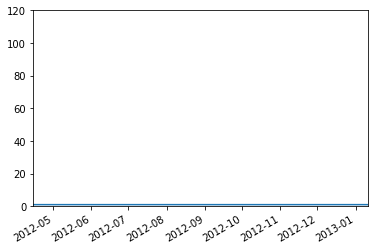

In [54]:
import matplotlib.pyplot as plt

# start from infect_time
filtered_df = df[df["InfectionTime"] >= infect_time]
filtered_df = filtered_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
filtered_df["InfectionTime"] = pd.to_datetime(filtered_df["InfectionTime"],unit='s')

fig, ax = plt.subplots()
graph = filtered_df["InfectionTime"].value_counts().sort_index().plot(ax=ax)

# Uncomment to use parameters for changing x-axis and y-axis intervals
# graph.set_xlim(pd.Timestamp('2012-04-15'), pd.Timestamp('2013-01-11'))
# graph.set_ylim(0, 120)

# Line plot cumulative new infections over time

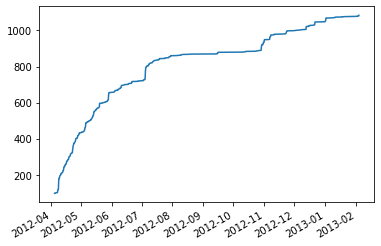

In [43]:
filtered_df = df[df["InfectionTime"] >= infect_time]
filtered_df = filtered_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
filtered_df["InfectionTime"] = pd.to_datetime(filtered_df["InfectionTime"],unit='s')

# Construct dataframe of infectionTime to it's frequency
infectionTime_freq_df = pd.DataFrame({"InfectionTime":filtered_df["InfectionTime"].value_counts().index})

cumulatedFrequencyList = filtered_df["InfectionTime"].value_counts().sort_index().cumsum().plot()


# Animate infections over time on a map